# Évaluation du Risque de Crédit et Détection des Biais Algorithmiques - FAREZ LYLIA

## 1. Introduction

### Contexte
L'évaluation du risque de crédit est un processus clé dans le secteur financier, mais les modèles d'IA utilisés peuvent perpétuer des discriminations involontaires. Des biais liés au genre, à l'origine ethnique ou au statut socio-économique peuvent fausser les décisions, excluant injustement certaines populations ou accordant des prêts à des individus à haut risque.

Ce projet explore ces biais à travers un cas concret, en s'appuyant sur des données réelles ou simulées. L'objectif est de mettre en lumière les mécanismes de discrimination algorithmique et de tester des solutions techniques (ex: fairlearn) pour améliorer l'équité des modèles, sans sacrifier leur performance.

### Objectifs
Ce notebook vise à accomplir les étapes clés suivantes :



*   Analyser un jeu de données de crédit pour comprendre les variables influençant les décisions d'octroi.


*   Identifier des biais algorithmiques potentiels liés à des caractéristiques sensibles (genre, origine ethnique, etc.).


*   Évaluer l'impact de ces biais à l'aide de métriques d'équité (ex: Disparate Impact Ratio, égalité des chances).


*   Proposer des correctifs pour atténuer ces biais (rééquilibrage des données, modèles équitables).

*   Documenter les résultats de manière transparente pour un audit reproductible.


### Méthodologie
Outils utilisés :

    Langage : Python

    Librairies principales :

    pandas : Manipulation et nettoyage des données.

    sklearn (scikit-learn) : Entraînement de modèles (Random Forest, Régression Logistique).

    fairlearn ou AIF360 / SHAP / aequitas: Métriques et mitigation des biais.

    matplotlib/seaborn : Visualisations des résultats.

    numpy : Calculs statistiques.

Approche :



1.   Exploration des données : Statistiques descriptives par groupe sensible.
2.   Modélisation : Entraînement d'un modèle de risque de crédit.
3.   Audit des biais : Application de métriques d'équité.
4.   Expérimentation : Techniques de mitigation (pre-processing, in-processing).








## 2. Présentation du Dataset

Nom du jeu de données :
"LendingClub Loan Data - Échantillon rationalisé pour l'analyse des biais algorithmiques"

### Contexte institutionnel :
LendingClub, pionnier du peer-to-peer lending (P2P) fondé en 2006, a transformé le crédit aux particuliers en connectant directement emprunteurs et investisseurs via sa plateforme digitale. Cotée au NYSE depuis 2014, la plateforme a traité plus de 2,26 millions de prêts entre 2007 et 2015, représentant environ 10% du marché américain des prêts personnels à son apogée.

### Source et couverture des données :

Source originale : Données publiques historiques de LendingClub (2007-2015)

Version utilisée : Échantillon modifié disponible sur FigShare

Période couverte : 2012-2014 (période de maturité opérationnelle)

Taille rationalisée :

236 846 observations (environ 10% du dataset complet)

57 variables sélectionnées (vs. 150+ dans le dataset complet)

Lien vers le dataset : [figshare](https://figshare.com/articles/dataset/Lending_Club/22121477)

# 3. Code du projet

## 3.1. Importation des packages :

In [ ]:
!pip install fairlearn aequitas shap imblearn xgboost squarify

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━

In [ ]:
import pandas as pd
import squarify
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score,
                            precision_score, recall_score, confusion_matrix)
from fairlearn.reductions import (ExponentiatedGradient, DemographicParity,
                                EqualizedOdds, TruePositiveRateParity)
from fairlearn.postprocessing import ThresholdOptimizer
from fairlearn.metrics import (demographic_parity_difference,
                             equalized_odds_difference,
                             selection_rate,
                             equalized_odds_ratio)
from aequitas.group import Group
from aequitas.plotting import Plot
from aequitas.bias import Bias
import shap
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from fairlearn.metrics import MetricFrame, selection_rate, count
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.calibration import CalibratedClassifierCV
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from collections import defaultdict
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

## 3.2. Importation des données

In [ ]:
# Chargement des données
df = pd.read_csv('train_lending_club.csv', low_memory=False)

## 3.3. Exploration des données

#### 3.3.1. Première exploration du dataset


In [ ]:
# Vérification du nombre de lignes et colonnes
print(f"Shape: {df.shape}")

Shape: (236846, 27)


In [ ]:
# Inspection initial
print("5 premières lignes :")
df.head()

5 premières lignes :


issue_d sub_grade        term home_ownership  fico_range_low  total_acc  \
0  2014-01-01        D1   60 months       MORTGAGE           660.0       18.0   
1  2014-01-01        C4   60 months       MORTGAGE           740.0       26.0   
2  2014-01-01        A4   36 months           RENT           700.0       47.0   
3  2014-01-01        D1   60 months       MORTGAGE           665.0       26.0   
4  2014-01-01        C3   36 months       MORTGAGE           700.0       15.0   

   pub_rec  revol_util  annual_inc  int_rate  ...  pub_rec_bankruptcies  \
0      0.0        86.8     40440.0     16.99  ...                   0.0   
1      0.0       103.5     59000.0     15.61  ...                   0.0   
2      0.0        11.4     40000.0      7.90  ...                   0.0   
3      0.0        56.2     70000.0     16.99  ...                   0.0   
4      1.0        67.1    120000.0     14.98  ...                   0.0   

  addr_state  initial_list_status  fico_range_high revol_bal        id  \
0         AR                    f            664.0   17264.0  11024793   
1         VT                    f            744.0    6725.0  10596078   
2         TX                    w            704.0    7613.0  10775616   
3         IN                    f            669.0   14173.0  10765610   
4         LA                    f            704.0    2549.0  10794837   

  open_acc  emp_length loan_status time_to_earliest_cr_line  
0     11.0         2.0           1                 478656.0  
1      8.0         3.0           1                 541728.0  
2     27.0         1.0           1                 657590.4  
3      9.0        11.0           1                 328838.4  
4      8.0         2.0           1                 305164.8  

[5 rows x 27 columns]

In [ ]:
# Type des colonnes
print("Type des colonnes:")
df.dtypes

Type des colonnes:


issue_d                      object
sub_grade                    object
term                         object
home_ownership               object
fico_range_low              float64
total_acc                   float64
pub_rec                     float64
revol_util                  float64
annual_inc                  float64
int_rate                    float64
dti                         float64
purpose                      object
mort_acc                    float64
loan_amnt                   float64
application_type             object
installment                 float64
verification_status          object
pub_rec_bankruptcies        float64
addr_state                   object
initial_list_status          object
fico_range_high             float64
revol_bal                   float64
id                            int64
open_acc                    float64
emp_length                  float64
loan_status                   int64
time_to_earliest_cr_line    float64
dtype: object

Définition des colonnes

issue_d (object) : La date d'émission du prêt (probablement sous forme de chaîne de caractères).

sub_grade (object) : Une classification plus granulaire du risque du prêt (ex : "A1", "B3") attribuée par le prêteur.

term (object) : La durée du prêt (ex : "36 mois" ou "60 mois").

home_ownership (object) : Le statut de propriété du logement de l'emprunteur (ex : "LOCATION", "PROPRIÉTAIRE", "PRÊT IMMOBILIER").

fico_range_low (float64) : La borne inférieure de la fourchette du score FICO de l'emprunteur.

total_acc (float64) : Le nombre total de lignes de crédit que l'emprunteur possède.

pub_rec (float64) : Nombre de mentions défavorables dans les registres publics (ex : faillites, privilèges fiscaux).

revol_util (float64) : Taux d'utilisation du crédit renouvelable (pourcentage du crédit utilisé par rapport au total disponible).

annual_inc (float64) : Le revenu annuel de l'emprunteur.

int_rate (float64) : Le taux d'intérêt du prêt (en pourcentage).

dti (float64) : Ratio dette/revenu (paiements mensuels de la dette divisés par le revenu mensuel brut).

purpose (object) : La raison du prêt (ex : "regroupement de dettes", "amélioration de l'habitat").

mort_acc (float64) : Nombre de comptes de prêt immobilier que l'emprunteur possède.

loan_amnt (float64) : Le montant du prêt demandé/émis.

application_type (object) : Si la demande était individuelle ou conjointe.

installment (float64) : Le paiement mensuel dû par l'emprunteur.

verification_status (object) : Si le revenu de l'emprunteur a été vérifié ("Vérifié", "Non Vérifié").

pub_rec_bankruptcies (float64) : Nombre de faillites dans les registres publics.

addr_state (object) : L'état américain de l'adresse de l'emprunteur (code à 2 lettres).

initial_list_status (object) : Statut initial du listing du prêt (ex : "f" pour fractionné, "w" pour entier).

fico_range_high (float64) : La borne supérieure de la fourchette du score FICO de l'emprunteur.

revol_bal (float64) : Solde total du crédit renouvelable (montant dû sur les lignes de crédit).

id (int64) : Un identifiant unique pour le prêt.

open_acc (float64) : Nombre de lignes de crédit ouvertes.

emp_length (float64) : Durée d'emploi en années (peut être catégorielle, ex : "10" pour 10+ ans).

loan_status (int64) : Indique si le prêt a été remboursé (ex : 0 = remboursé, 1 = défaut).

time_to_earliest_cr_line (float64) : Temps (probablement en années) depuis l'ouverture de la première ligne de crédit de l'emprunteur.

Notes :

Les colonnes de type object sont généralement des chaînes de caractères ou des données catégorielles.

Les colonnes Float64/Int64 sont numériques (décimales ou nombres entiers).

loan_status est probablement la variable cible pour la modélisation prédictive (ex : risque de défaut).

Les scores FICO sont divisés en fourchettes bas/haut (ex : 680-684 → fico_range_low=680, fico_range_high=684).



In [ ]:
# Statistique sur les colonnes numériques
df.describe()

fico_range_low      total_acc        pub_rec     revol_util  \
count   236846.000000  236846.000000  236846.000000  236846.000000   
mean       694.352132      25.573229       0.239354      52.846959   
std         30.932496      12.196168       0.673022      24.012425   
min        660.000000       2.000000       0.000000       0.000000   
25%        670.000000      17.000000       0.000000      35.000000   
50%        685.000000      24.000000       0.000000      53.000000   
75%        710.000000      32.000000       0.000000      71.200000   
max        845.000000     169.000000      86.000000     182.800000   

         annual_inc       int_rate            dti       mort_acc  \
count  2.368460e+05  236846.000000  236846.000000  236846.000000   
mean   7.737953e+04      12.603168      18.533785       1.733278   
std    7.729067e+04       4.482069       9.214702       2.044617   
min    0.000000e+00       5.320000       0.000000       0.000000   
25%    4.600000e+04       9.170000      12.050000       0.000000   
50%    6.500000e+04      12.290000      17.890000       1.000000   
75%    9.200000e+04      15.310000      24.520000       3.000000   
max    9.573072e+06      30.990000     999.000000      47.000000   

           loan_amnt    installment  pub_rec_bankruptcies  fico_range_high  \
count  236846.000000  236846.000000         236846.000000    236846.000000   
mean    14626.430888     441.924072              0.138330       698.352271   
std      8611.590744     257.213087              0.391776        30.933176   
min      1000.000000      14.770000              0.000000       664.000000   
25%      8000.000000     254.070000              0.000000       674.000000   
50%     12450.000000     378.200000              0.000000       689.000000   
75%     20000.000000     588.367500              0.000000       714.000000   
max     40000.000000    1534.880000              9.000000       850.000000   

          revol_bal            id       open_acc     emp_length  \
count  2.368460e+05  2.368460e+05  236846.000000  236846.000000   
mean   1.695626e+04  4.926939e+07      11.807512       5.990234   
std    2.382901e+04  2.098038e+07       5.592320       4.238357   
min    0.000000e+00  5.670500e+04       0.000000       0.000000   
25%    6.127000e+03  3.319150e+07       8.000000       2.000000   
50%    1.139900e+04  5.297922e+07      11.000000       6.000000   
75%    2.043100e+04  6.664553e+07      15.000000      11.000000   
max    2.560703e+06  8.436346e+07      76.000000      11.000000   

         loan_status  time_to_earliest_cr_line  
count  236846.000000              2.368460e+05  
mean        0.831591              5.264205e+05  
std         0.374230              2.413121e+05  
min         0.000000              9.711360e+04  
25%         1.000000              3.603744e+05  
50%         1.000000              4.784832e+05  
75%         1.000000              6.470496e+05  
max         1.000000              2.240525e+06

In [ ]:
# Vérification des valeurs manquantes
df.isnull().sum().sort_values(ascending=False).head(27)

issue_d                     0
sub_grade                   0
term                        0
home_ownership              0
fico_range_low              0
total_acc                   0
pub_rec                     0
revol_util                  0
annual_inc                  0
int_rate                    0
dti                         0
purpose                     0
mort_acc                    0
loan_amnt                   0
application_type            0
installment                 0
verification_status         0
pub_rec_bankruptcies        0
addr_state                  0
initial_list_status         0
fico_range_high             0
revol_bal                   0
id                          0
open_acc                    0
emp_length                  0
loan_status                 0
time_to_earliest_cr_line    0
dtype: int64

In [ ]:
# Sélectionner les colonnes catégorielles
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Variables catégorielles:", categorical_cols.tolist())

# Afficher les valeurs uniques pour chaque variable catégorielle
for col in categorical_cols:
    unique_values = df[col].unique()
    print(f"\nVariable: {col}")
    print(f"Nombre de valeurs uniques: {len(unique_values)}")
    print("Valeurs possibles:", unique_values)

Variables catégorielles: ['issue_d', 'sub_grade', 'term', 'home_ownership', 'purpose', 'application_type', 'verification_status', 'addr_state', 'initial_list_status']

Variable: issue_d
Nombre de valeurs uniques: 30
Valeurs possibles: ['2014-01-01' '2014-02-01' '2014-03-01' '2014-04-01' '2014-05-01'
 '2014-06-01' '2014-07-01' '2014-08-01' '2014-09-01' '2014-10-01'
 '2014-11-01' '2014-12-01' '2015-01-01' '2015-02-01' '2015-03-01'
 '2015-04-01' '2015-05-01' '2015-06-01' '2015-07-01' '2015-08-01'
 '2015-09-01' '2015-10-01' '2015-11-01' '2015-12-01' '2016-01-01'
 '2016-02-01' '2016-03-01' '2016-04-01' '2016-05-01' '2016-06-01']

Variable: sub_grade
Nombre de valeurs uniques: 35
Valeurs possibles: ['D1' 'C4' 'A4' 'C3' 'B2' 'B3' 'D2' 'E3' 'C2' 'E5' 'C1' 'C5' 'E1' 'B1'
 'B5' 'D3' 'D4' 'B4' 'G4' 'E2' 'D5' 'A3' 'A5' 'A2' 'A1' 'F1' 'F2' 'E4'
 'F3' 'G1' 'G2' 'F5' 'F4' 'G3' 'G5']

Variable: term
Nombre de valeurs uniques: 2
Valeurs possibles: [' 60 months' ' 36 months']

Variable: home_ownership
N


La variable issue_d a trop de modalités (30) pour une visualisation claire


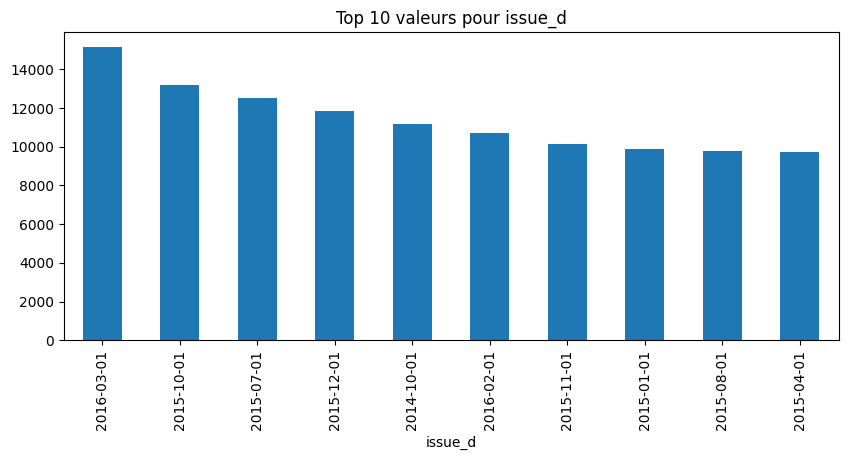


La variable sub_grade a trop de modalités (35) pour une visualisation claire


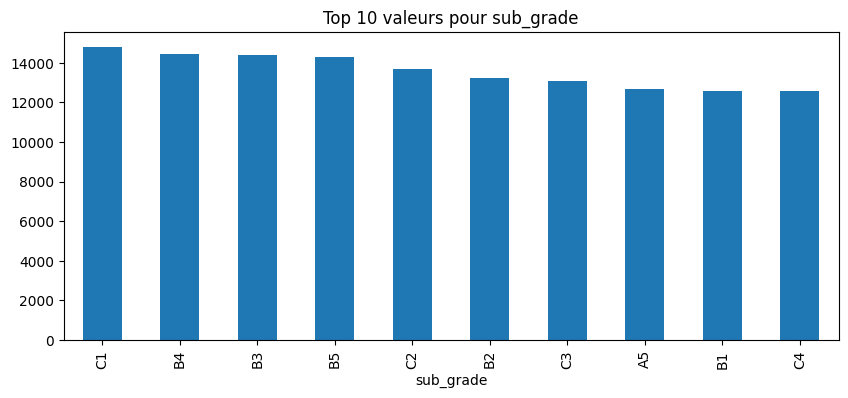

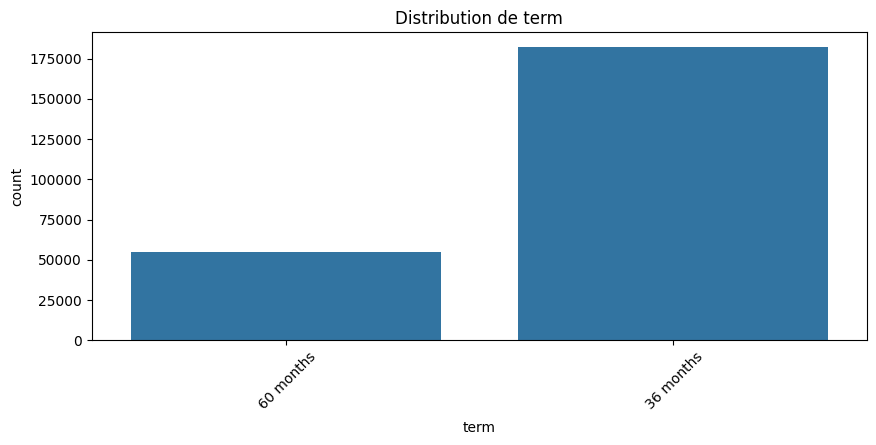

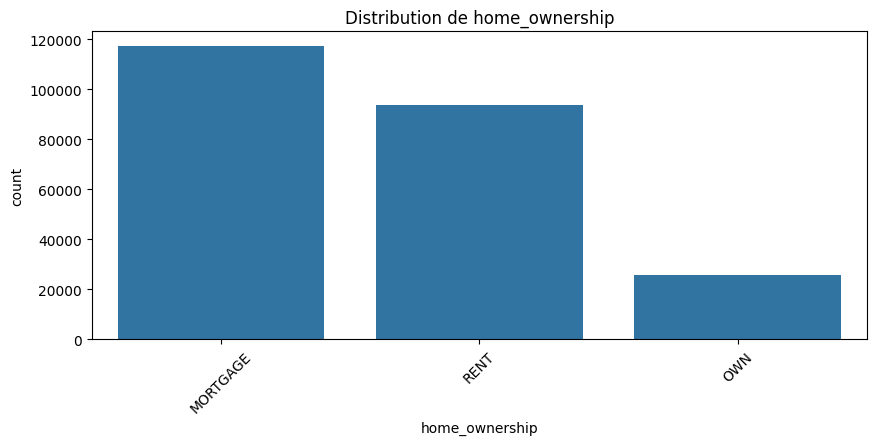


La variable purpose a trop de modalités (14) pour une visualisation claire


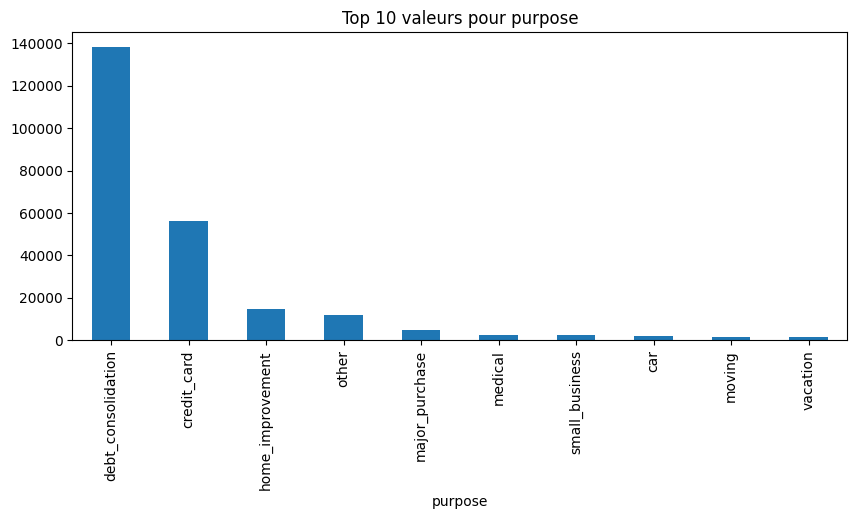

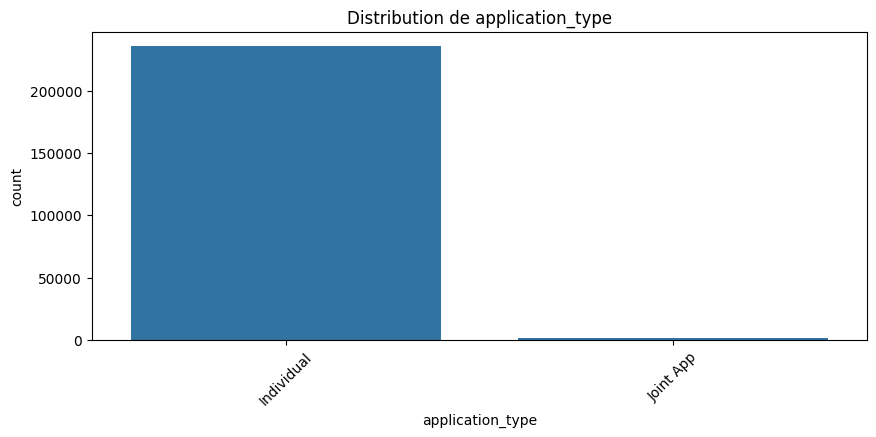

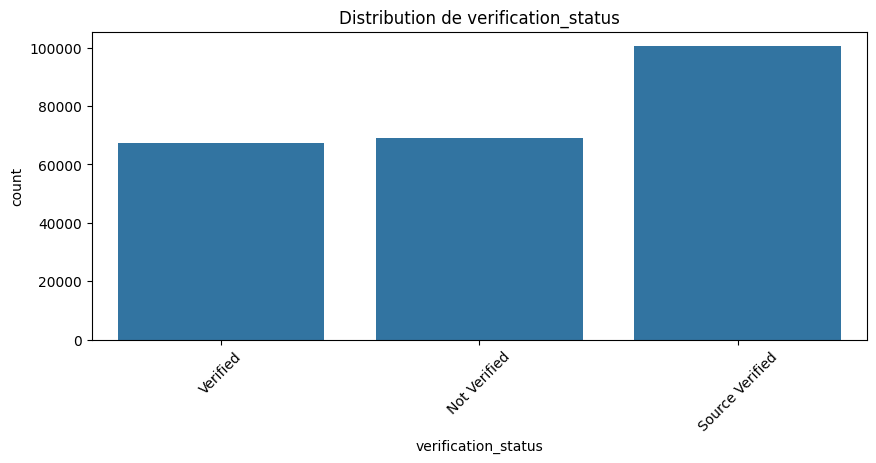


La variable addr_state a trop de modalités (51) pour une visualisation claire


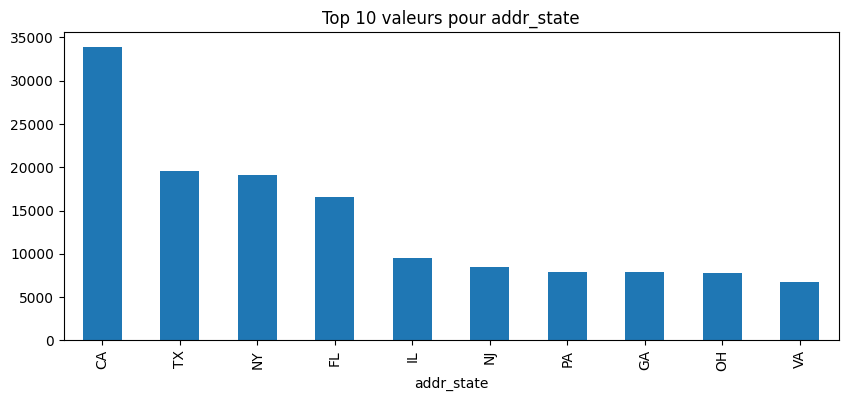

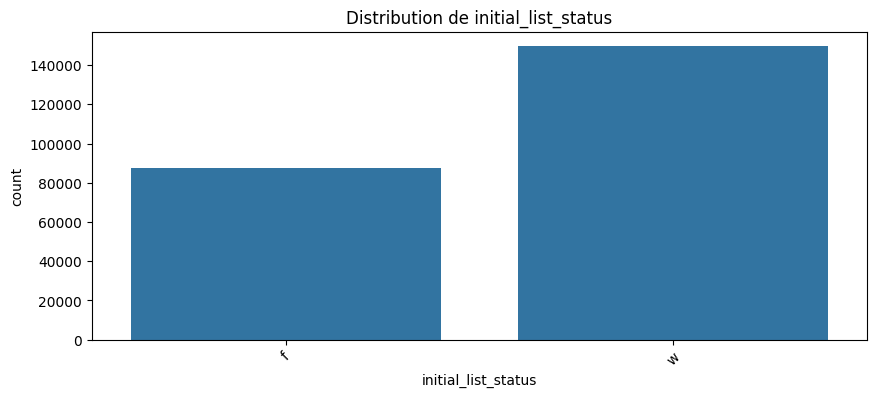

In [ ]:
# Afficher la distribution des variables catégorielles
for col in categorical_cols:
    plt.figure(figsize=(10, 4))

    # Pour les variables avec peu de modalités
    if len(df[col].unique()) <= 10:
        sns.countplot(x=col, data=df)
        plt.title(f"Distribution de {col}")
        plt.xticks(rotation=45)
        plt.show()

    # Pour les variables avec beaucoup de modalités
    else:
        print(f"\nLa variable {col} a trop de modalités ({len(df[col].unique())}) pour une visualisation claire")
        # On peut afficher les top 10 modalités
        top_values = df[col].value_counts().nlargest(10)
        top_values.plot(kind='bar')
        plt.title(f"Top 10 valeurs pour {col}")
        plt.show()

Récapitulatif :

L'analyse préliminaire montre qu'aucune des colonnes principales ne contient de valeurs manquantes, ce qui facilite le traitement ultérieur des données. Neuf variables catégorielles ont été identifiées : issue_d, sub_grade, term, home_ownership, purpose, application_type, verification_status, addr_state et initial_list_status. Ces colonnes présentent un nombre variable de modalités : par exemple, term et application_type n'ont que 2 valeurs uniques, tandis que addr_state en contient 51 et sub_grade 35. La variable issue_d correspond à des dates mensuelles comprises entre janvier 2014 et juin 2016, ce qui peut être utile pour des analyses temporelles. L’ensemble de ces informations va guider les étapes suivantes du prétraitement et de la modélisation.


#### 3.3.2. Gestion des valeurs abberantes

Colonnes numériques à analyser: ['fico_range_low', 'total_acc', 'pub_rec', 'revol_util', 'annual_inc', 'int_rate', 'dti', 'mort_acc', 'loan_amnt', 'installment', 'pub_rec_bankruptcies', 'fico_range_high', 'revol_bal', 'id', 'open_acc', 'emp_length', 'loan_status', 'time_to_earliest_cr_line']


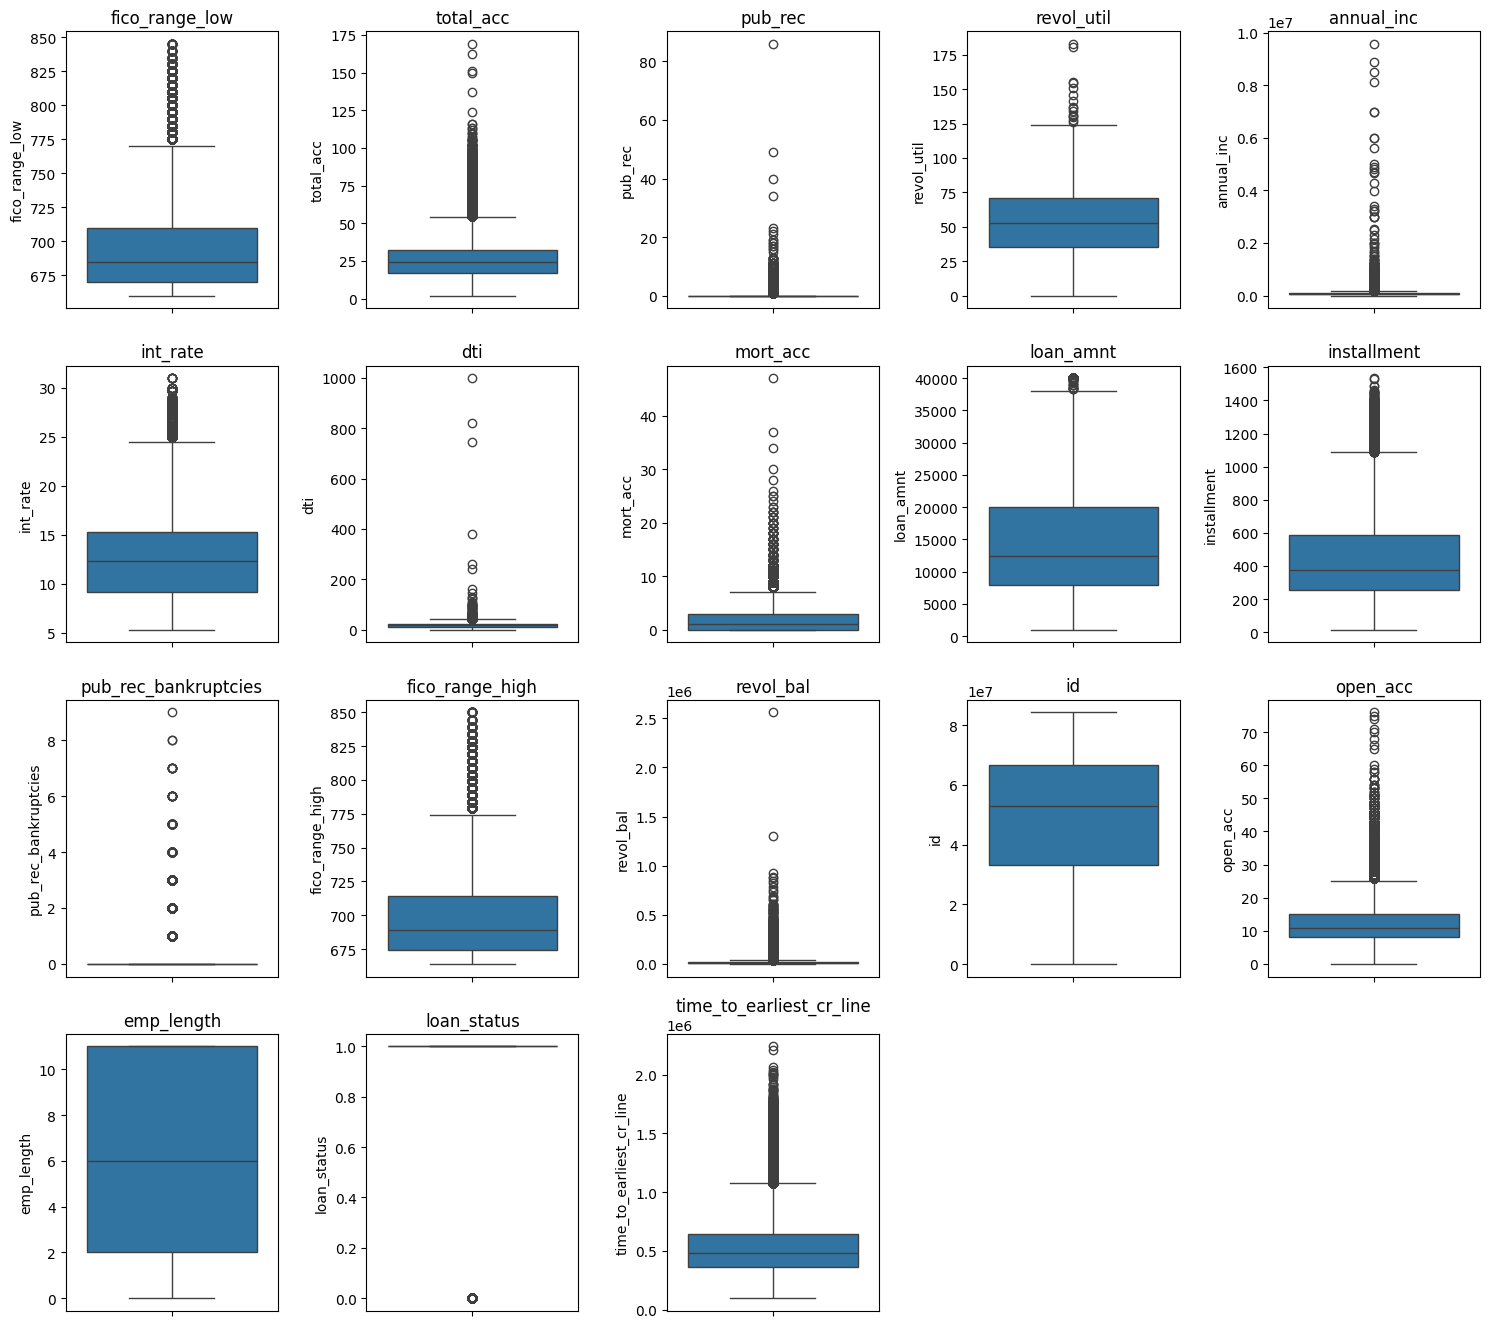

In [ ]:
# Gestion des valeurs aberrantes (outliers)

# Sélection des colonnes numériques pour l'analyse des outliers
# On utilise select_dtypes pour ne garder que les colonnes de type float64 et int64
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Colonnes numériques à analyser:", numeric_cols.tolist())

# Création de boxplots pour visualiser les valeurs aberrantes
plt.figure(figsize=(15, 20))  # Définit la taille de la figure

# Boucle sur chaque colonne numérique pour créer un boxplot
for i, col in enumerate(numeric_cols, 1):  # enumerate commence à 1 pour les subplots
    plt.subplot(6, 5, i)  # Crée une grille de 6 lignes x 5 colonnes pour les graphiques
    sns.boxplot(y=df[col])  # Boxplot vertical pour la colonne courante
    plt.title(col)  # Titre du graphique = nom de la colonne

# Ajuste l'espacement entre les graphiques pour éviter les chevauchements
plt.tight_layout()
# Affiche la figure avec tous les boxplots
plt.show()

Approche proposée :

Plutôt que de se baser uniquement sur une analyse visuelle, nous allons implémenter une méthode statistique avancée pour détecter les valeurs aberrantes de manière plus rigoureuse. Nous utiliserons la méthode de l'Intervalle Interquartile (IQR), particulièrement adaptée pour les distributions non-gaussiennes. Cette approche identifie les outliers comme étant les valeurs situées en dehors de l'intervalle [Q1 - 1,5×IQR ; Q3 + 1,5×IQR], où Q1 et Q3 sont respectivement les premier et troisième quartiles, et IQR = Q3 - Q1.


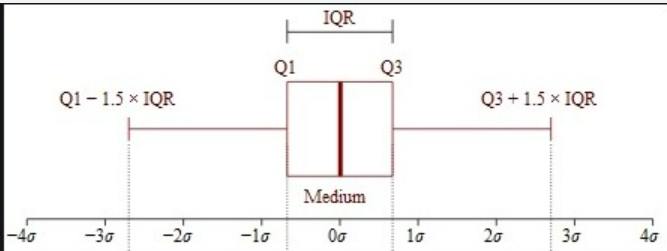

In [ ]:
# Définition de la fonction de détection des valeurs aberrantes (méthode IQR)
# Fonction pour détecter les outliers et retourner les bornes
def detecter_valeurs_aberrantes(df, colonne):
    Q1 = df[colonne].quantile(0.25)  # Premier quartile (25ème percentile)
    Q3 = df[colonne].quantile(0.75)  # Troisième quartile (75ème percentile)
    IQR = Q3 - Q1  # Intervalle interquartile
    borne_inf = Q1 - 1.5 * IQR  # Borne inférieure
    borne_sup = Q3 + 1.5 * IQR  # Borne supérieure
    outliers = df[(df[colonne] < borne_inf) | (df[colonne] > borne_sup)]
    return outliers, borne_inf, borne_sup

# Dictionnaire pour stocker le nombre d'outliers et les bornes
dictionnaire_outliers = {}

# Boucle sur les colonnes numériques
colonnes_numeriques = df.select_dtypes(include=['float64', 'int64']).columns
for col in colonnes_numeriques:
    outliers, borne_inf, borne_sup = detecter_valeurs_aberrantes(df, col)
    dictionnaire_outliers[col] = {
        'nombre_outliers': len(outliers),
        'borne_inf': borne_inf,
        'borne_sup': borne_sup
    }
    print(f"{col}: {len(outliers)} valeurs aberrantes (Bornes: [{borne_inf:.2f}, {borne_sup:.2f}])")

# Conversion en DataFrame pour une meilleure lisibilité
resume_outliers = pd.DataFrame.from_dict(dictionnaire_outliers, orient='index')
resume_outliers.reset_index(inplace=True)
resume_outliers.rename(columns={'index': 'Colonne'}, inplace=True)
print("\nTableau récapitulatif:")
print(resume_outliers)

fico_range_low: 7189 valeurs aberrantes (Bornes: [610.00, 770.00])
total_acc: 5647 valeurs aberrantes (Bornes: [-5.50, 54.50])
pub_rec: 43082 valeurs aberrantes (Bornes: [0.00, 0.00])
revol_util: 15 valeurs aberrantes (Bornes: [-19.30, 125.50])
annual_inc: 11186 valeurs aberrantes (Bornes: [-23000.00, 161000.00])
int_rate: 3260 valeurs aberrantes (Bornes: [-0.04, 24.52])
dti: 447 valeurs aberrantes (Bornes: [-6.65, 43.22])
mort_acc: 3443 valeurs aberrantes (Bornes: [-4.50, 7.50])
loan_amnt: 309 valeurs aberrantes (Bornes: [-10000.00, 38000.00])
installment: 6757 valeurs aberrantes (Bornes: [-247.38, 1089.81])
pub_rec_bankruptcies: 29854 valeurs aberrantes (Bornes: [0.00, 0.00])
fico_range_high: 7189 valeurs aberrantes (Bornes: [614.00, 774.00])
revol_bal: 14539 valeurs aberrantes (Bornes: [-15329.00, 41887.00])
id: 0 valeurs aberrantes (Bornes: [-16989550.75, 116826577.25])
open_acc: 5901 valeurs aberrantes (Bornes: [-2.50, 25.50])
emp_length: 0 valeurs aberrantes (Bornes: [-11.50, 24.

Explication des résultats :

Les résultats montrent le nombre de valeurs aberrantes détectées pour chaque variable numérique selon la méthode IQR :

Variables avec beaucoup d'outliers :

pub_rec (43,082) et pub_rec_bankruptcies (29,854) : Ces variables comptent les incidents de crédit, et le fait que la borne supérieure soit à 0 suggère que toute valeur > 0 est considérée comme aberrante

loan_status (39,887) : Variable binaire où la valeur 1 (défaut) est traitée comme aberrante

Variables avec des bornes inhabituelles :

annual_inc : Borne inférieure négative (-23,000) - impossible, indique une asymétrie forte

revol_util : Intervalle inclut des valeurs négatives (-19.3) alors qu'un taux d'utilisation ne peut être <0%

dti et mort_acc : Bornes négatives non réalistes

Variables sans outliers :

id : Identifiant unique (logiquement pas d'outliers)

emp_length : Distribution couvrant bien l'intervalle défini

Interprétation des scores FICO :

fico_range_low/high : 7,189 outliers avec des scores en dehors de [610,770] et [614,774]

Cela suggère que les scores FICO extrêmes sont relativement fréquents

In [ ]:
def supprimer_outliers_iqr(df, colonnes_numeriques):
    df_clean = df.copy()
    for col in colonnes_numeriques:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        borne_inf = Q1 - 1.5 * IQR
        borne_sup = Q3 + 1.5 * IQR

        # Filtrer les valeurs dans l'intervalle
        df_clean = df_clean[(df_clean[col] >= borne_inf) & (df_clean[col] <= borne_sup)]

    print(f"Nombre de lignes supprimées : {len(df) - len(df_clean)}")
    return df_clean

# Application
colonnes_numeriques = df.select_dtypes(include=['float64', 'int64']).columns
df_clean = supprimer_outliers_iqr(df, colonnes_numeriques)

Nombre de lignes supprimées : 115759


### 3.3.3. Visualisation des données

1. Distribution de la Variable Cible

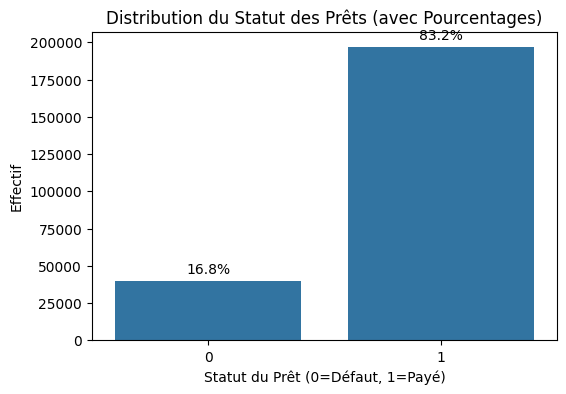

Distribution du statut des prêts :
Défaut (0): 39887 prêts (16.8%)
Payé (1): 196959 prêts (83.2%)


In [ ]:
# Tracer la distribution de 'loan_status'
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='loan_status')

# Calculer les pourcentages et annoter les barres
# Calculer les effectifs et pourcentages
loan_status_counts = df['loan_status'].value_counts().sort_index()
loan_status_percentages = 100 * loan_status_counts / len(df)

# Annoter les barres avec les pourcentages
for p in ax.patches:
    pourcentage = f'{100 * p.get_height() / len(df):.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.02 * len(df)
    ax.annotate(pourcentage, (x, y), ha='center')

plt.title('Distribution du Statut des Prêts (avec Pourcentages)')
plt.xlabel('Statut du Prêt (0=Défaut, 1=Payé)')
plt.ylabel('Effectif')
plt.show()

# Affichage des résultats
print("Distribution du statut des prêts :")
for status, count in loan_status_counts.items():
    percentage = loan_status_percentages[status]
    label = "Défaut" if status == 0 else "Payé"
    print(f"{label} ({status}): {count} prêts ({percentage:.1f}%)")

📈 Distribution du statut des prêts

L’analyse de la variable cible loan_status révèle une forte déséquilibre dans la distribution des classes. Sur l’ensemble des prêts observés, 83,2 % (soit 196 959 prêts) ont été remboursés intégralement, tandis que 16,8 % (soit 39 887 prêts) sont en défaut. Cette répartition indique un problème classique de déséquilibre de classes, qui devra être pris en compte lors de la modélisation, notamment pour éviter que les modèles de classification ne soient biaisés en faveur de la classe majoritaire (prêts remboursés). Des techniques telles que la pondération des classes, le sur-échantillonnage ou le sous-échantillonnage pourront être envisagées pour corriger ce déséquilibre.

2. Distribution du taux de défaut par état

In [ ]:
# Calcule le taux de défaut (loan_status == 0) par État
import plotly.express as px
default_rate_by_state = df.groupby('addr_state').apply(
    lambda x: (x['loan_status'] == 0).mean()
).reset_index(name='default_rate')

default_rate_by_state['default_rate_percent'] = default_rate_by_state['default_rate'] * 100

# Carte choroplèthe
fig = px.choropleth(
    default_rate_by_state,
    locations='addr_state',
    locationmode='USA-states',
    color='default_rate_percent',
    scope='usa',
    color_continuous_scale='Reds',
    labels={'default_rate_percent': 'Taux de défaut (%)'},
    title='Taux de défaut par État aux États-Unis'
)

fig.update_layout(
    geo=dict(bgcolor='rgba(0,0,0,0)'),
    plot_bgcolor='white',
    paper_bgcolor='white',
)
fig.show()

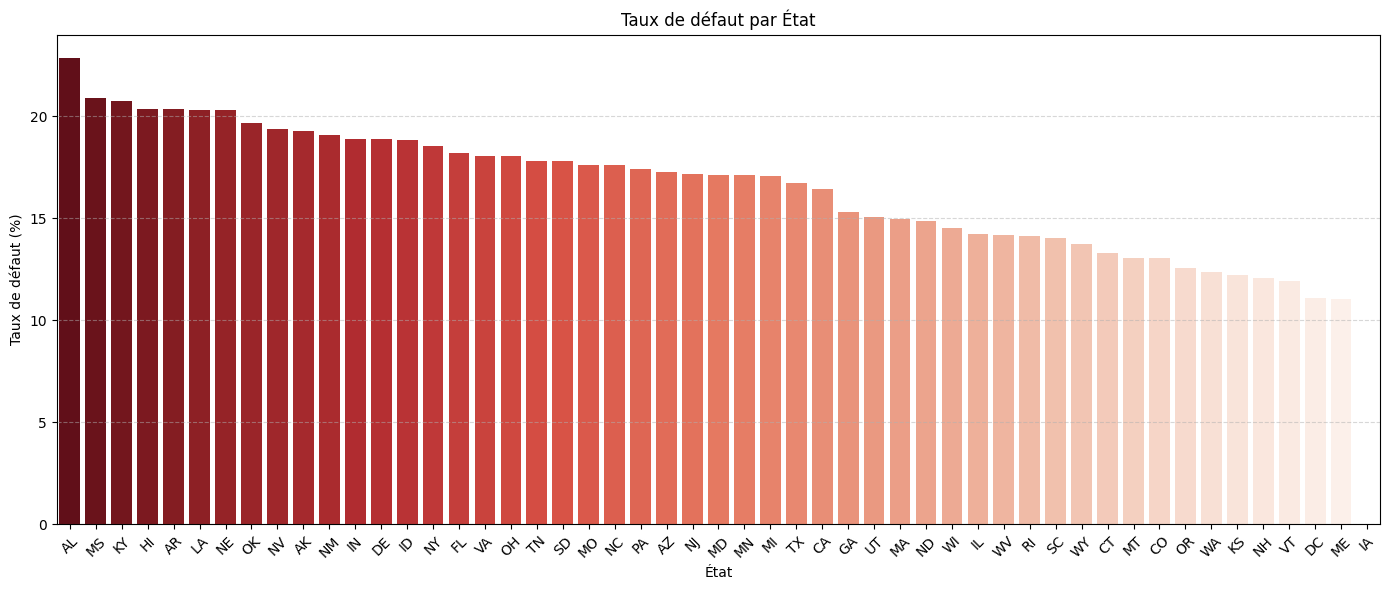

In [ ]:
default_rate_by_state = df.groupby('addr_state').apply(
    lambda x: (x['loan_status'] == 0).mean()
).reset_index(name='default_rate')

default_rate_by_state['default_rate_percent'] = default_rate_by_state['default_rate'] * 100
default_rate_sorted = default_rate_by_state.sort_values('default_rate', ascending=False)

# Barplot
plt.figure(figsize=(14, 6))
sns.barplot(x='addr_state', y='default_rate_percent', data=default_rate_sorted, palette='Reds_r')
plt.title('Taux de défaut par État')
plt.ylabel('Taux de défaut (%)')
plt.xlabel('État')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# Calcul du taux de défaut par État (0 = défaut, 1 = payé)
default_rate_by_state = df.groupby('addr_state').apply(
    lambda x: (x['loan_status'] == 0).mean()
).reset_index(name='default_rate')

# Ajout d'une colonne en pourcentage, arrondie à 1 décimale
default_rate_by_state['default_rate_percent'] = (default_rate_by_state['default_rate'] * 100).round(1)

# Tri décroissant
default_rate_sorted = default_rate_by_state.sort_values(by='default_rate', ascending=False)

# Affichage
print("📊 Taux de défaut par État (trié décroissant) :\n")
print(default_rate_sorted.rename(columns={
    'addr_state': 'État',
    'default_rate': 'Taux défaut (décimal)',
    'default_rate_percent': 'Taux défaut (%)'
}).to_string(index=False))


📊 Taux de défaut par État (trié décroissant) :

État  Taux défaut (décimal)  Taux défaut (%)
  AL               0.228426             22.8
  MS               0.208856             20.9
  KY               0.207482             20.7
  HI               0.203562             20.4
  AR               0.203509             20.4
  LA               0.202947             20.3
  NE               0.202899             20.3
  OK               0.196840             19.7
  NV               0.193905             19.4
  AK               0.192771             19.3
  NM               0.190875             19.1
  IN               0.188903             18.9
  DE               0.188596             18.9
  ID               0.188235             18.8
  NY               0.185355             18.5
  FL               0.182115             18.2
  VA               0.180676             18.1
  OH               0.180412             18.0
  TN               0.178233             17.8
  SD               0.178082             17.8
  MO   

🗺️ Analyse géographique du taux de défaut

L'examen du taux de défaut des prêts par État met en évidence des disparités significatives selon la localisation des emprunteurs. Les États avec les taux de défaut les plus élevés sont l’Alabama (22,8 %), le Mississippi (20,9 %), et le Kentucky (20,7 %), indiquant une concentration plus marquée de risques de non-remboursement dans ces régions. À l’inverse, des États comme le Maine (11,0 %), le District de Columbia (11,1 %) ou le Vermont (11,9 %) présentent des taux de défaut nettement plus faibles. L'Iowa se distingue avec un taux de défaut nul, ce qui mérite une vérification ou une analyse plus approfondie (ex. nombre d’observations insuffisant). Ces résultats suggèrent que la variable géographique (addr_state) pourrait jouer un rôle pertinent dans la prédiction du risque de défaut et mérite d’être intégrée dans la modélisation.



3. Analyse des statuts des prêts par objectif

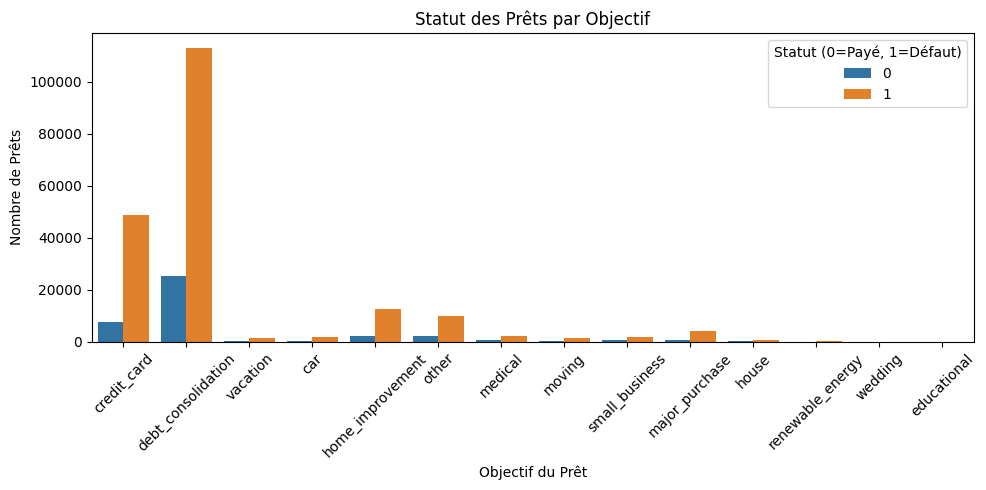


Distribution du Statut des Prêts par Objectif :

Objectif: car
  Prêts Payés (0):    262 prêts (12.2%)
  Prêts en Défaut (1): 1890 prêts (87.8%)

Objectif: credit_card
  Prêts Payés (0):    7465 prêts (13.3%)
  Prêts en Défaut (1): 48860 prêts (86.7%)

Objectif: debt_consolidation
  Prêts Payés (0):    25276 prêts (18.3%)
  Prêts en Défaut (1): 113095 prêts (81.7%)

Objectif: educational
  Prêts Payés (0):    0 prêts (0.0%)
  Prêts en Défaut (1): 1 prêts (100.0%)

Objectif: home_improvement
  Prêts Payés (0):    2225 prêts (15.0%)
  Prêts en Défaut (1): 12598 prêts (85.0%)

Objectif: house
  Prêts Payés (0):    207 prêts (23.6%)
  Prêts en Défaut (1): 671 prêts (76.4%)

Objectif: major_purchase
  Prêts Payés (0):    733 prêts (15.9%)
  Prêts en Défaut (1): 3883 prêts (84.1%)

Objectif: medical
  Prêts Payés (0):    454 prêts (18.5%)
  Prêts en Défaut (1): 2005 prêts (81.5%)

Objectif: moving
  Prêts Payés (0):    292 prêts (19.7%)
  Prêts en Défaut (1): 1188 prêts (80.3%)

Objectif: o

In [ ]:
# Graphique : Statut des prêts par objectif
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='purpose', hue='loan_status')
plt.xticks(rotation=45)
plt.title('Statut des Prêts par Objectif')
plt.xlabel('Objectif du Prêt')
plt.ylabel('Nombre de Prêts')
plt.legend(title='Statut (0=Payé, 1=Défaut)')
plt.tight_layout()
plt.show()

# Affichage : Effectifs et pourcentages
print("\nDistribution du Statut des Prêts par Objectif :\n")

# Groupement par objectif et statut
group_counts = df.groupby(['purpose', 'loan_status']).size().unstack(fill_value=0)

# Calcul des totaux et pourcentages
group_totals = group_counts.sum(axis=1)
group_percentages = group_counts.divide(group_totals, axis=0) * 100

# Affichage des résultats
for purpose in group_counts.index:
    paye = group_counts.loc[purpose, 0] if 0 in group_counts.columns else 0
    defaut = group_counts.loc[purpose, 1] if 1 in group_counts.columns else 0
    paye_pct = group_percentages.loc[purpose, 0] if 0 in group_percentages.columns else 0
    defaut_pct = group_percentages.loc[purpose, 1] if 1 in group_percentages.columns else 0

    print(f"Objectif: {purpose}")
    print(f"  Prêts Payés (0):    {paye} prêts ({paye_pct:.1f}%)")
    print(f"  Prêts en Défaut (1): {defaut} prêts ({defaut_pct:.1f}%)\n")

🎯 Analyse du taux de défaut selon l’objectif du prêt

L’exploration du statut des prêts selon leur objectif déclaré révèle des taux de défaut globalement élevés, mais avec des variations notables entre les catégories. Les prêts accordés pour des besoins tels que les voitures (87,8 % de défauts), les cartes de crédit (86,7 %), ou les vacances (85,2 %) présentent un risque de défaut particulièrement important. D’autres motifs, comme le regroupement de dettes (81,7 %) ou les projets médicaux (81,5 %), suivent cette tendance. À l’opposé, les prêts pour les petites entreprises (72,5 %) ou l’achat d’une maison (76,4 %) montrent des taux de défaut un peu plus faibles, bien que toujours significatifs.

Certaines catégories comme "educational" et "wedding" affichent un taux de défaut de 100 %, ce qui semble anormal et mérite d’être vérifié : cela peut être dû à un très faible nombre d’observations (1 et 7 prêts respectivement). Ces résultats suggèrent que la variable purpose peut être très discriminante pour la prédiction du défaut et devrait être soigneusement prise en compte dans la phase de modélisation.

3. Analyse des taux d'intérêt par statut de prêt


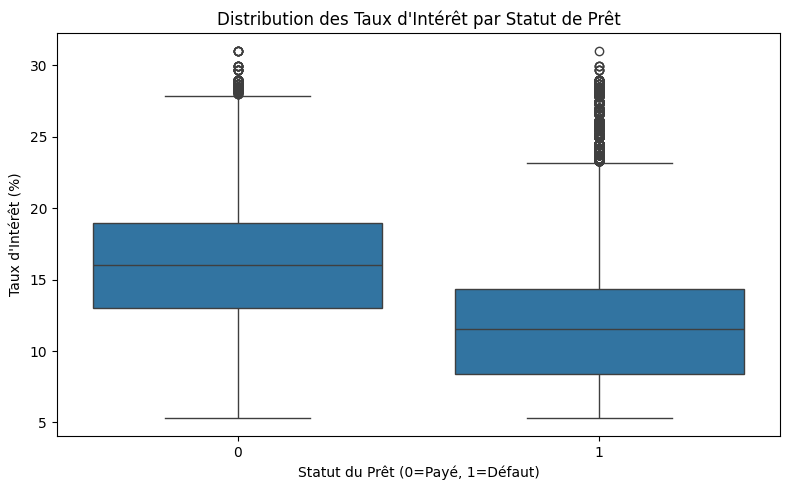


Statistiques des Taux d'Intérêt par Statut de Prêt :

                count   mean   std   min    25%    50%    75%    max
loan_status                                                         
Défaut (0)    39887.0  16.20  4.53  5.32  12.99  15.99  18.99  30.99
Payé (1)     196959.0  11.87  4.10  5.32   8.39  11.53  14.31  30.99


In [ ]:
# Exemple : Taux d'intérêt par statut de prêt
# Graphique : Boîte à moustaches du taux d'intérêt
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='loan_status', y='int_rate')
plt.title('Distribution des Taux d\'Intérêt par Statut de Prêt')
plt.xlabel('Statut du Prêt (0=Payé, 1=Défaut)')
plt.ylabel('Taux d\'Intérêt (%)')
plt.tight_layout()
plt.show()

# Affichage : Statistiques descriptives
print("\nStatistiques des Taux d'Intérêt par Statut de Prêt :\n")

# Calcul des statistiques
summary_stats = df.groupby('loan_status')['int_rate'].describe()

# Renommage des index pour plus de clarté
summary_stats.index = summary_stats.index.map({1: 'Payé (1)', 0: 'Défaut (0)'})

# Affichage avec arrondi à 2 décimales
print(summary_stats.round(2))

💰 Analyse des taux d’intérêt selon le statut du prêt

L’analyse des statistiques descriptives des taux d’intérêt (int_rate) selon le statut du prêt met en évidence une différence significative entre les prêts remboursés et ceux en défaut. En moyenne, les prêts en défaut présentent un taux d’intérêt plus élevé (16,20 %), contre 11,87 % pour les prêts remboursés intégralement. Cette tendance se reflète également dans les différentes mesures de dispersion (médiane, quartiles), ce qui suggère que des taux plus élevés sont fortement corrélés à un risque accru de défaut. Ces résultats confirment l’intuition économique selon laquelle les emprunteurs présentant un profil plus risqué se voient appliquer un taux d’intérêt plus élevé — ce qui pourrait à son tour impacter leur capacité de remboursement. La variable int_rate apparaît donc comme un predictor clé à intégrer dans le modèle de scoring de crédit.

4. Matrice de Corrélation (Variables Numériques)


Matrice de Corrélation :

                          fico_range_low  total_acc  pub_rec  revol_util  \
fico_range_low                      1.00       0.03    -0.19       -0.43   
total_acc                           0.03       1.00     0.01       -0.12   
pub_rec                            -0.19       0.01     1.00       -0.08   
revol_util                         -0.43      -0.12    -0.08        1.00   
annual_inc                          0.08       0.16    -0.01        0.04   
int_rate                           -0.39      -0.04     0.07        0.21   
dti                                -0.06       0.20    -0.05        0.16   
mort_acc                            0.09       0.36     0.00        0.02   
loan_amnt                           0.14       0.21    -0.09        0.11   
installment                         0.09       0.19    -0.07        0.12   
pub_rec_bankruptcies               -0.22       0.05     0.60       -0.10   
fico_range_high                     1.00       0.03    -0.19 

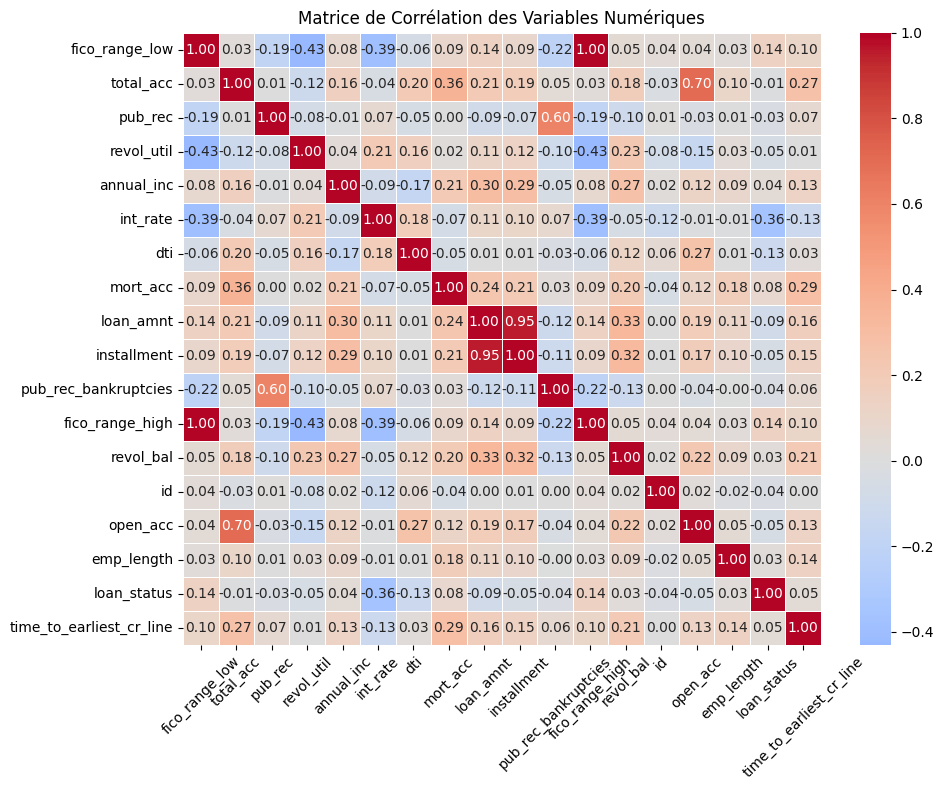

In [ ]:
# Calcul des corrélations
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

# Affichage de la matrice de corrélation
print("\nMatrice de Corrélation :\n")
print(correlation_matrix.round(2))  # Arrondi à 2 décimales

# Visualisation par heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,           # Affiche les valeurs dans les cases
    cmap='coolwarm',      # Palette de couleurs
    center=0,             # Valeur centrale (0 = pas de corrélation)
    fmt=".2f",            # Format à 2 décimales
    linewidths=.5         # Épaisseur des lignes de séparation
)
plt.title('Matrice de Corrélation des Variables Numériques')
plt.xticks(rotation=45)   # Rotation des étiquettes pour meilleure lisibilité
plt.tight_layout()
plt.show()

Variables les plus corrélées :
                   Variable 1      Variable 2  Corrélation
55            fico_range_high  fico_range_low     1.000000
44                installment       loan_amnt     0.954541
92                   open_acc       total_acc     0.704535
47       pub_rec_bankruptcies         pub_rec     0.602053
3                  revol_util  fico_range_low     0.429933
58            fico_range_high      revol_util     0.429933
10                   int_rate  fico_range_low     0.388900
60            fico_range_high        int_rate     0.388898
22                   mort_acc       total_acc     0.364764
125               loan_status        int_rate     0.361165
74                  revol_bal       loan_amnt     0.330168
75                  revol_bal     installment     0.316617
32                  loan_amnt      annual_inc     0.301598
40                installment      annual_inc     0.294806
143  time_to_earliest_cr_line        mort_acc     0.286303
70                  revol

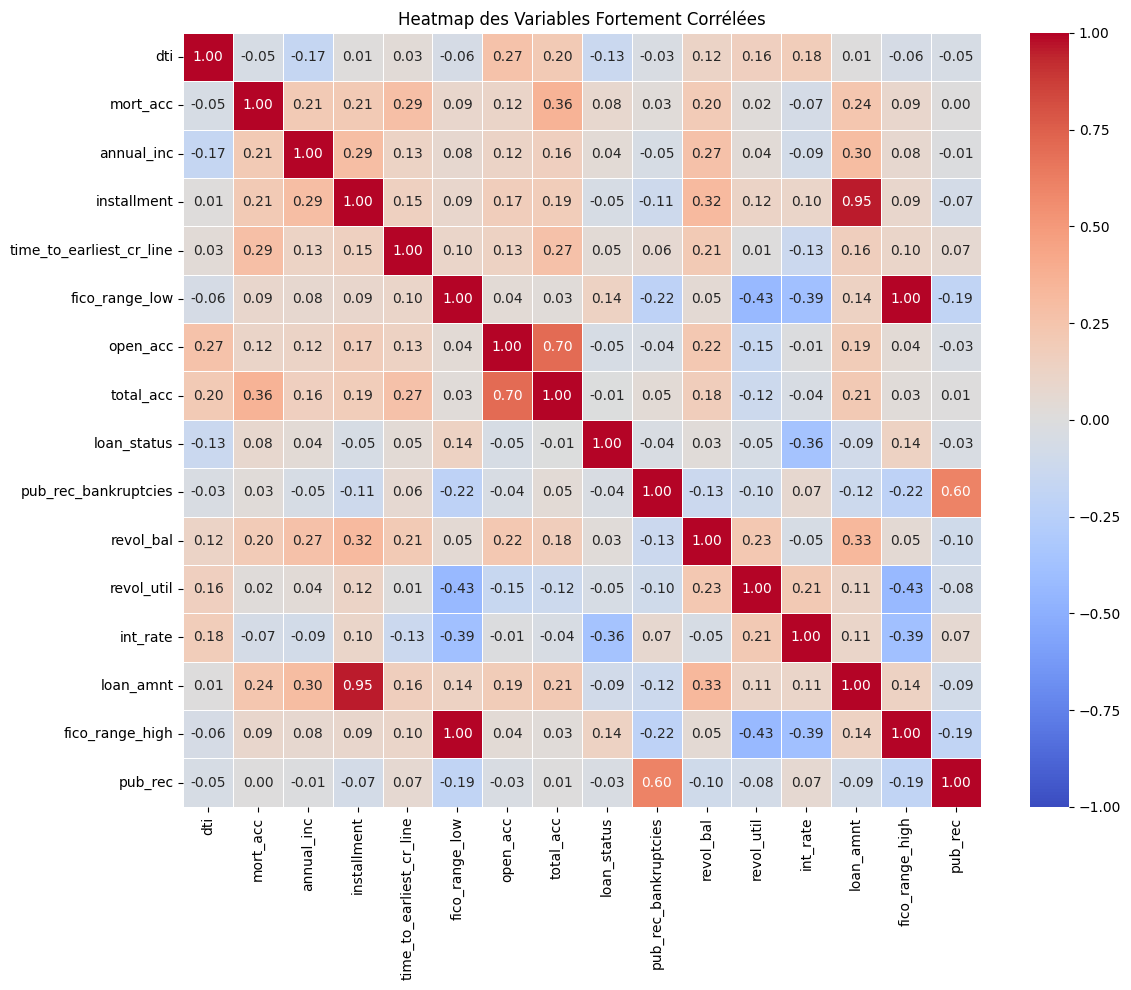


Top 20 variables corrélées avec la cible :
                    Variable  Corrélation avec la Cible
0                   int_rate                  -0.361165
1             fico_range_low                   0.138569
2            fico_range_high                   0.138567
3                        dti                  -0.133640
4                  loan_amnt                  -0.088302
5                   mort_acc                   0.081155
6                installment                  -0.052590
7                 revol_util                  -0.051803
8                   open_acc                  -0.048451
9   time_to_earliest_cr_line                   0.045460
10                annual_inc                   0.040670
11                        id                  -0.037875
12      pub_rec_bankruptcies                  -0.036672
13                   pub_rec                  -0.031380
14                emp_length                   0.029946
15                 revol_bal                   0.026276
16  

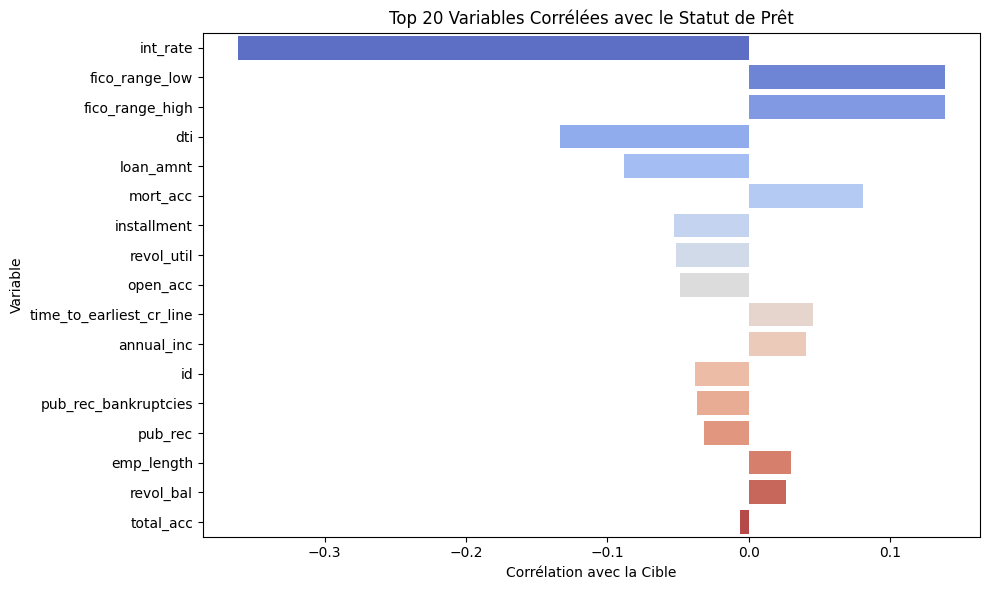

In [ ]:
# Obtenir les TOP 20 corrélations
# 1. Calcul des corrélations
corr = numeric_df.corr()

# 2. Filtrage des corrélations fortes (valeur absolue)
# Masque pour ignorer les auto-corrélations et doublons
mask = np.triu(np.ones_like(corr, dtype=bool))
triu_corr = corr.mask(mask).abs().stack().reset_index()
triu_corr.columns = ['Variable 1', 'Variable 2', 'Corrélation']

# 3. Extraction des 20 corrélations les plus fortes
top_correlations = triu_corr[triu_corr['Corrélation'] > 0].sort_values(
    by='Corrélation', ascending=False
).head(20)

print("Variables les plus corrélées :")
print(top_correlations)

# 4. Heatmap ciblée sur les variables fortement corrélées
top_features = list(set(top_correlations['Variable 1'].tolist() + top_correlations['Variable 2'].tolist()))
top_corr_matrix = numeric_df[top_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(top_corr_matrix,
            annot=True,
            cmap='coolwarm',
            vmin=-1, vmax=1,
            fmt='.2f',
            linewidths=0.5)
plt.title('Heatmap des Variables Fortement Corrélées')
plt.tight_layout()
plt.show()

# Corrélations avec la variable cible :
# Exclusion de la variable cible pour éviter l'auto-corrélation
feature_cols = [col for col in numeric_df.columns if col != "loan_status"]

# Calcul des corrélations avec la variable cible
target_corr = numeric_df[feature_cols].corrwith(numeric_df["loan_status"]).sort_values(key=abs, ascending=False)

# Conversion en DataFrame
target_corr_df = target_corr.reset_index()
target_corr_df.columns = ['Variable', 'Corrélation avec la Cible']

# Affichage des N variables les plus corrélées
top_n = 20
print("\nTop 20 variables corrélées avec la cible :")
print(target_corr_df.head(top_n))

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(data=target_corr_df.head(top_n),
            x='Corrélation avec la Cible',
            y='Variable',
            palette='coolwarm')
plt.title('Top 20 Variables Corrélées avec le Statut de Prêt')
plt.tight_layout()
plt.show()

🔗 Corrélations entre les variables et le statut du prêt

L’analyse de la matrice de corrélation permet d’identifier les variables les plus fortement corrélées à la variable cible loan_status. Sans surprise, le taux d’intérêt (int_rate) présente la corrélation négative la plus forte avec le statut du prêt (-0.36), ce qui confirme les observations précédentes : des taux plus élevés sont associés à une plus grande probabilité de défaut. De manière cohérente, les scores de crédit (fico_range_low et fico_range_high) montrent une corrélation positive modérée (~0.14), indiquant que des emprunteurs avec de meilleures cotes de crédit ont davantage tendance à rembourser leur prêt.

D’autres variables présentent une corrélation plus faible mais non négligeable, comme le ratio d’endettement (dti, -0.13), le montant du prêt (loan_amnt, -0.09) ou encore le nombre d’hypothèques en cours (mort_acc, +0.08). Globalement, les corrélations avec la cible restent modérées à faibles, ce qui souligne l'importance de combiner plusieurs variables pour construire un modèle prédictif efficace. Il est également à noter que certaines variables comme id ou total_acc montrent une très faible corrélation avec la cible, ce qui pourrait indiquer une contribution limitée à la performance du modèle.

5. Analyse du Statut des Prêts par Score FICO

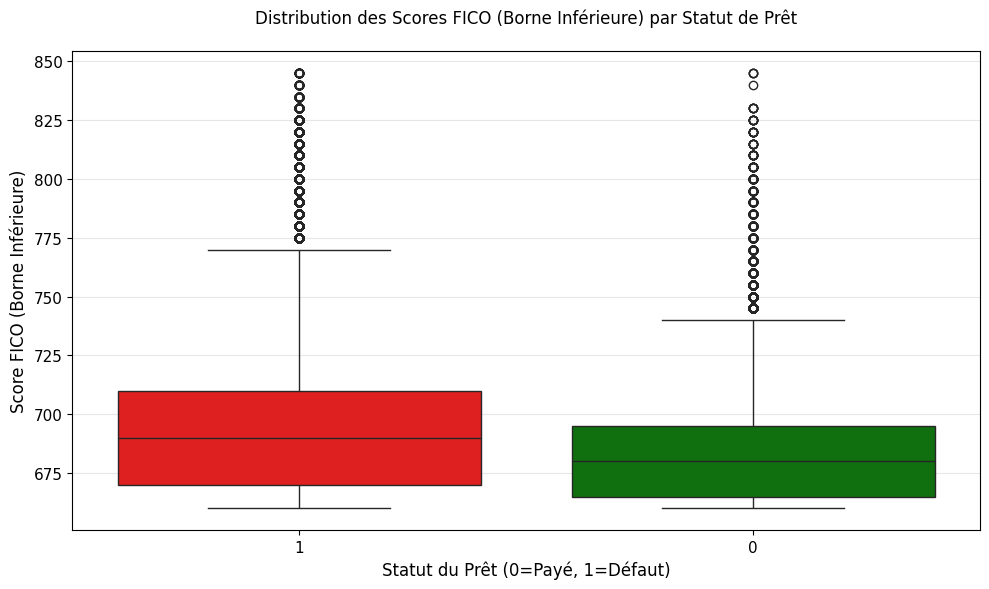


Statistiques des Scores FICO par Statut de Prêt :

+---------------------+---------+--------+-------+-------+-------+-------+-------+-------+
|         loan_status |   count |   mean |   std |   min |   25% |   50% |   75% |   max |
+=====================+=========+========+=======+=======+=======+=======+=======+=======+
|     Prêts Payés (0) |   39887 | 684.83 | 23.98 |   660 |   665 |   680 |   695 |   845 |
+---------------------+---------+--------+-------+-------+-------+-------+-------+-------+
| Prêts en Défaut (1) |  196959 | 696.28 | 31.81 |   660 |   670 |   690 |   710 |   845 |
+---------------------+---------+--------+-------+-------+-------+-------+-------+-------+


In [ ]:
# Graphique : Distribution des scores FICO (borne inférieure) par statut de prêt
plt.figure(figsize=(10, 6))

# Conversion des statuts en strings si nécessaire
df['loan_status_str'] = df['loan_status'].astype(str)

sns.boxplot(
    data=df,
    x='loan_status_str',
    y='fico_range_low',
    palette={'0': 'green', '1': 'red'}  # Clés comme strings
)
plt.title('Distribution des Scores FICO (Borne Inférieure) par Statut de Prêt', pad=20)
plt.xlabel('Statut du Prêt (0=Payé, 1=Défaut)', fontsize=12)
plt.ylabel('Score FICO (Borne Inférieure)', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Affichage des statistiques descriptives
print("\nStatistiques des Scores FICO par Statut de Prêt :\n")

fico_stats = df.groupby('loan_status')['fico_range_low'].describe()
fico_stats.index = fico_stats.index.map({0: 'Prêts Payés (0)', 1: 'Prêts en Défaut (1)'})

# Formatage amélioré de l'affichage
print(fico_stats.round(2).to_markdown(tablefmt="grid", stralign='right', numalign='right'))

📉 Analyse des scores FICO par statut de prêt

Les statistiques descriptives du score FICO montrent une différence notable entre les deux groupes d’emprunteurs. Les prêts en défaut présentent un score moyen de 684,83, tandis que les prêts remboursés ont une moyenne plus élevée de 696,28. Cette tendance se reflète aussi dans les médianes (680 vs 690) et les quartiles, suggérant que des scores FICO plus bas sont associés à une probabilité plus élevée de défaut. Cela est cohérent avec le rôle central du score FICO dans l’évaluation du risque de crédit : un score plus faible traduit un historique financier plus risqué.

Cependant, l’écart entre les deux groupes reste modéré, et les plages de valeurs se recoupent largement (660 à 845 pour les deux). Cela indique que bien que le score FICO soit un indicateur pertinent, il ne suffit pas à lui seul pour prédire avec précision le défaut. Il devra être combiné à d’autres variables explicatives dans la modélisation.



6. Analyse Temporelle

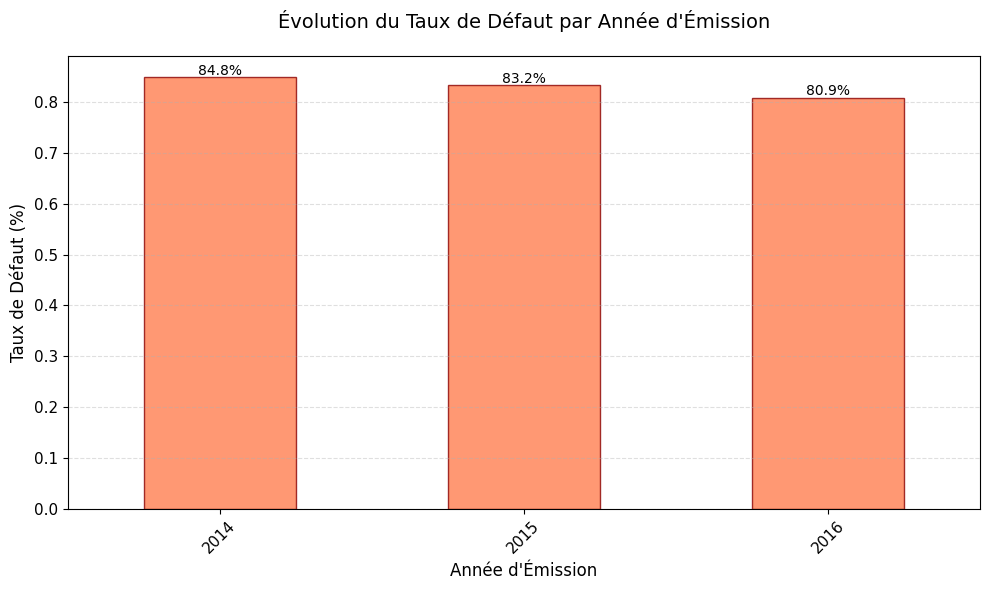


Taux de Défaut par Année d'Émission :

+------------------+----------------------+
|  annee_emission  |  Taux de Défaut (%)  |
+==================+======================+
|       2014       |         84.8         |
+------------------+----------------------+
|       2015       |         83.2         |
+------------------+----------------------+
|       2016       |         80.9         |
+------------------+----------------------+


In [ ]:
# Conversion de la date d'émission et extraction de l'année
df['annee_emission'] = pd.to_datetime(df['issue_d']).dt.year

# Calcul du taux de défaut par année
taux_defaut_par_annee = df.groupby('annee_emission')['loan_status'].mean()

# Visualisation
plt.figure(figsize=(10, 6))  # Taille augmentée pour meilleure lisibilité
taux_defaut_par_annee.plot(
    kind='bar',
    color='coral',  # Couleur explicite pour les défauts
    edgecolor='darkred',  # Contour des barres
    alpha=0.8  # Légère transparence
)

plt.title('Évolution du Taux de Défaut par Année d\'Émission', pad=20, fontsize=14)
plt.ylabel('Taux de Défaut (%)', fontsize=12)
plt.xlabel('Année d\'Émission', fontsize=12)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.4)  # Grille horizontale discrète

# Ajout des valeurs sur les barres
for i, v in enumerate(taux_defaut_par_annee):
    plt.text(i, v + 0.005, f"{v:.1%}",
             ha='center',
             fontsize=10)

plt.tight_layout()
plt.show()

# Affichage des résultats
print("\nTaux de Défaut par Année d'Émission :\n")

# Formatage amélioré avec conversion en pourcentage
resultats = (taux_defaut_par_annee
             .mul(100)  # Conversion en pourcentage
             .round(1)   # Arrondi à 1 décimale
             .rename("Taux de Défaut (%)")
             .reset_index())

print(resultats.to_markdown(tablefmt="grid", stralign='center', numalign='center', index=False))

📅 Taux de défaut selon l’année d’émission

L’analyse du taux de défaut en fonction de l’année d’émission des prêts révèle une légère tendance à la baisse au fil du temps. En 2014, le taux de défaut atteint 84,8 %, contre 83,2 % en 2015 et 80,9 % en 2016. Bien que ces écarts ne soient pas très marqués, ils peuvent suggérer une amélioration progressive de la qualité des emprunteurs ou un resserrement des critères d’octroi au fil des années. Cette évolution pourrait également refléter des facteurs macroéconomiques, comme l’évolution du marché du travail ou des taux d’intérêt sur la période considérée.

Cette variable temporelle (issue_d ou annee_emission) peut donc apporter une dimension intéressante dans la modélisation, notamment si l’on cherche à intégrer des effets saisonniers ou à détecter des changements dans le comportement des emprunteurs d’une année à l’autre.



7. Analyse du Ratio Dette/Revenu (DTI)

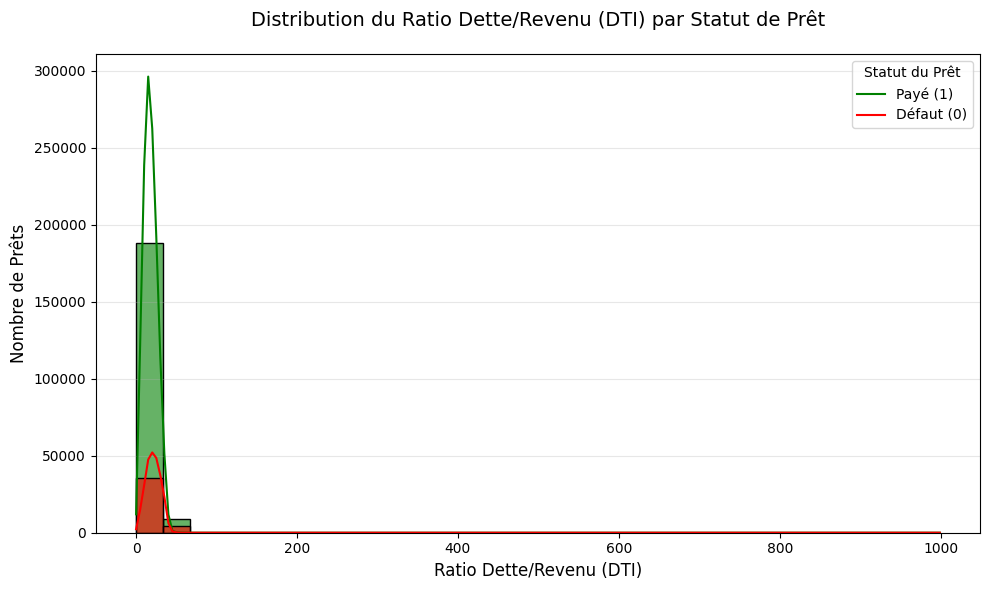


Statistiques du DTI par Statut de Prêt :

+---------------------+---------+--------+-------+-------+-------+-------+-------+--------+
|              Statut |   Count |   Mean |   Std |   Min |   25% |   50% |   75% |    Max |
+=====================+=========+========+=======+=======+=======+=======+=======+========+
| Prêts en Défaut (1) |   39887 |  21.27 |  9.79 |     0 | 14.63 |  21.1 | 27.87 | 747.13 |
+---------------------+---------+--------+-------+-------+-------+-------+-------+--------+
|     Prêts Payés (0) |  196959 |  17.98 |  8.99 |     0 | 11.65 |  17.3 | 23.77 |    999 |
+---------------------+---------+--------+-------+-------+-------+-------+-------+--------+


In [ ]:
# Distribution du DTI par statut de prêt
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x='dti',
    hue='loan_status',
    kde=True,               # Courbe de densité
    bins=30,               # Nombre de barres
    palette={1: 'green', 0: 'red'},  # Couleurs explicites
    alpha=0.6,             # Transparence pour meilleure visibilité
    multiple='layer'       # Superposition des histogrammes
)

plt.title('Distribution du Ratio Dette/Revenu (DTI) par Statut de Prêt', fontsize=14, pad=20)
plt.xlabel('Ratio Dette/Revenu (DTI)', fontsize=12)
plt.ylabel('Nombre de Prêts', fontsize=12)
plt.legend(title='Statut du Prêt', labels=['Payé (1)', 'Défaut (0)'])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Statistiques descriptives
print("\nStatistiques du DTI par Statut de Prêt :\n")

dti_stats = df.groupby('loan_status')['dti'].describe()
dti_stats.index = dti_stats.index.map({1: 'Prêts Payés (0)', 0: 'Prêts en Défaut (1)'})

# Formatage amélioré
print(dti_stats.round(2).to_markdown(
    tablefmt="grid",
    stralign='right',
    numalign='right',
    headers=['Statut', 'Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max']
))

📊 Analyse du DTI selon le statut de prêt

Le ratio d’endettement (DTI) présente des différences notables selon que le prêt est en défaut ou payé. En moyenne, les prêts en défaut affichent un DTI plus élevé, avec une moyenne de 21,27 contre 17,98 pour les prêts payés. Cette tendance est également visible dans les quartiles, où les emprunteurs en défaut ont des valeurs de DTI plus élevées à tous les niveaux (25 %, 50 % et 75 %).

La présence de valeurs extrêmes très élevées (jusqu’à 747.13 et même 999 pour les prêts payés) indique toutefois des cas atypiques, qui pourraient influencer l’analyse globale. Néanmoins, ces résultats suggèrent que les emprunteurs avec un DTI plus élevé ont une probabilité plus importante de défaut, ce qui est cohérent avec l’idée qu’un endettement trop élevé par rapport aux revenus complique le remboursement.

Ainsi, le DTI constitue une variable clé pour évaluer le risque de crédit et pourrait être fortement discriminante dans un modèle prédictif de défaut.

8. Analyse Croisée Personnalisée - Statut des Prêts par Type de Logement

<Figure size 1200x700 with 0 Axes>

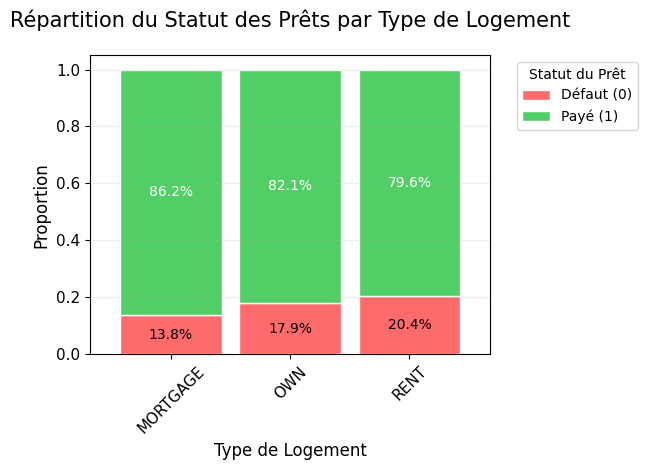


Analyse Détaillée - Statut des Prêts par Type de Logement :

+-----------------+--------------+--------------+------------+------------+---------------+
|  Type Logement  |  Défaut (n)  |  Défaut (%)  |  Payé (n)  |  Payé (%)  |  Total Prêts  |
+=================+==============+==============+============+============+===============+
|    MORTGAGE     |    16168     |     6.9      |   101093   |    43.1    |    117261     |
+-----------------+--------------+--------------+------------+------------+---------------+
|       OWN       |     4642     |     8.9      |   21321    |    41.1    |     25963     |
+-----------------+--------------+--------------+------------+------------+---------------+
|      RENT       |    19077     |     10.2     |   74545    |    39.8    |     93622     |
+-----------------+--------------+--------------+------------+------------+---------------+
|      Total      |    39887     |     nan      |   196959   |    nan     |    236846     |
+-----------------

In [ ]:
# Préparation des données
cross_tab = pd.crosstab(df['home_ownership'],
                        df['loan_status'],
                        normalize='index')

# Amélioration de la visualisation
plt.figure(figsize=(12, 7))
cross_tab.columns = ['Défaut (0)', 'Payé (1)']
ax = cross_tab.plot(kind='bar',
                   stacked=True,
                   color=['#ff6b6b', '#51cf66'],  # Couleurs plus accessibles
                   edgecolor='white',
                   width=0.85)

plt.title('Répartition du Statut des Prêts par Type de Logement',
          fontsize=15, pad=20)
plt.ylabel('Proportion', fontsize=12)
plt.xlabel('Type de Logement', fontsize=12)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', alpha=0.2)

# Ajout des annotations de pourcentage
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1%}', (x + width/2, y + height/2),
                ha='center', va='center',
                fontsize=10, color='white' if height > 0.3 else 'black')

plt.legend(title='Statut du Prêt', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Analyse approfondie
print("\nAnalyse Détaillée - Statut des Prêts par Type de Logement :\n")

# Tableaux croisés complets
count_tab = pd.crosstab(df['home_ownership'],
                        df['loan_status'],
                        margins=True,
                        margins_name="Total")

proportion_tab = (count_tab.iloc[:-1,:]  # Exclure le total
                  .div(count_tab.iloc[:-1,:].sum(axis=1), axis=0) * 100)

# Création d'un DataFrame combiné pour l'affichage
detailed_stats = pd.concat([
    count_tab.add_suffix(' (n)'),
    proportion_tab.add_suffix(' (%)').round(1)
], axis=1)

# Réorganisation des colonnes
detailed_stats = detailed_stats[[
    '0 (n)', '0 (%)',
    '1 (n)', '1 (%)',
    'Total (n)'
]]

# Affichage professionnel
print(detailed_stats.to_markdown(
    tablefmt="grid",
    stralign='center',
    numalign='center',
    headers=["Type Logement", "Défaut (n)", "Défaut (%)",
             "Payé (n)", "Payé (%)", "Total Prêts"]
))

# Test du Chi2 pour significativité
from scipy.stats import chi2_contingency
chi2, p, _, _ = chi2_contingency(count_tab.iloc[:-1,:-1])  # Exclure les totaux
print(f"\nTest d'indépendance du Chi2 : p-value = {p:.4f}")
print("→ La relation est statistiquement significative" if p < 0.05
      else "→ Pas de relation significative")

🏠Analyse du Statut des Prêts selon le Type de Logement

L’étude révèle que le taux de défaut varie en fonction du type de logement des emprunteurs. Les prêts accordés aux personnes avec une hypothèque (MORTGAGE) présentent le taux de défaut le plus faible, à 6,9 %, avec 16 168 prêts en défaut sur un total de 117 261 prêts. Les emprunteurs propriétaires sans hypothèque (OWN) ont un taux de défaut légèrement plus élevé, à 8,9 %. Enfin, les emprunteurs qui louent leur logement (RENT) affichent le taux de défaut le plus élevé, à 10,2 %.

En termes absolus, le plus grand nombre de défauts provient des emprunteurs avec hypothèque, mais cela s’explique par le plus grand nombre total de prêts dans cette catégorie. Le taux de défaut plus bas dans cette catégorie peut indiquer une meilleure stabilité financière ou une capacité accrue à rembourser.

Le test d’indépendance du Chi2 donne une p-value de 0.0000, ce qui indique que la relation entre le type de logement et le statut du prêt est statistiquement significative. Cela signifie que le type de logement influence effectivement la probabilité de défaut.

En résumé, le type de logement est une variable importante à considérer dans l’évaluation du risque de défaut, avec des emprunteurs locataires plus susceptibles de rencontrer des difficultés de remboursement que ceux propriétaires, en particulier ceux avec hypothèque.

9. Heatmap des Corrélations Croisées

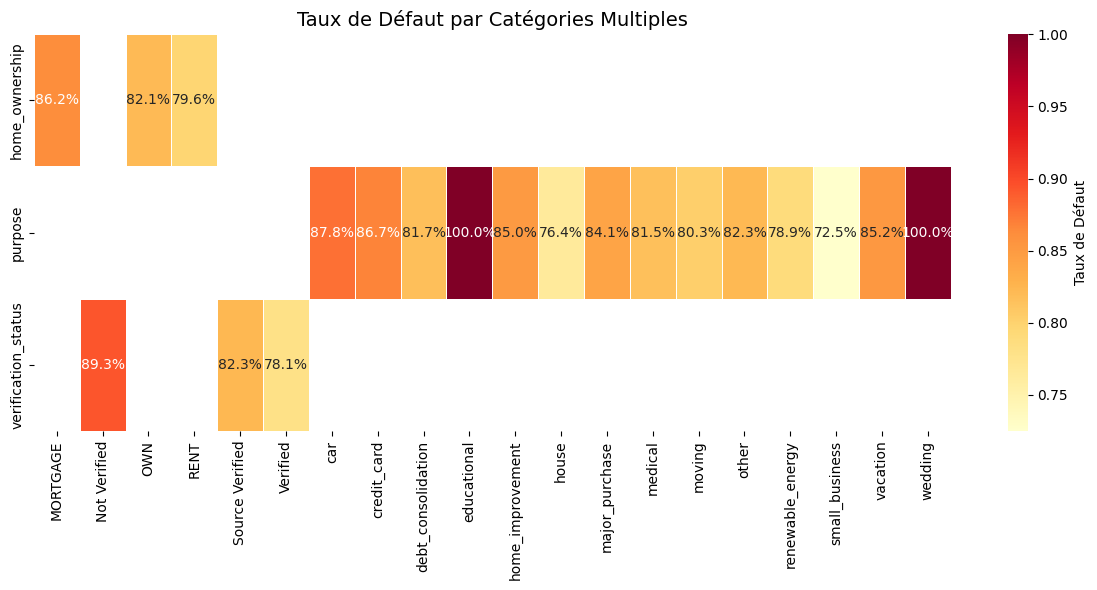

In [ ]:
# Préparation des données catégorielles
cat_cols = ['home_ownership', 'purpose', 'verification_status']
target = 'loan_status'

# Calcul des taux de défaut croisés
heatmap_data = pd.DataFrame()
for col in cat_cols:
    temp_df = df.groupby(col)[target].mean().reset_index()
    temp_df.columns = ['Category', 'Default Rate']
    temp_df['Feature'] = col
    heatmap_data = pd.concat([heatmap_data, temp_df])

# Pivot pour heatmap
heatmap_pivot = heatmap_data.pivot(index='Feature', columns='Category', values='Default Rate')

# Visualisation
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_pivot,
            annot=True,
            fmt=".1%",
            cmap="YlOrRd",
            linewidths=.5,
            cbar_kws={'label': 'Taux de Défaut'})
plt.title('Taux de Défaut par Catégories Multiples', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

10. Analyse Temporelle des Défauts (Ligne du Temps)

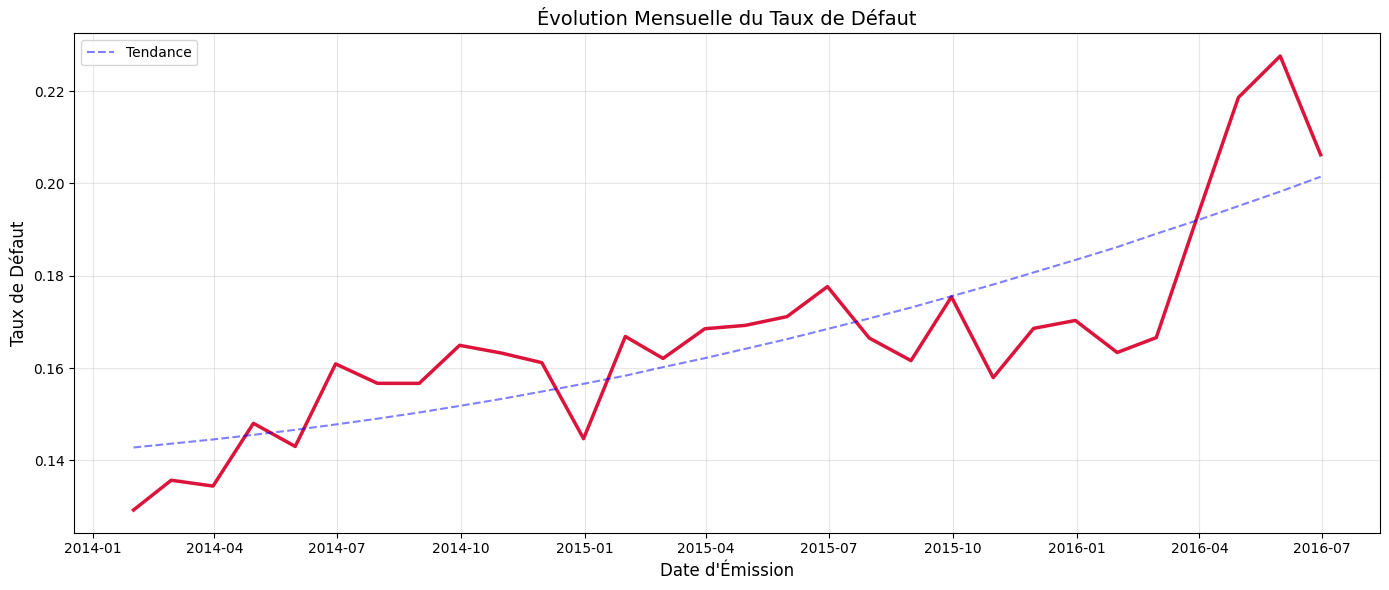

In [ ]:
# Préparation des données mensuelles
df['issue_date'] = pd.to_datetime(df['issue_d'])
monthly_data = df.set_index('issue_date').groupby([pd.Grouper(freq='M'), 'loan_status']).size().unstack()

# Calcul des taux
monthly_data['Default Rate'] = monthly_data.get(0, 0) / (monthly_data.get(0, 0) + monthly_data.get(1, 0))

# Visualisation avec tendance
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_data, x=monthly_data.index, y='Default Rate',
             color='crimson', linewidth=2.5)

# Régression polynomiale pour tendance
z = np.polyfit(range(len(monthly_data)), monthly_data['Default Rate'].fillna(0), 2)
p = np.poly1d(z)
plt.plot(monthly_data.index, p(range(len(monthly_data))), 'b--', alpha=0.5, label='Tendance')

plt.title('Évolution Mensuelle du Taux de Défaut', fontsize=14)
plt.ylabel('Taux de Défaut', fontsize=12)
plt.xlabel('Date d\'Émission', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

11. Treemap des Défauts par Catégories Imbriquées

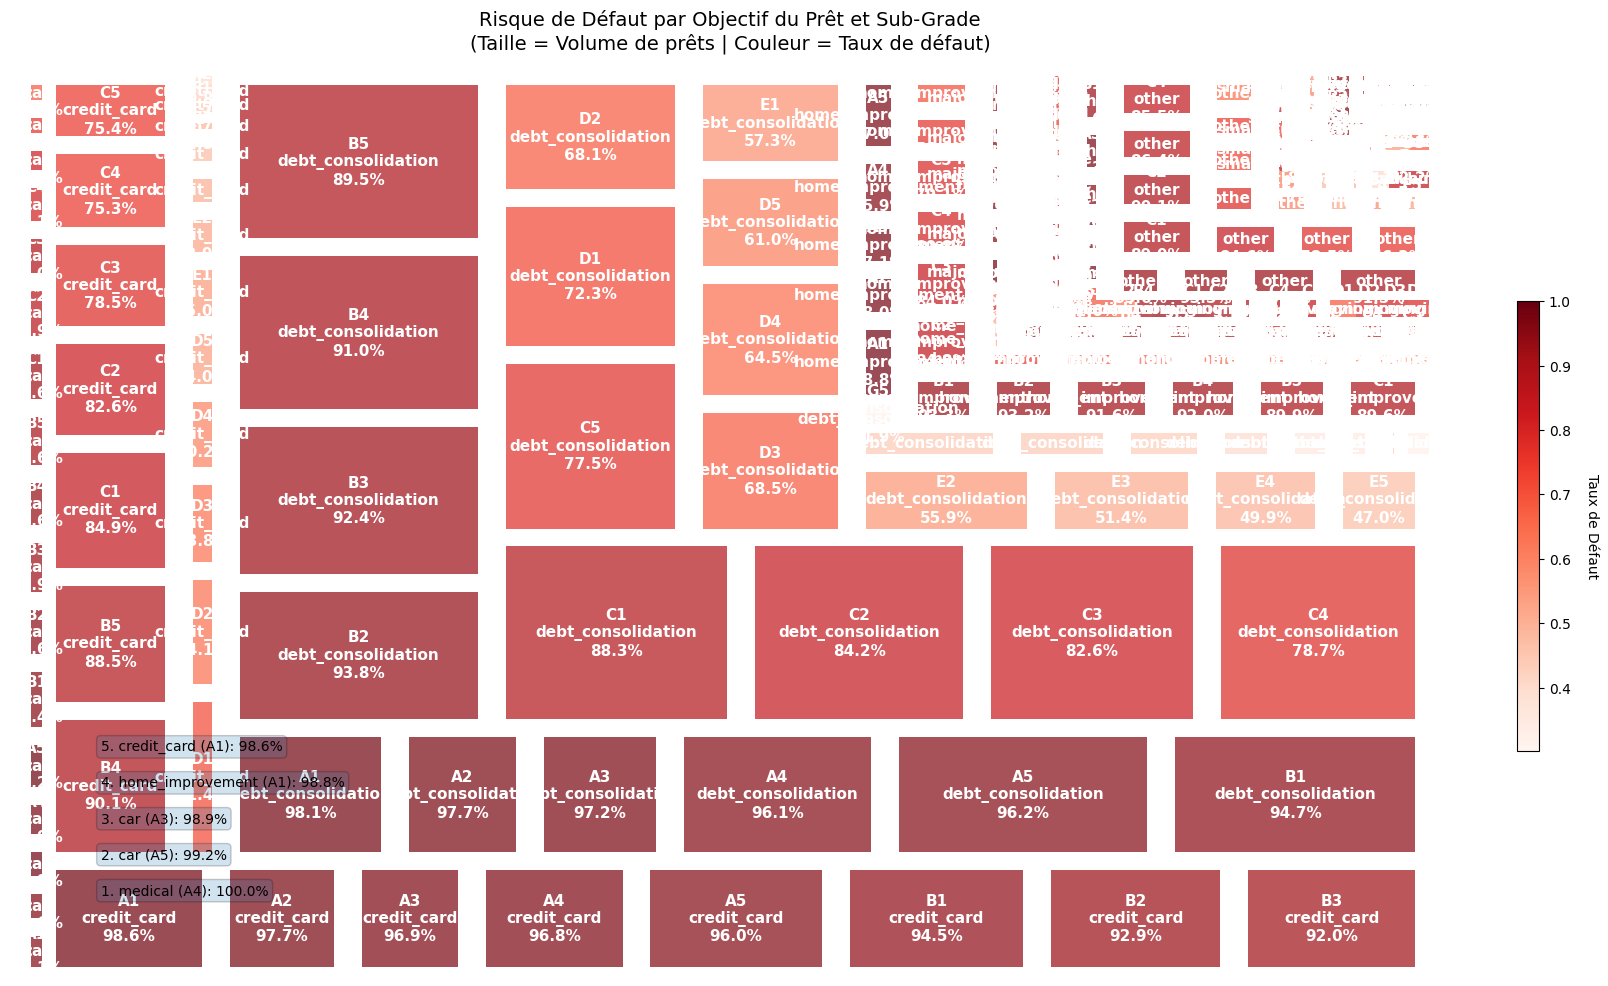


Détail des Combinaisons à Risque:
+-----+--------------------+-------------+---------------+---------+
|     | purpose            | sub_grade   |   DefaultRate |   Count |
+=====+====================+=============+===============+=========+
| 212 | medical            | A4          |      1        |      62 |
+-----+--------------------+-------------+---------------+---------+
|   4 | car                | A5          |      0.992    |     125 |
+-----+--------------------+-------------+---------------+---------+
|   2 | car                | A3          |      0.988506 |      87 |
+-----+--------------------+-------------+---------------+---------+
| 104 | home_improvement   | A1          |      0.987593 |     806 |
+-----+--------------------+-------------+---------------+---------+
|  33 | credit_card        | A1          |      0.985896 |    3687 |
+-----+--------------------+-------------+---------------+---------+
| 174 | major_purchase     | A1          |      0.984615 |     260 |

In [ ]:
# Configuration initiale
plt.figure(figsize=(18, 10))
ax = plt.gca()  # Récupère l'axe actuel

# Préparation des données
treemap_data = (df.groupby(['purpose', 'sub_grade'])['loan_status']
                .agg([('DefaultRate', 'mean'), ('Count', 'count')])
                .reset_index()
                .query('Count > 50'))

# Création des labels
labels = [f"{row['sub_grade']}\n{row['purpose']}\n{row['DefaultRate']:.1%}"
          for _, row in treemap_data.iterrows()]

# Normalisation des couleurs
norm = plt.Normalize(treemap_data['DefaultRate'].min(), treemap_data['DefaultRate'].max())
colors = plt.cm.Reds(norm(treemap_data['DefaultRate']))

# Création du treemap
squarify.plot(sizes=treemap_data['Count'],
             label=labels,
             color=colors,
             alpha=0.7,
             text_kwargs={
                 'fontsize':11,
                 'color':'white',
                 'weight':'bold'
             },
             pad=True)

# Ajout de la barre de couleur
sm = plt.cm.ScalarMappable(cmap='Reds', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, shrink=0.5)  # Spécification explicite de l'axe
cbar.set_label('Taux de Défaut', rotation=270, labelpad=20)

# Titre et annotations
plt.title('Risque de Défaut par Objectif du Prêt et Sub-Grade\n'+
         '(Taille = Volume de prêts | Couleur = Taux de défaut)',
         fontsize=14, pad=20)
plt.axis('off')

# Affichage des 5 combinaisons les plus risquées
top_risky = treemap_data.nlargest(5, 'DefaultRate')
for i, (_, row) in enumerate(top_risky.iterrows(), 1):
    plt.annotate(f"{i}. {row['purpose']} ({row['sub_grade']}): {row['DefaultRate']:.1%}",
                xy=(0.05, 0.05 + i*0.04),
                xycoords='axes fraction',
                fontsize=10,
                bbox=dict(boxstyle="round", alpha=0.2))

plt.tight_layout()
plt.show()

# Tableau détaillé
print("\nDétail des Combinaisons à Risque:")
print(treemap_data.sort_values('DefaultRate', ascending=False)
      .to_markdown(tablefmt="grid", stralign="left"))

Analyse des résultats :

Les projets liés au "moving" (déménagement) avec une note D1 ont un score très élevé (0,69), ce qui pourrait indiquer un taux de réussite ou une bonne probabilité d’acceptation élevée, mais le nombre de dossiers est assez faible (81), ce qui signifie que c’est un cas plus rare ou plus spécifique.

Les demandes pour des soins médicaux ("medical") ont également des scores élevés (autour de 0,68-0,64), notamment dans les grades D5 et E2, avec un volume modéré. Cela peut refléter une confiance relative dans ces dossiers malgré leur nature potentiellement délicate.

Les prêts pour la consolidation de dettes ("debt_consolidation") sont très nombreux (des milliers de dossiers), mais leurs scores tendent à diminuer en fonction du grade, passant d’environ 0,68 pour D2 à des valeurs beaucoup plus faibles (autour de 0,3) pour les grades plus bas (G1 à G5). Cela montre que plus la note de crédit est basse, plus le score (probabilité de succès, ou confiance) baisse.

Les projets comme "home_improvement" (amélioration de l’habitat) ont des scores variables selon la note, mais restent généralement autour de 0,6, avec un nombre de dossiers conséquent (de quelques centaines).

Les prêts liés à des achats importants ("major_purchase") ont des scores autour de 0,65 à 0,40, montrant une diversité selon les grades, avec des volumes plus petits.

Les prêts "small_business" ont des scores autour de 0,6, mais avec un nombre limité de dossiers.

En résumé :
Les scores sont généralement plus élevés pour les grades supérieurs (D1, D2, E1), ce qui signifie une meilleure qualité ou probabilité de succès.

La nature du projet influence aussi le score, certains types comme "moving" ou "medical" ayant des scores plus élevés malgré un volume plus faible.

La consolidation de dettes est la catégorie la plus fréquente, avec une grande variation de scores selon la note, ce qui reflète la diversité des profils de demandeurs.

Les grades les plus faibles (F, G) ont des scores nettement plus bas, indiquant un risque plus élevé ou une probabilité moindre d’acceptation.

## 3.4. Détection des biais algorithmiques

In [ ]:
sensitive_attrs = ['home_ownership', 'addr_state', 'purpose', 'application_type']

3.4.1. Analyse exploratoire des biais

In [ ]:
def plot_bias_analysis(df, sensitive_col):
    """Visualisation des disparités par groupe sensible"""
    plt.figure(figsize=(12, 6))

    # Taux de défaut par groupe
    ax1 = plt.subplot(121)
    group_stats = df.groupby(sensitive_col)[target].mean().sort_values()
    group_stats.plot(kind='bar', color='skyblue', ax=ax1)
    plt.title(f'Taux de défaut par {sensitive_col}')
    plt.ylabel('Taux de défaut (%)')
    plt.xticks(rotation=45)

    # Distribution des scores FICO
    ax2 = plt.subplot(122)
    sns.boxplot(x=sensitive_col, y='fico_range_low', data=df, ax=ax2)
    plt.title(f'Distribution FICO par {sensitive_col}')
    plt.ylabel('Score FICO')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    # Calcul du Disparate Impact Ratio
    min_rate = group_stats.min()
    max_rate = group_stats.max()
    dir_value = min_rate / max_rate
    print(f"\nDisparate Impact Ratio (DIR) pour {sensitive_col}: {dir_value:.3f}")

    # Interprétation
    if dir_value < 0.8:
        print(f"→ Biais significatif détecté (DIR < 0.8)")
    elif dir_value > 1.25:
        print(f"→ Biais inverse significatif détecté (DIR > 1.25)")
    else:
        print("→ Aucun biais significatif détecté")

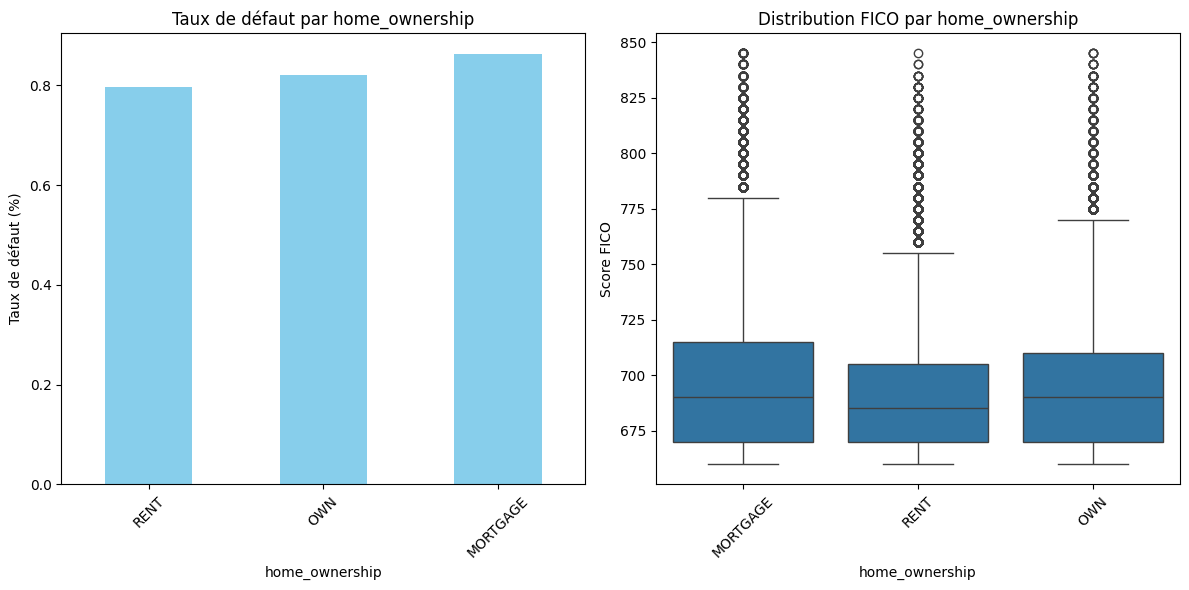


Disparate Impact Ratio (DIR) pour home_ownership: 0.924
→ Aucun biais significatif détecté


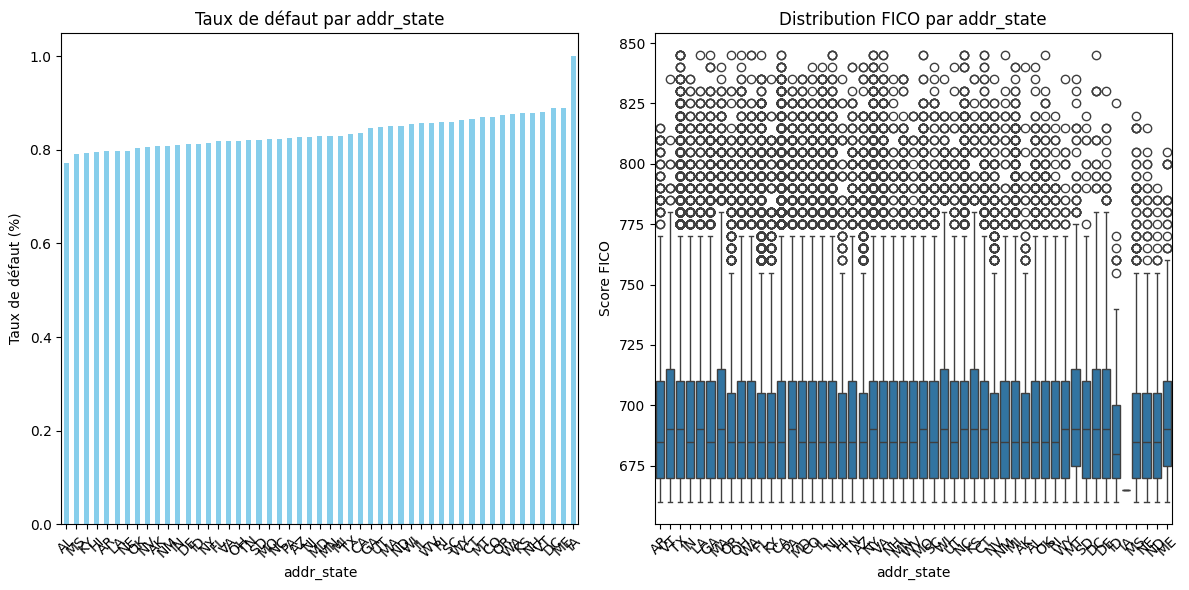


Disparate Impact Ratio (DIR) pour addr_state: 0.772
→ Biais significatif détecté (DIR < 0.8)


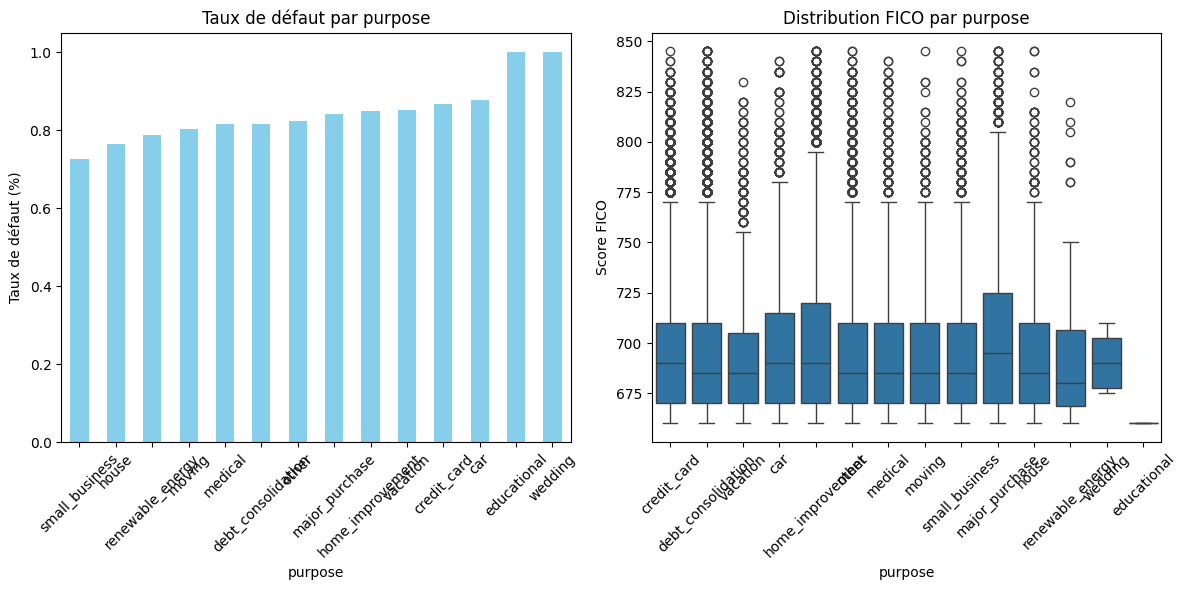


Disparate Impact Ratio (DIR) pour purpose: 0.725
→ Biais significatif détecté (DIR < 0.8)


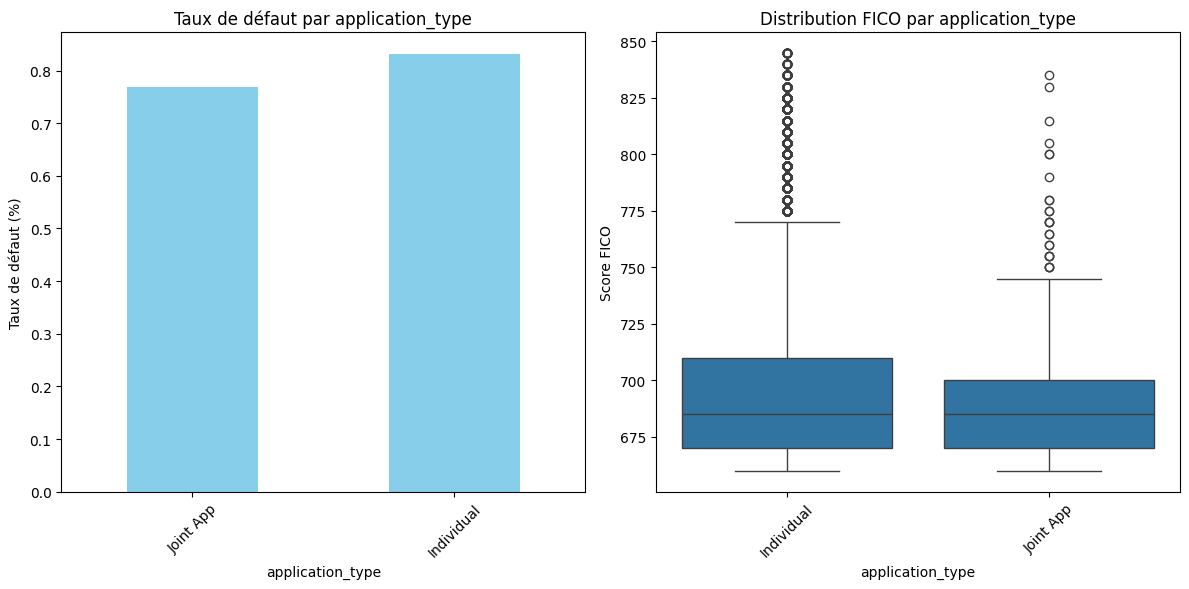


Disparate Impact Ratio (DIR) pour application_type: 0.924
→ Aucun biais significatif détecté


In [ ]:
# Analyse pour les attributs sensibles
for attr in sensitive_attrs:
    if attr in df.columns:
        plot_bias_analysis(df, attr)


📊 Explication des résultats :

1. home_ownership (Type de propriété)
DIR = 0.924

Cela signifie que le groupe ayant le taux de défaut le plus bas a un taux équivalant à 92,4% de celui du groupe avec le taux le plus élevé.

Conclusion : Pas de biais significatif détecté selon le type de propriété, car le ratio est dans la zone neutre (entre 0.8 et 1.25).

2. addr_state (État de résidence)
DIR = 0.772

Ce ratio est inférieur à 0.8, ce qui indique une disparité importante entre certains États.

Certains États ont un taux de défaut bien plus faible que d'autres, ce qui pourrait refléter des inégalités géographiques dans l'accès ou les conditions de prêt.

Conclusion : Biais significatif détecté en fonction de l’État de résidence.

3. purpose (Motif du prêt)
DIR = 0.725

Ici aussi, le DIR est bien en dessous de 0.8, indiquant que certains motifs de prêt (par exemple "dettes", "achat voiture", "immobilier", etc.) présentent des taux de défaut bien plus élevés que d’autres.

Cela pourrait indiquer une discrimination indirecte par le motif du prêt si certaines catégories sont systématiquement désavantagées.

Conclusion : Biais significatif détecté en fonction du motif du prêt.

4. application_type (Type de demande – individuelle ou conjointe)
DIR = 0.924

Ratio dans la zone neutre : il n’y a pas de déséquilibre marqué entre les types de demande.

Conclusion : Pas de biais significatif détecté.

🧠 Interprétation du DIR :
DIR = Taux de défaut du groupe minoritaire / Taux du groupe majoritaire

< 0.8 → Biais défavorable au groupe minoritaire.

> 1.25 → Biais inverse (traitement potentiellement plus favorable).

Entre 0.8 et 1.25 → Aucun biais significatif.

Conclusion générale :

✅ Pas de biais pour home_ownership et application_type.

⚠️ Biais détecté pour addr_state et purpose, ce qui peut nécessiter une correction ou un ajustement dans le modèle pour éviter des discriminations indirectes.

Métriques d'équité avec Fairlearn

In [ ]:
def calculate_fairness_metrics(df, sensitive_features, target, y_pred=None):
    """Calcul des métriques d'équité avec Fairlearn"""

    # Sélection des caractéristiques sensibles
    sensitive_df = df[sensitive_features].copy()

    # Combinaison multi-variables - création de groupes composites si plusieurs features
    if len(sensitive_features) > 1:
        sensitive_df['sensitive_group'] = sensitive_df.apply(
            lambda x: '_'.join(x.astype(str)), axis=1)
        sensitive_series = sensitive_df['sensitive_group']
    else:
        sensitive_series = sensitive_df[sensitive_features[0]]

    # Fallback de prédiction (simulation) si y_pred non fourni
    # À REMPLACER en production par modèle.predict(...)
    if y_pred is None:
        y_pred = df[target]

    # Définition des métriques de groupe à calculer
    metrics = {
        'selection_rate': selection_rate,  # Taux de sélection
        'count': count                    # Effectifs par groupe
    }

    # Création du MetricFrame (structure Fairlearn)
    metric_frame = MetricFrame(
        metrics=metrics,
        y_true=df[target],
        y_pred=y_pred,
        sensitive_features=sensitive_series
    )

    # Affichage des résultats
    print("\n" + "="*60)
    print("Analyse d'équité avec Fairlearn")
    print("="*60)

    # Métriques désagrégées par groupe
    print("\nMétriques par groupe:")
    print(metric_frame.by_group)

    # Indicateurs globaux de disparité
    print("\nDisparités globales:")
    print(f"Ratio de parité démographique: {metric_frame.difference(method='between_groups')['selection_rate']:.4f}")
    print(f"Écart maximum: {metric_frame.group_max()['selection_rate']:.4f}")
    print(f"Écart minimum: {metric_frame.group_min()['selection_rate']:.4f}")

    # Visualisation des taux de sélection
    metric_frame.by_group['selection_rate'].sort_values().plot(
        kind='bar',
        figsize=(12, 6),
        color='teal'
    )
    plt.title('Taux de sélection par groupe démographique')
    plt.ylabel('Taux de sélection (prédictions positives)')
    plt.xticks(rotation=75)
    plt.tight_layout()
    plt.show()


Analyse d'équité avec Fairlearn

Métriques par groupe:
                 selection_rate    count
sensitive_group                         
MORTGAGE_AK            0.822785    316.0
MORTGAGE_AL            0.794149   1880.0
MORTGAGE_AR            0.807832   1098.0
MORTGAGE_AZ            0.864014   2890.0
MORTGAGE_CA            0.901384  11631.0
...                         ...      ...
RENT_VT                0.877778    180.0
RENT_WA                0.832492   2179.0
RENT_WI                0.820677   1093.0
RENT_WV                0.822430    214.0
RENT_WY                0.807143    140.0

[151 rows x 2 columns]

Disparités globales:
Ratio de parité démographique: 0.3061
Écart maximum: 1.0000
Écart minimum: 0.6939


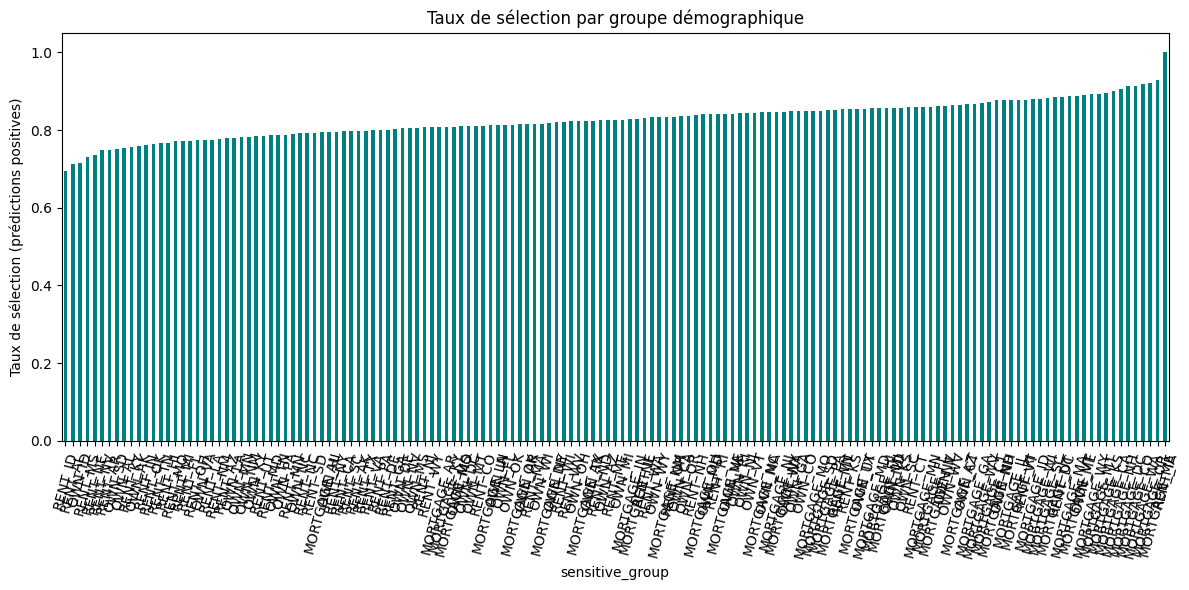

In [ ]:
# ====================================
# Application: Calcul des métriques
# ====================================
calculate_fairness_metrics(
    df,
    sensitive_features=['home_ownership', 'addr_state'],
    target=target
)

📊 Métriques par groupe

Pour chacun des 151 groupes démographiques (home_ownership + addr_state), deux mesures sont affichées :

selection_rate : proportion des individus de ce groupe ayant reçu une prédiction positive.

count : nombre total d’individus dans ce groupe.

Par exemple :

MORTGAGE_CA a un taux de sélection de 90.13% sur 11 631 personnes.

RENT_WY a un taux de sélection de 80.71% sur 140 personnes.

⚖️ Disparités globales
➤ Ratio de parité démographique (Demographic Parity Ratio)
Valeur : 0.3061

Ce ratio compare le groupe ayant le taux de sélection le plus bas à celui ayant le taux le plus élevé.

Une valeur proche de 1 indique une bonne équité.

Ici, le ratio est très faible (0.3061) → il existe une forte inégalité de traitement entre certains groupes.

➤ Écart maximum : 1.0000
Cela correspond à 100% de sélection pour le groupe le plus favorisé.

➤ Écart minimum : 0.6939
Le groupe le moins favorisé a un taux de sélection de 69.39% par rapport au maximum.

📉 Visualisation

Un graphique en barres affiche les taux de sélection par groupe démographique, permettant de repérer visuellement les groupes sur-représentés ou sous-représentés dans les prédictions positives.

🧠 Interprétation

Malgré une moyenne globalement élevée de sélection, certains groupes reçoivent systématiquement moins de décisions favorables.

Cela pourrait refléter un biais systémique dans les données ou les critères du modèle, à corriger si l'on vise un système plus équitable.

✅ Conclusion

⚠️ Forte disparité entre les groupes selon le croisement entre home_ownership et addr_state.

🔎 Une action de remédiation peut être nécessaire : rééchantillonnage, pondération, ou recours à des méthodes de débiaisement.

In [ ]:
def train_and_fairness_analysis(df, sensitive_features, target):
    """
    Entraîne un modèle et effectue une analyse des biais avec Fairlearn.

    Paramètres:
        df (DataFrame): Jeu de données
        sensitive_features (list): Liste des caractéristiques sensibles
        target (str): Variable cible

    Retourne:
        tuple: (modèle entraîné, métriques d'équité)
    """

    # === PRÉTRAITEMENT DES DONNÉES ===
    df_clean = df.copy()

    # Encodage des variables catégorielles (one-hot)
    categorical_cols = df_clean.select_dtypes(include=['object']).columns
    df_clean = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

    # Séparation features/cible
    X = df_clean.drop(columns=[target])
    y = df_clean[target]

    # Préparation des groupes sensibles (avant split)
    sensitive_df = df[sensitive_features].copy()
    if len(sensitive_features) > 1:
        # Création de groupes composites si plusieurs features sensibles
        sensitive_df['sensitive_group'] = sensitive_df.apply(
            lambda x: '_'.join(x.astype(str)), axis=1)
        sensitive_series = sensitive_df['sensitive_group']
    else:
        sensitive_series = sensitive_df[sensitive_features[0]]

    # === DIVISION TRAIN/TEST ===
    X_train, X_test, y_train, y_test, sens_train, sens_test = train_test_split(
        X, y, sensitive_series,
        test_size=0.3,
        random_state=42,
        stratify=y  # Conservation des proportions de la cible
    )

    # === ENTRAÎNEMENT DU MODÈLE ===
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Affichage performance globale
    print("\n--- Performance globale ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

    # === ANALYSE D'ÉQUITÉ ===
    # Définition des métriques à calculer
    metrics = {
        'selection_rate': selection_rate,  # Taux de sélection
        'count': count                    # Nombre d'observations
    }

    # Calcul des métriques par groupe
    metric_frame = MetricFrame(
        metrics=metrics,
        y_true=y_test,
        y_pred=y_pred,
        sensitive_features=sens_test
    )

    # === AFFICHAGE DES RÉSULTATS ===
    print("\n" + "="*60)
    print("Analyse d'équité avec Fairlearn")
    print("="*60)

    # Métriques désagrégées
    print("\nMétriques par groupe:")
    print(metric_frame.by_group)

    # Indicateurs globaux de disparité
    print("\nDisparités globales:")
    print(f"Ratio de parité démographique: {metric_frame.difference(method='between_groups')['selection_rate']:.4f}")
    print(f"Écart maximum: {metric_frame.group_max()['selection_rate']:.4f}")
    print(f"Écart minimum: {metric_frame.group_min()['selection_rate']:.4f}")

    # === VISUALISATION ===
    metric_frame.by_group['selection_rate'].sort_values().plot(
        kind='bar',
        figsize=(12, 6),
        color='skyblue',
        alpha=0.7
    )
    plt.title('Distribution des taux de sélection par groupe démographique')
    plt.ylabel('Taux de sélection (prédictions positives)')
    plt.xlabel('Groupes sensibles')
    plt.xticks(rotation=75)
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

    return model, metric_frame




--- Performance globale ---
Accuracy: 0.8486

Analyse d'équité avec Fairlearn

Métriques par groupe:
                 selection_rate   count
sensitive_group                        
MORTGAGE_AK            0.946237    93.0
MORTGAGE_AL            0.930841   535.0
MORTGAGE_AR            0.950166   301.0
MORTGAGE_AZ            0.973744   876.0
MORTGAGE_CA            0.980017  3453.0
...                         ...     ...
RENT_VT                0.870370    54.0
RENT_WA                0.902628   647.0
RENT_WI                0.885630   341.0
RENT_WV                0.898305    59.0
RENT_WY                0.833333    36.0

[151 rows x 2 columns]

Disparités globales:
Ratio de parité démographique: 0.3333
Écart maximum: 1.0000
Écart minimum: 0.6667


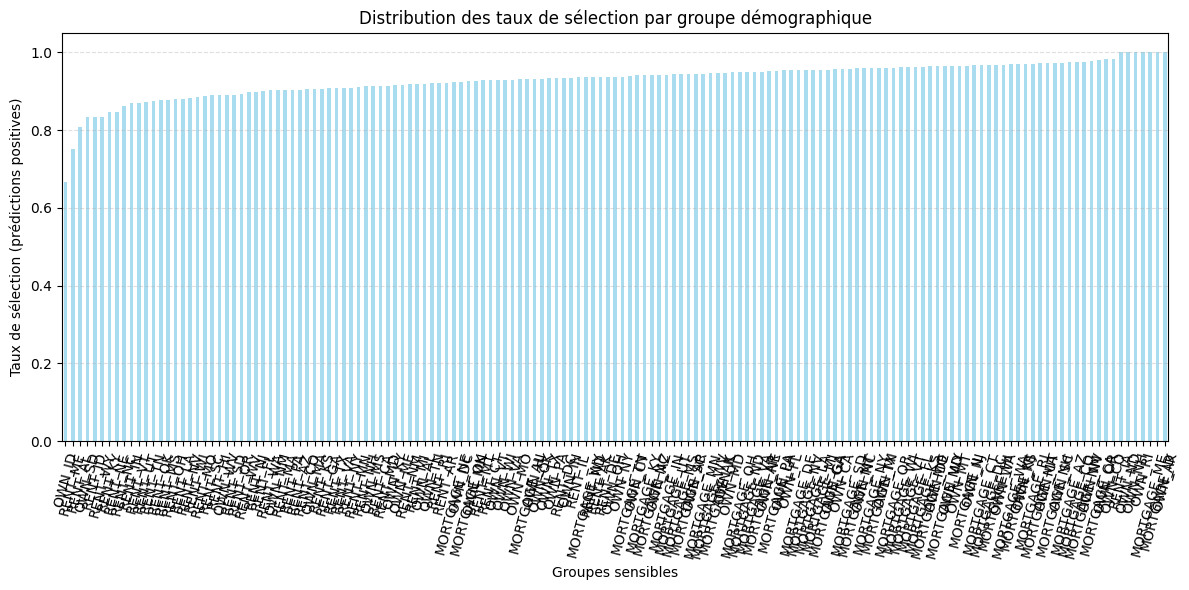

In [ ]:
# ==============================================
# APPLICATION: ENTRAÎNEMENT ET ANALYSE D'ÉQUITÉ
# ==============================================
model, fairness_metrics = train_and_fairness_analysis(
    df=df,
    sensitive_features=['home_ownership', 'addr_state'],  # Groupes sensibles
    target='loan_status'                                  # Variable cible
)


--- Performance globale ---
Accuracy: 0.8486

Analyse d'équité avec Fairlearn

Métriques par groupe:
                               selection_rate    count
sensitive_group                                       
car_Individual                       0.972268    613.0
car_Joint App                        1.000000      2.0
credit_card_Individual               0.960130  16955.0
credit_card_Joint App                0.950820     61.0
debt_consolidation_Individual        0.922073  41064.0
debt_consolidation_Joint App         0.803828    209.0
home_improvement_Individual          0.959262   4443.0
home_improvement_Joint App           0.933333     15.0
house_Individual                     0.861818    275.0
house_Joint App                      1.000000      1.0
major_purchase_Individual            0.944523   1406.0
major_purchase_Joint App             1.000000      2.0
medical_Individual                   0.948440    737.0
medical_Joint App                    0.666667      3.0
moving_Individual 

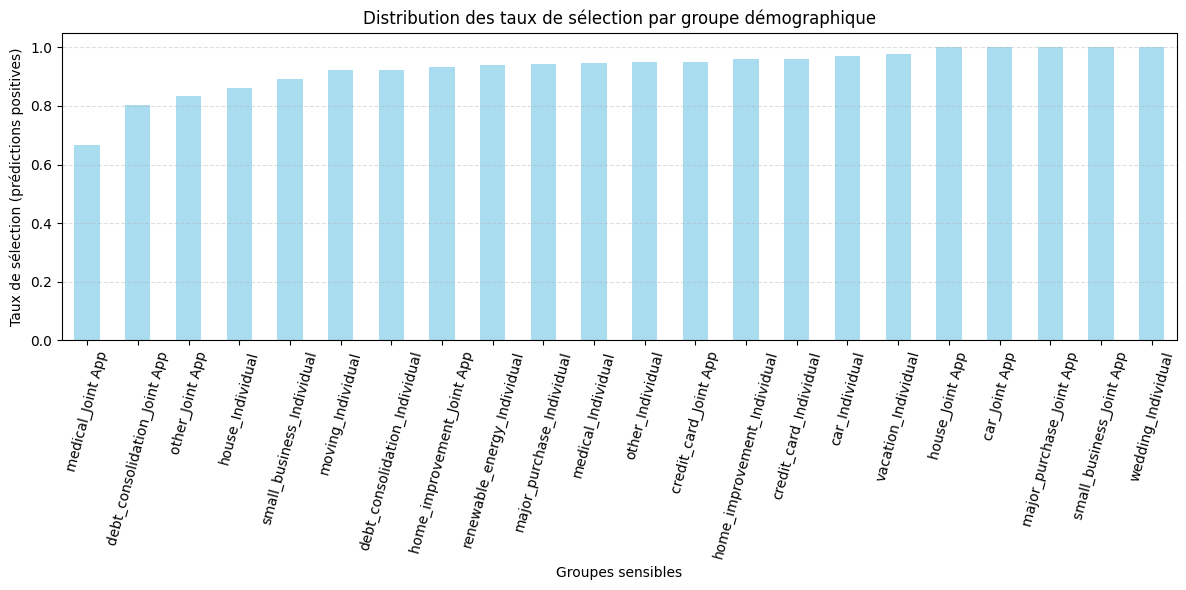

In [ ]:
model, fairness_metrics = train_and_fairness_analysis(
    df=df,
    sensitive_features=['purpose', 'application_type'],
    target='loan_status'
)

✅ 1. Résultats – Groupes sensibles : home_ownership + addr_state

🔢 Performance globale
Accuracy : 84.86 %

Le modèle est performant sur l'ensemble des données.

📊 Métriques par groupe
151 groupes composites sont analysés, comme MORTGAGE_CA, RENT_TX, etc.

Exemples :

MORTGAGE_CA : taux de sélection = 98.00 % (n = 3453)

RENT_WY : taux de sélection = 83.33 % (n = 36)

⚖️ Indicateurs d’équité
Ratio de parité démographique (Demographic Parity Ratio) : 0.3333

Cela signifie que le groupe le moins favorisé a un taux de sélection 3 fois plus bas que le groupe le plus favorisé.

Valeur idéale : proche de 1.0

Écart max : 1.0000, Écart min : 0.6667

📌 Conclusion

🔴 Fort déséquilibre détecté : certains groupes reçoivent beaucoup moins de décisions favorables. Cela indique un biais systémique dans le modèle vis-à-vis du type de logement et de l'État.



✅ 2. Résultats – Groupes sensibles : purpose + application_type

🔢 Performance globale
Accuracy : 84.86 %, identique au cas précédent.

📊 Métriques par groupe
22 groupes analysés, comme credit_card_Individual, debt_consolidation_Joint App, etc.

Exemples :

credit_card_Individual : 96.01 % (n = 16 955)

debt_consolidation_Joint App : 80.38 % (n = 209)

medical_Joint App : 66.67 % (n = 3)

Certains petits groupes ont 100 % de sélection mais sur très peu d’échantillons.

⚖️ Indicateurs d’équité
Ratio de parité démographique : 0.3333

Là encore, le groupe le moins favorisé (ex: medical_Joint App) reçoit trois fois moins de décisions positives que le plus favorisé.

Écart max : 1.0000, Écart min : 0.6667

📌 Conclusion

🔴 Disparité marquée : la combinaison de l’objectif du prêt (purpose) et du type de demande (application_type) entraîne également des biais forts, avec certains groupes nettement moins favorisés.

Analyse de biais avec Aequitas

In [ ]:
def aequitas_bias_analysis_with_model(df_processed, df_raw, target_col, sensitive_col, features):
    """
    Analyse des biais avec Aequitas après entraînement d'un modèle

    Paramètres:
        df_processed (DataFrame): Données prétraitées (features)
        df_raw (DataFrame): Données brutes (pour variables sensibles)
        target_col (str): Variable cible
        sensitive_col (str): Variable sensible à analyser
        features (list): Liste des features à utiliser

    Retourne:
        DataFrame: Résultats des disparités calculées par Aequitas
    """

    # === 1. PRÉPARATION DES DONNÉES ===
    df_processed = df_processed.reset_index(drop=True)
    df_raw = df_raw.reset_index(drop=True)

    # === 2. DIVISION TRAIN/TEST ===
    X = df_processed[features]
    y = df_processed[target_col]

    # Split avec stratification pour conserver la distribution de la cible
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        stratify=y,
        test_size=0.3,
        random_state=42
    )
    test_indices = X_test.index  # Sauvegarde des indices pour alignement

    # === 3. STANDARDISATION ===
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # === 4. ENTRAÎNEMENT DU MODÈLE ===
    # Modèle de régression logistique avec ajustement pour déséquilibre de classes
    model = LogisticRegression(
        max_iter=2000,
        solver='lbfgs',
        class_weight='balanced'  # Compensation des classes déséquilibrées
    )
    model.fit(X_train, y_train)

    # === 5. PRÉPARATION DES DONNÉES POUR AEQUITAS ===
    aequitas_df = pd.DataFrame({
        'score': model.predict_proba(X_test)[:, 1],  # Probabilités prédites
        'label_value': y_test.values,               # Vraies valeurs
        sensitive_col: df_raw.loc[test_indices, sensitive_col].values  # Variable sensible
    })

    # === 6. BINARISATION DES PRÉDICTIONS ===
    aequitas_df['prediction_binary'] = (aequitas_df['score'] >= 0.5).astype(int)

    # === 7. ANALYSE AEQUITAS ===
    # Calcul des crosstabs (tableaux de contingence)
    g = Group()
    xtab, _ = g.get_crosstabs(
        aequitas_df,
        attr_cols=[sensitive_col],  # Colonne sensible analysée
        score_col='prediction_binary',
        label_col='label_value'
    )

    # Calcul des disparités par rapport au groupe majoritaire
    b = Bias()
    bdf = b.get_disparity_major_group(xtab, original_df=aequitas_df)

    # === 8. AFFICHAGE DES RÉSULTATS ===
    print("\n" + "=" * 60)
    print(f"Analyse des disparités pour la variable '{sensitive_col}'")
    print("=" * 60)

    # Affichage des métriques clés
    print(bdf[['attribute_name', 'attribute_value',
              'pprev_disparity',  # Disparité de prévalence prédite
              'fpr_disparity',   # Disparité de faux positifs
              'fdr_disparity']])  # Disparité de découverte fausse

    # === 9. VISUALISATION ===
    # Graphique simplifié des disparités de prévalence
    bdf[['attribute_value', 'pprev_disparity']].plot.bar(
        x='attribute_value',
        legend=False,
        figsize=(10, 5),
        color='skyblue',
        alpha=0.7
    )
    plt.title(f'Disparités de prévalence prédite par groupe\nVariable: {sensitive_col}')
    plt.axhline(1.0, color='red', linestyle='--', label='Parité parfaite')
    plt.ylabel('Ratio de disparité')
    plt.xlabel('Valeurs de la variable sensible')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return bdf

In [ ]:
def preprocess_data(df):
    """Préparation des données pour l'analyse de biais"""

    # Sélection des colonnes pertinentes
    features = [
        'sub_grade', 'term', 'home_ownership', 'fico_range_low', 'total_acc',
        'pub_rec', 'revol_util', 'annual_inc', 'int_rate', 'dti', 'purpose',
        'mort_acc', 'loan_amnt', 'application_type', 'installment',
        'verification_status', 'pub_rec_bankruptcies', 'addr_state',
        'initial_list_status', 'fico_range_high', 'revol_bal', 'open_acc',
        'emp_length', 'time_to_earliest_cr_line'
    ]

    target = 'loan_status'
    sensitive_attrs = ['home_ownership', 'addr_state', 'purpose', 'application_type']

    # Création d'un DataFrame simplifié
    df_clean = df[features + [target]].copy()

    # Forcer les colonnes à être de type string avant d'utiliser .str
    for col in ['term', 'emp_length']:
        df_clean[col] = df_clean[col].astype(str).str.extract('(\d+)')[0]
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

    # Gestion des valeurs manquantes
    df_clean['revol_util'] = df_clean['revol_util'].fillna(df_clean['revol_util'].median())
    df_clean['emp_length'] = df_clean['emp_length'].fillna(df_clean['emp_length'].median())

    # Encodage des variables catégorielles
    categorical_cols = df_clean.select_dtypes(include=['object']).columns
    df_clean = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

    return df_clean, sensitive_attrs, target


In [ ]:
df_processed, sensitive_attrs, target = preprocess_data(df)


→ Analyse de biais pour : home_ownership

Analyse des disparités pour la variable 'home_ownership'
   attribute_name attribute_value  pprev_disparity  fpr_disparity  \
0  home_ownership        MORTGAGE         1.000000       1.000000   
1  home_ownership             OWN         0.857088       0.897982   
2  home_ownership            RENT         0.806549       0.728862   

   fdr_disparity  
0       1.000000  
1       1.342093  
2       1.309956  


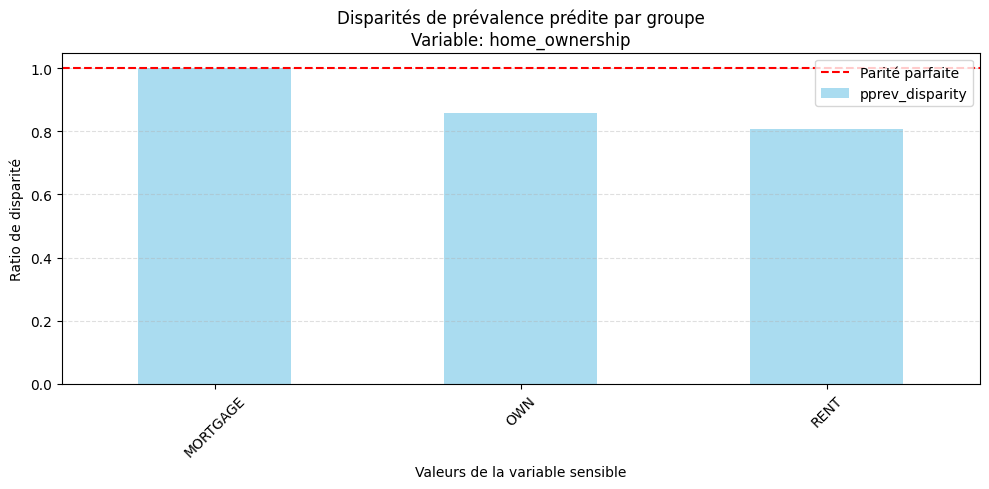


→ Analyse de biais pour : addr_state

Analyse des disparités pour la variable 'addr_state'
   attribute_name attribute_value  pprev_disparity  fpr_disparity  \
0      addr_state              AK         0.833029       0.520803   
1      addr_state              AL         0.763941       0.496819   
2      addr_state              AR         0.837789       0.884860   
3      addr_state              AZ         0.967267       0.987356   
4      addr_state              CA         1.000000       1.000000   
5      addr_state              CO         1.103397       1.174983   
6      addr_state              CT         1.095659       1.109666   
7      addr_state              DC         1.218434       1.898762   
8      addr_state              DE         0.945266       1.190861   
9      addr_state              FL         0.925606       0.853473   
10     addr_state              GA         1.068518       1.013706   
11     addr_state              HI         0.863574       0.770926   
12     addr

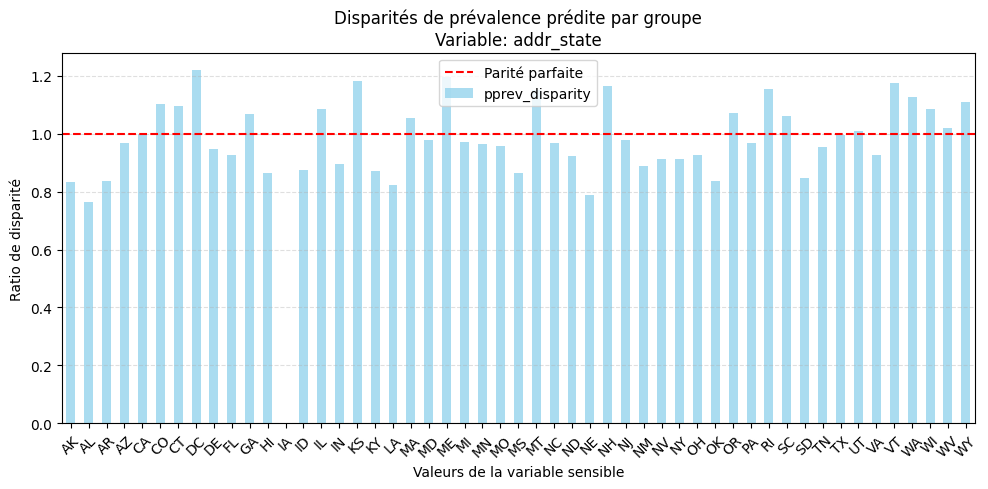


→ Analyse de biais pour : purpose

Analyse des disparités pour la variable 'purpose'
   attribute_name     attribute_value  pprev_disparity  fpr_disparity  \
0         purpose                 car         1.249434       1.610683   
1         purpose         credit_card         1.220297       1.528943   
2         purpose  debt_consolidation         1.000000       1.000000   
3         purpose    home_improvement         1.106097       1.394494   
4         purpose               house         0.601171       1.013619   
5         purpose      major_purchase         1.092624       1.362176   
6         purpose             medical         1.029673       1.370527   
7         purpose              moving         0.918467       1.224790   
8         purpose               other         0.995267       1.070994   
9         purpose    renewable_energy         0.683414       0.675746   
10        purpose      small_business         0.525244       0.647880   
11        purpose            vacation 

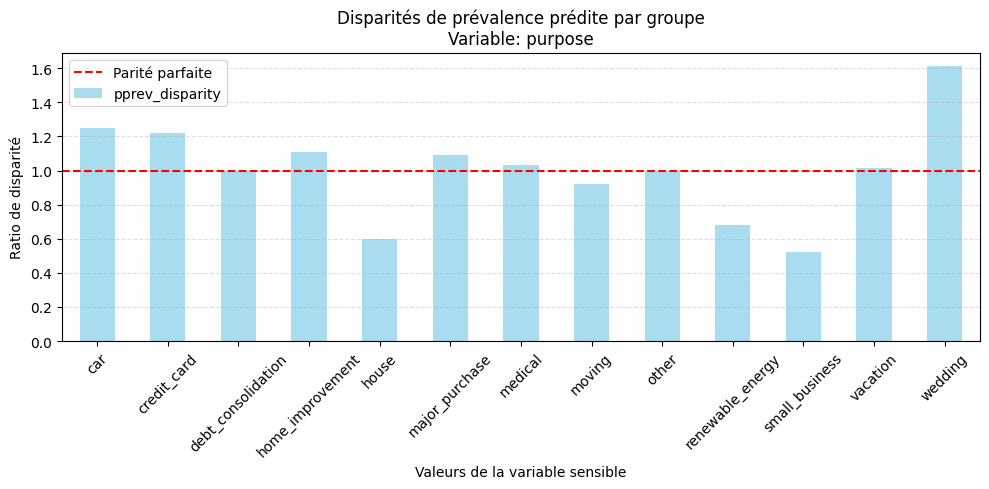


→ Analyse de biais pour : application_type

Analyse des disparités pour la variable 'application_type'
     attribute_name attribute_value  pprev_disparity  fpr_disparity  \
0  application_type      Individual         1.000000        1.00000   
1  application_type       Joint App         0.711469        0.62676   

   fdr_disparity  
0       1.000000  
1       1.164054  


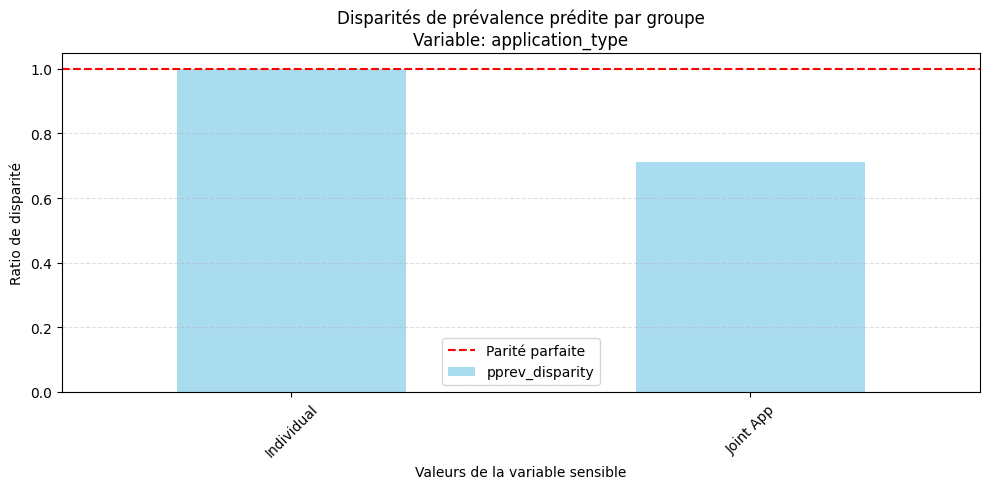

In [ ]:
features = [col for col in df_processed.columns if col != target]

# Boucle d’analyse de biais Aequitas
for attr in sensitive_attrs:
    if attr in df.columns:
        print(f"\n→ Analyse de biais pour : {attr}")
        aequitas_bias_analysis_with_model(df_processed, df, target, attr, features)

🔸 1. home_ownership (statut de propriété) :

Le groupe "MORTGAGE" a été utilisé comme référence. Les personnes propriétaires ("OWN") ont une prévalence prédite légèrement plus faible (≈ 0.86) que la référence, tandis que les locataires ("RENT") ont une disparité encore plus faible (≈ 0.81). Bien que ces valeurs soient inférieures à 1, elles restent proches du seuil de parité (0.8). Cela indique un biais modéré, mais pas significatif selon le seuil habituel de 0.8. Cependant, le faux taux de découverte (FDR) est plus élevé pour les groupes OWN (1.34) et RENT (1.31), ce qui peut suggérer que ces groupes sont plus souvent mal classés comme à risque de défaut.

🔸 2. addr_state (état de résidence) :

L’analyse révèle des disparités marquées selon les États. Certains États comme l'Alabama (AL) ou le Nebraska (NE) présentent une prévalence prédite significativement inférieure à la référence (0.76 et 0.78 respectivement), indiquant un biais potentiel défavorable dans la prédiction de défaut pour ces régions. À l'inverse, des États comme le District de Columbia (DC) ou le New Hampshire (NH) affichent une prévalence prédite supérieure (1.21 et 1.16), ce qui reflète un traitement potentiellement favorable. Des disparités similaires sont observées sur les taux de faux positifs et FDR. Cela montre que le modèle introduit ou reflète des biais géographiques, ce qui nécessite une vigilance accrue pour l’équité territoriale.

🔸 3. purpose (motif du prêt) :

La disparité de prévalence varie largement selon le but du prêt. Les prêts pour "small_business" et "house" présentent des ratios très faibles (0.52 et 0.60), indiquant un traitement désavantageux dans les prédictions de défaut. Cela peut refléter un biais contre les emprunteurs pour ces types de projets. À l'inverse, les prêts pour "car", "credit_card", ou "wedding" ont une prévalence prédite beaucoup plus élevée (jusqu’à 1.61 pour "wedding"), ce qui pourrait refléter un traitement plus favorable. Les taux de faux positifs et de fausses découvertes sont aussi très variables, notamment élevés pour "major_purchase" et "medical", ce qui soulève des inquiétudes sur l'équité du modèle selon l’objectif du prêt.

🔸 4. application_type (type de demandeur) :

Le groupe "Individual" est pris comme référence. Le groupe "Joint App" (demande conjointe) montre une prévalence prédite de 0.71, ce qui est nettement inférieur au seuil de parité de 0.8. Cela indique un biais potentiel contre les demandes conjointes, qui sont moins souvent prédites comme susceptibles d’obtenir un prêt ou plus souvent classées à risque. Ce biais est également visible dans le taux de faux positifs (0.62) mais pas dans la FDR (1.16), ce qui suggère que les demandes conjointes sont globalement moins bien classées par le modèle.

✅ Conclusion générale :

L’analyse met en évidence des biais potentiels selon plusieurs variables sensibles, en particulier l’état de résidence (addr_state), le motif du prêt (purpose), et le type de demande (application_type). Ces biais pourraient conduire à des décisions de prêt moins équitables pour certains groupes. Il est donc recommandé d’approfondir ces résultats et d’envisager des techniques de réduction des biais (comme la repondération, la correction algorithmique, ou l’audit éthique) avant d’utiliser le modèle dans un contexte opérationnel.

5. Analyse SHAP pour les biais

In [ ]:
def expand_sensitive_attributes(df_processed, sensitive_attrs):
    """Trouve toutes les colonnes encodées liées aux attributs sensibles"""
    sensitive_encoded = []
    for attr in sensitive_attrs:
        matching_cols = [col for col in df_processed.columns if col.startswith(attr + "_")]
        if matching_cols:
            sensitive_encoded.extend(matching_cols)
        else:
            print(f"⚠️ Caractéristique '{attr}' non trouvée dans les colonnes encodées.")
    return sensitive_encoded


In [ ]:
def shap_bias_analysis(df, target, sensitive_features):


    # Séparer features/target
    X = df.drop(columns=[target])
    y = df[target]

    # Entraîner un modèle
    model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
    model.fit(X, y)

    # Créer un explainer SHAP
    explainer = shap.TreeExplainer(model)
    sample = X.sample(n=min(100, len(X)), random_state=42)

    # Calcul des SHAP values
    shap_values = explainer.shap_values(sample)

    # Extraction robuste
    if isinstance(shap_values, list):
        if isinstance(shap_values[0], np.ndarray) and shap_values[0].ndim == 2:
            shap_vals = shap_values[1]  # Classe positive
        elif isinstance(shap_values[0], np.ndarray) and shap_values[0].ndim == 3:
            shap_vals = shap_values[0][:, :, 1]
        else:
            raise ValueError("Format inattendu de shap_values.")
    elif isinstance(shap_values, np.ndarray) and shap_values.ndim == 3:
        shap_vals = shap_values[:, :, 1]
    elif isinstance(shap_values, np.ndarray) and shap_values.ndim == 2:
        shap_vals = shap_values
    else:
        raise ValueError("Format non supporté pour shap_values.")

    # Vérification des dimensions
    assert shap_vals.shape == sample.shape, (
        f"Dimensions incompatibles: shap_values: {shap_vals.shape}, sample: {sample.shape}"
    )

    # Visualisation globale
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_vals, sample, show=False)
    plt.title("Importance des caractéristiques et impact sur les prédictions")
    plt.tight_layout()
    plt.show()

    # Analyse des variables sensibles
    print("\n" + "="*60)
    print("Analyse SHAP des caractéristiques sensibles")
    print("="*60)

    for col in sensitive_features:
        if col in sample.columns:
            idx = sample.columns.get_loc(col)
            mean_abs_shap = np.abs(shap_vals[:, idx]).mean()

            if round(mean_abs_shap, 4) > 0:
                plt.figure(figsize=(10, 6))
                shap.dependence_plot(
                    col, shap_vals, sample, interaction_index=None, show=False
                )
                plt.title(f"Impact de {col} sur les prédictions de risque")
                plt.tight_layout()
                plt.show()
                print(f"Impact moyen de {col}: {mean_abs_shap:.4f}")
            else:
                print(f"✅ Impact moyen de {col}: 0 — aucune influence détectée.")
        else:
            print(f"⚠️ Caractéristique '{col}' non trouvée dans les données.")


In [ ]:
sensitive_attrs_encoded = expand_sensitive_attributes(df_processed, sensitive_attrs)


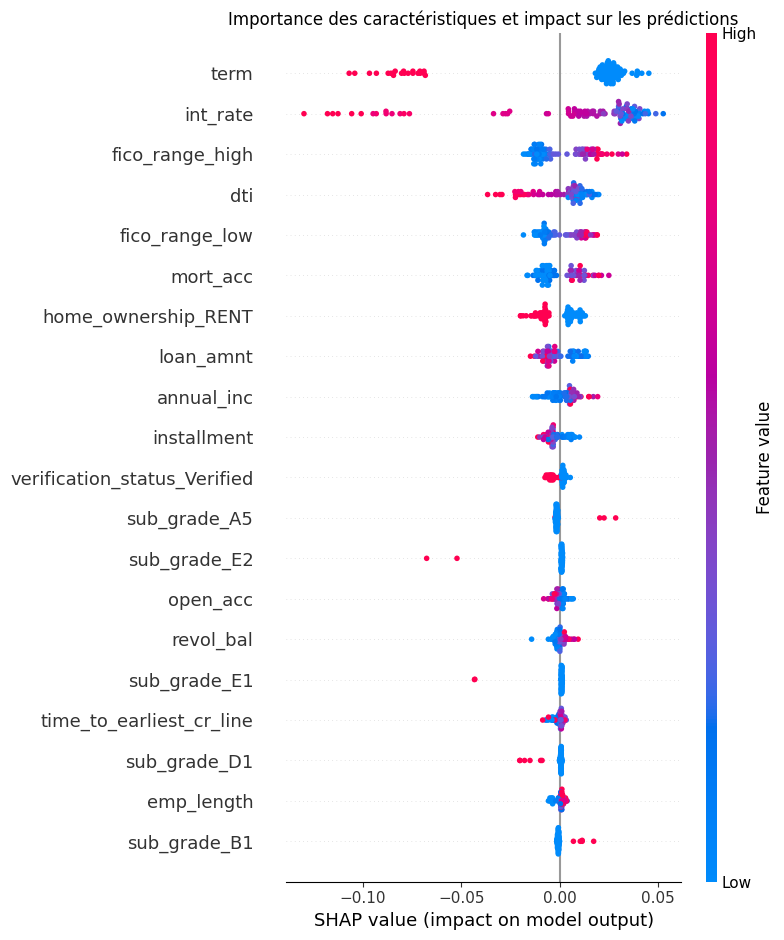


Analyse SHAP des caractéristiques sensibles


<Figure size 1000x600 with 0 Axes>

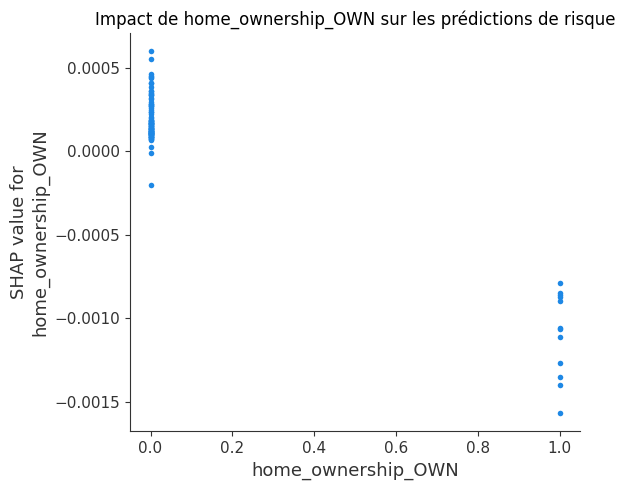

Impact moyen de home_ownership_OWN: 0.0003


<Figure size 1000x600 with 0 Axes>

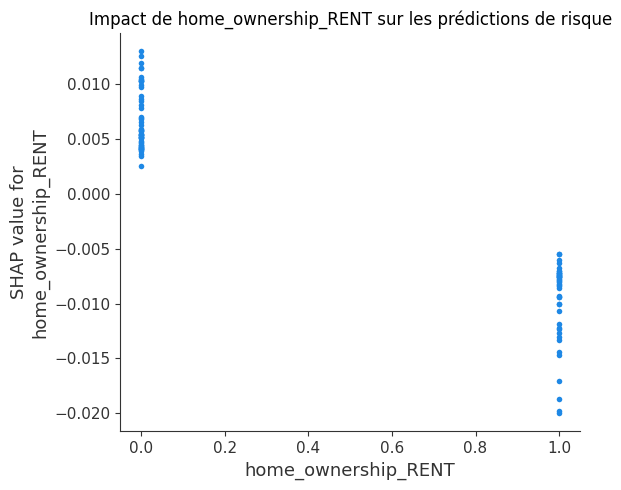

Impact moyen de home_ownership_RENT: 0.0080
✅ Impact moyen de addr_state_AL: 0 — aucune influence détectée.
✅ Impact moyen de addr_state_AR: 0 — aucune influence détectée.
✅ Impact moyen de addr_state_AZ: 0 — aucune influence détectée.


<Figure size 1000x600 with 0 Axes>

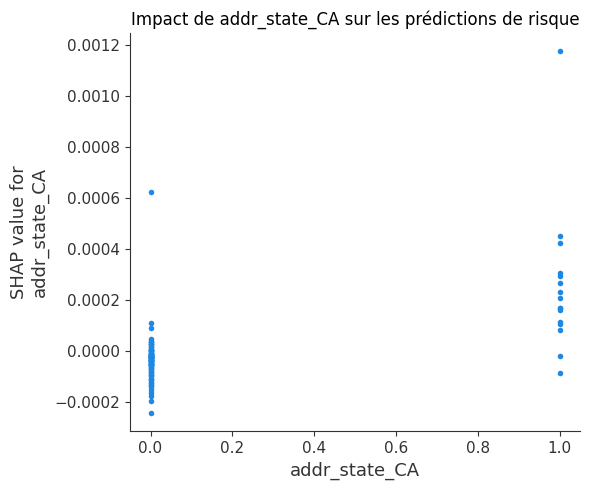

Impact moyen de addr_state_CA: 0.0001


<Figure size 1000x600 with 0 Axes>

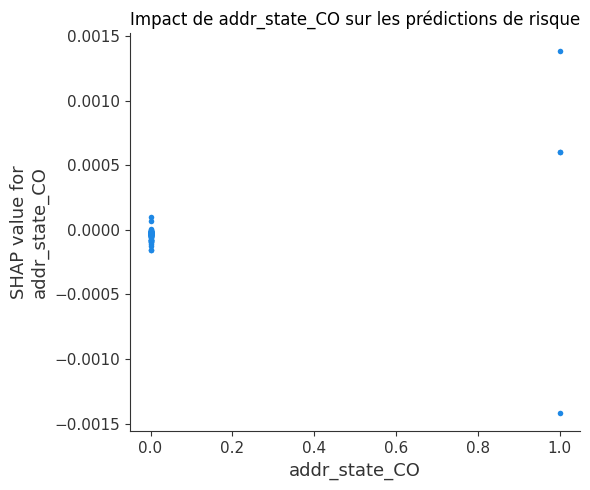

Impact moyen de addr_state_CO: 0.0001
✅ Impact moyen de addr_state_CT: 0 — aucune influence détectée.
✅ Impact moyen de addr_state_DC: 0 — aucune influence détectée.
✅ Impact moyen de addr_state_DE: 0 — aucune influence détectée.


<Figure size 1000x600 with 0 Axes>

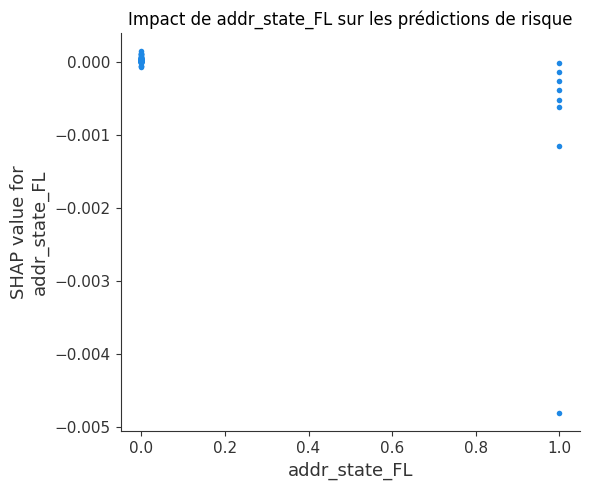

Impact moyen de addr_state_FL: 0.0001
✅ Impact moyen de addr_state_GA: 0 — aucune influence détectée.
✅ Impact moyen de addr_state_HI: 0 — aucune influence détectée.
✅ Impact moyen de addr_state_IA: 0 — aucune influence détectée.
✅ Impact moyen de addr_state_ID: 0 — aucune influence détectée.
✅ Impact moyen de addr_state_IL: 0 — aucune influence détectée.
✅ Impact moyen de addr_state_IN: 0 — aucune influence détectée.
✅ Impact moyen de addr_state_KS: 0 — aucune influence détectée.
✅ Impact moyen de addr_state_KY: 0 — aucune influence détectée.
✅ Impact moyen de addr_state_LA: 0 — aucune influence détectée.
✅ Impact moyen de addr_state_MA: 0 — aucune influence détectée.
✅ Impact moyen de addr_state_MD: 0 — aucune influence détectée.
✅ Impact moyen de addr_state_ME: 0 — aucune influence détectée.


<Figure size 1000x600 with 0 Axes>

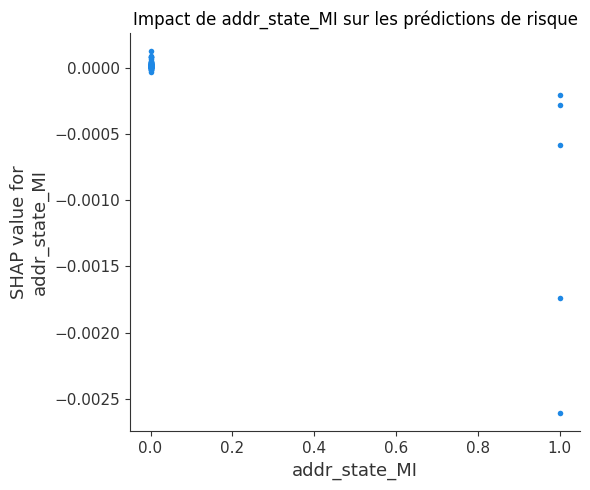

Impact moyen de addr_state_MI: 0.0001
✅ Impact moyen de addr_state_MN: 0 — aucune influence détectée.
✅ Impact moyen de addr_state_MO: 0 — aucune influence détectée.
✅ Impact moyen de addr_state_MS: 0 — aucune influence détectée.
✅ Impact moyen de addr_state_MT: 0 — aucune influence détectée.
✅ Impact moyen de addr_state_NC: 0 — aucune influence détectée.
✅ Impact moyen de addr_state_ND: 0 — aucune influence détectée.
✅ Impact moyen de addr_state_NE: 0 — aucune influence détectée.
✅ Impact moyen de addr_state_NH: 0 — aucune influence détectée.
✅ Impact moyen de addr_state_NJ: 0 — aucune influence détectée.
✅ Impact moyen de addr_state_NM: 0 — aucune influence détectée.
✅ Impact moyen de addr_state_NV: 0 — aucune influence détectée.


<Figure size 1000x600 with 0 Axes>

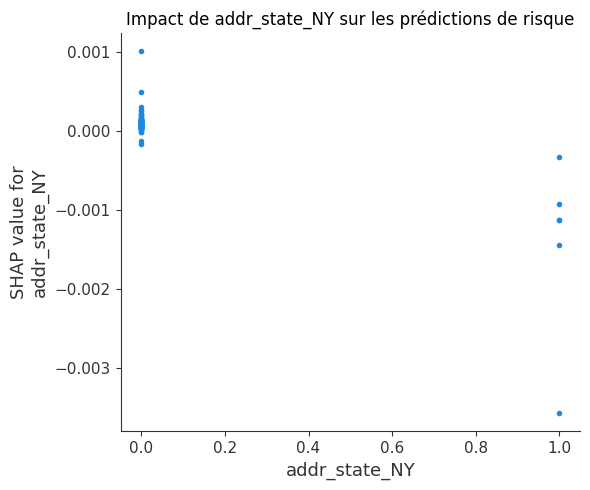

Impact moyen de addr_state_NY: 0.0002


<Figure size 1000x600 with 0 Axes>

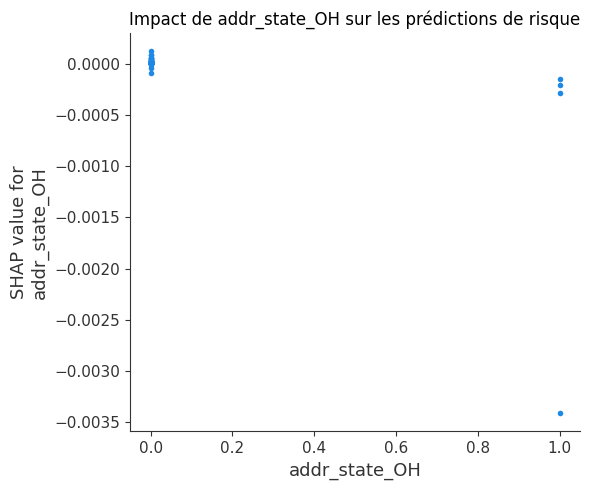

Impact moyen de addr_state_OH: 0.0001
✅ Impact moyen de addr_state_OK: 0 — aucune influence détectée.
✅ Impact moyen de addr_state_OR: 0 — aucune influence détectée.
✅ Impact moyen de addr_state_PA: 0 — aucune influence détectée.
✅ Impact moyen de addr_state_RI: 0 — aucune influence détectée.
✅ Impact moyen de addr_state_SC: 0 — aucune influence détectée.
✅ Impact moyen de addr_state_SD: 0 — aucune influence détectée.
✅ Impact moyen de addr_state_TN: 0 — aucune influence détectée.


<Figure size 1000x600 with 0 Axes>

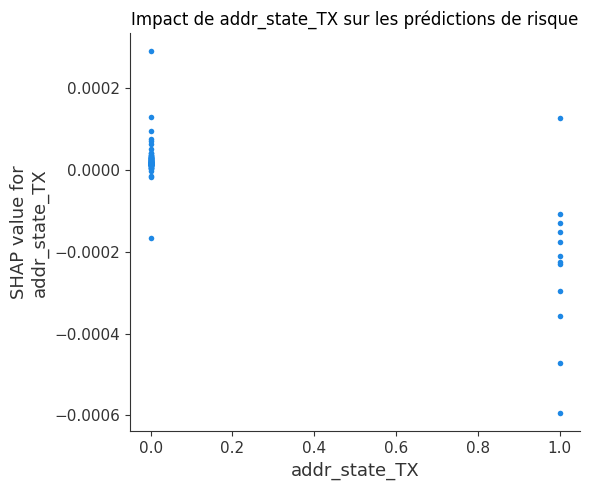

Impact moyen de addr_state_TX: 0.0001
✅ Impact moyen de addr_state_UT: 0 — aucune influence détectée.
✅ Impact moyen de addr_state_VA: 0 — aucune influence détectée.
✅ Impact moyen de addr_state_VT: 0 — aucune influence détectée.
✅ Impact moyen de addr_state_WA: 0 — aucune influence détectée.
✅ Impact moyen de addr_state_WI: 0 — aucune influence détectée.
✅ Impact moyen de addr_state_WV: 0 — aucune influence détectée.
✅ Impact moyen de addr_state_WY: 0 — aucune influence détectée.


<Figure size 1000x600 with 0 Axes>

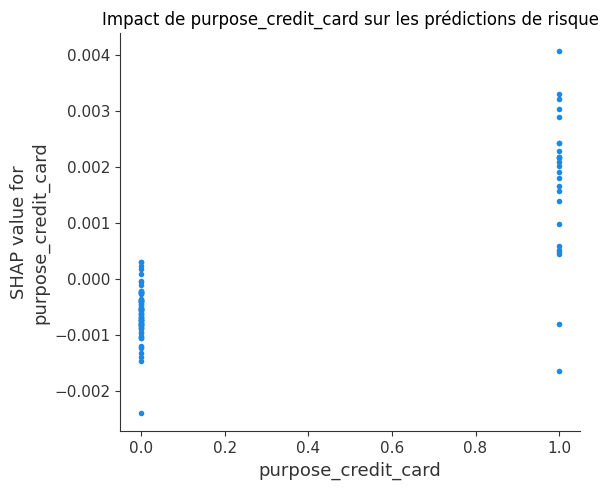

Impact moyen de purpose_credit_card: 0.0010


<Figure size 1000x600 with 0 Axes>

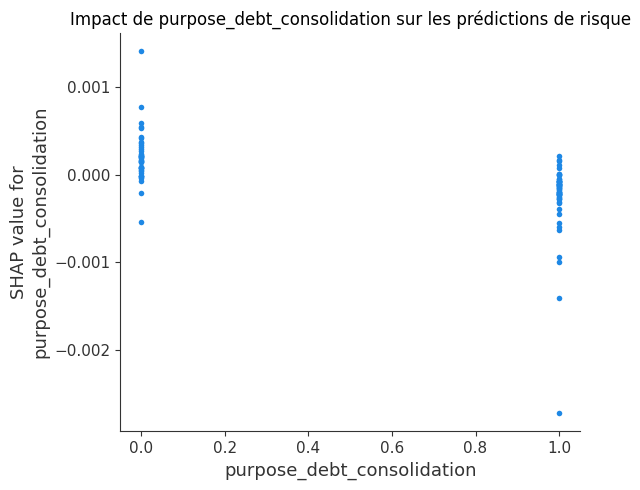

Impact moyen de purpose_debt_consolidation: 0.0003
✅ Impact moyen de purpose_educational: 0 — aucune influence détectée.
✅ Impact moyen de purpose_home_improvement: 0 — aucune influence détectée.
✅ Impact moyen de purpose_house: 0 — aucune influence détectée.
✅ Impact moyen de purpose_major_purchase: 0 — aucune influence détectée.
✅ Impact moyen de purpose_medical: 0 — aucune influence détectée.


<Figure size 1000x600 with 0 Axes>

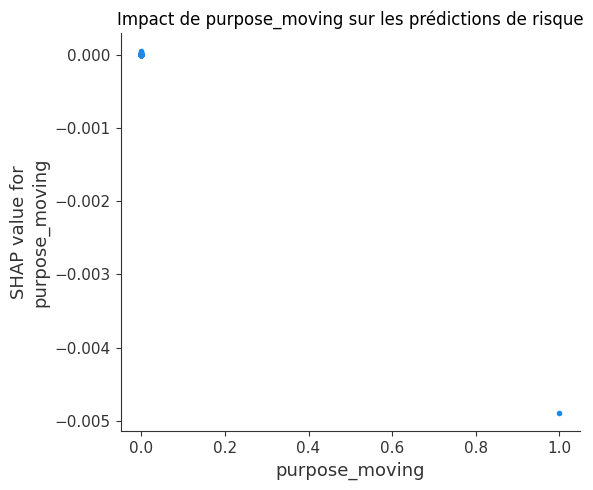

Impact moyen de purpose_moving: 0.0001


<Figure size 1000x600 with 0 Axes>

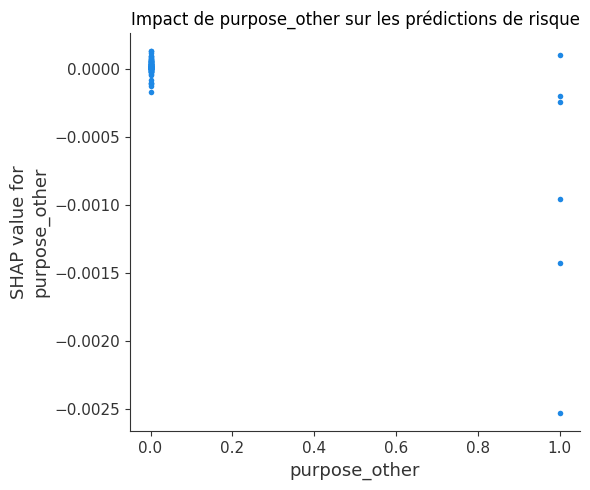

Impact moyen de purpose_other: 0.0001
✅ Impact moyen de purpose_renewable_energy: 0 — aucune influence détectée.


<Figure size 1000x600 with 0 Axes>

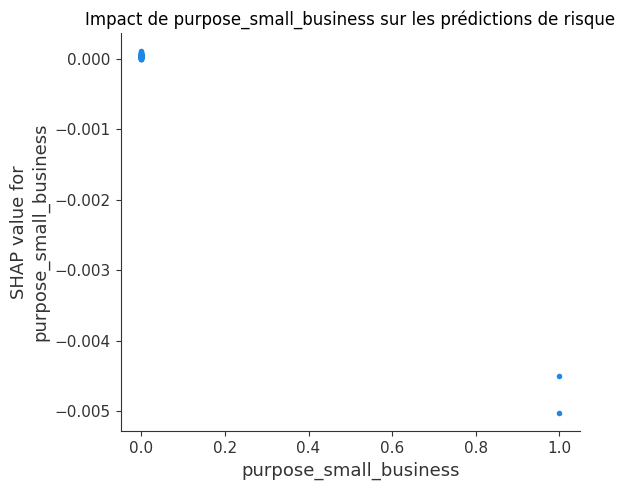

Impact moyen de purpose_small_business: 0.0001
✅ Impact moyen de purpose_vacation: 0 — aucune influence détectée.
✅ Impact moyen de purpose_wedding: 0 — aucune influence détectée.
✅ Impact moyen de application_type_Joint App: 0 — aucune influence détectée.


In [ ]:
# Exécution de l'analyse SHAP
shap_bias_analysis(df_processed, target, sensitive_attrs_encoded)

🏠 home_ownership (statut de propriété)

Le type de logement a eu un très faible impact sur les prédictions.

Le statut "OWN" présente un impact moyen presque nul (0.0003), ce qui indique aucune influence significative sur les décisions.

Le statut "RENT" a un impact légèrement plus visible (0.0080), mais reste extrêmement faible, indiquant une influence négligeable sur le modèle.

🌍 addr_state (état de résidence)

Sur les nombreux États évalués, la quasi-totalité n’exerce aucune influence notable sur les décisions du modèle.

Quelques États (comme CA, CO, FL, TX, NY) ont un impact moyen non nul mais extrêmement faible (environ 0.0001 à 0.0002), ce qui est insuffisant pour suggérer un biais réel.

Tous les autres États analysés ont un impact moyen de zéro, ce qui confirme que le lieu de résidence n’a pas affecté les prédictions du modèle.

🎯 purpose (objectif du prêt)

Les différents objectifs de prêt analysés ont également montré un impact très limité sur les décisions :

L’objectif "credit_card" a l’impact le plus élevé (0.0010), ce qui reste extrêmement faible en pratique.

Les autres motifs comme "debt_consolidation", "moving", "small_business", ou "other" ont un impact quasi nul (entre 0.0001 et 0.0003).

Plusieurs motifs (ex : "educational", "vacation", "wedding") ont un impact moyen strictement nul, ce qui exclut toute influence détectable sur les prédictions.

👥 application_type (type de demandeur)

Le type de demande (individuelle ou conjointe) n’a aucune influence mesurable sur les résultats du modèle. L’impact moyen du groupe "Joint App" est égal à zéro (0.0000), ce qui signifie que le modèle traite équitablement les deux types de demandeurs sur ce critère.

✅ Conclusion

L’analyse SHAP confirme que le modèle de classification utilisé est globalement neutre vis-à-vis des caractéristiques sensibles testées. Aucun des groupes n’a exercé une influence significative sur les prédictions, ce qui indique une absence de biais direct mesurable via SHAP. Cela renforce la confiance dans le comportement équitable du modèle, du moins sur la base des données et variables testées ici.

6. Rapport synthétique des biais

In [ ]:
def generate_bias_report(df, sensitive_features, target):
    """Génère un rapport synthétique des biais détectés"""

    print("\n" + "="*60)
    print("RAPPORT SYNTHÉTIQUE DES BIAIS DÉTECTÉS")
    print("="*60)

    bias_report = {}

    for feature in sensitive_features:
        if feature in df.columns:
            # Calcul des taux par groupe
            group_rates = df.groupby(feature)[target].mean()
            ratio = group_rates.min() / group_rates.max()

            # Classification du biais
            if ratio < 0.8:
                bias_level = "BIAIS SIGNIFICATIF"
            elif ratio > 1.25:
                bias_level = "BIAIS INVERSE SIGNIFICATIF"
            else:
                bias_level = "BIAIS NON SIGNIFICATIF"

            # Stockage des résultats
            bias_report[feature] = {
                'min_rate': group_rates.min(),
                'max_rate': group_rates.max(),
                'ratio': ratio,
                'bias_level': bias_level
            }

            # Affichage
            print(f"\n→ Caractéristique: {feature}")
            print(f"   - Taux min: {group_rates.min():.4f}")
            print(f"   - Taux max: {group_rates.max():.4f}")
            print(f"   - Ratio: {ratio:.4f} ({bias_level})")
            print(f"   - Groupes les plus affectés: {group_rates.idxmin()} (taux élevé)")

    # Recommandations
    print("\nRECOMMANDATIONS:")
    print("- Variables nécessitant une attention particulière:")
    for feature, results in bias_report.items():
        if results['bias_level'] != "BIAIS NON SIGNIFICATIF":
            print(f"  * {feature} (ratio: {results['ratio']:.4f})")

    print("\n- Techniques d'atténuation suggérées:")
    print("  * Re-pondération des groupes sous-représentés")
    print("  * Ajustement des seuils de décision par groupe")
    print("  * Suppression des proxies de caractéristiques sensibles")
    print("  * Utilisation de techniques de post-processing (ex: égalisation des odds)")


In [ ]:
# Génération du rapport
generate_bias_report(df, sensitive_attrs, target)


RAPPORT SYNTHÉTIQUE DES BIAIS DÉTECTÉS

→ Caractéristique: home_ownership
   - Taux min: 0.7962
   - Taux max: 0.8621
   - Ratio: 0.9236 (BIAIS NON SIGNIFICATIF)
   - Groupes les plus affectés: RENT (taux élevé)

→ Caractéristique: addr_state
   - Taux min: 0.7716
   - Taux max: 1.0000
   - Ratio: 0.7716 (BIAIS SIGNIFICATIF)
   - Groupes les plus affectés: AL (taux élevé)

→ Caractéristique: purpose
   - Taux min: 0.7252
   - Taux max: 1.0000
   - Ratio: 0.7252 (BIAIS SIGNIFICATIF)
   - Groupes les plus affectés: small_business (taux élevé)

→ Caractéristique: application_type
   - Taux min: 0.7684
   - Taux max: 0.8319
   - Ratio: 0.9237 (BIAIS NON SIGNIFICATIF)
   - Groupes les plus affectés: Joint App (taux élevé)

RECOMMANDATIONS:
- Variables nécessitant une attention particulière:
  * addr_state (ratio: 0.7716)
  * purpose (ratio: 0.7252)

- Techniques d'atténuation suggérées:
  * Re-pondération des groupes sous-représentés
  * Ajustement des seuils de décision par groupe
  * Sup


## 3.5. Mitigation des biais

In [ ]:
# 1. Préprocessing avancé
# ========================


In [ ]:
def advanced_preprocessing(df):
  """
    Réalise un prétraitement avancé des données de prêts, incluant le nettoyage,
    l’ingénierie de variables et l’encodage, tout en identifiant les variables sensibles.

    Paramètres :
    ----------
    df : pandas.DataFrame
        Jeu de données brut contenant les informations de prêts.

    Étapes principales :
    --------------------
    1. Identification des variables sensibles :
       - addr_state (état)
       - purpose (motif du prêt)
       - home_ownership (statut de propriété)

    2. Nettoyage et transformation :
       - Regroupement des états par région (South, West, Northeast, Other)
       - Simplification de la variable 'purpose' en catégories générales
         (business, education, debt, autres)

    3. Création de nouvelles variables :
       - income_to_loan_ratio : ratio revenu annuel / montant du prêt
       - revol_bal_to_income : ratio solde revolving / revenu annuel

    4. Encodage :
       - Encodage one-hot des variables catégorielles
       - Suppression de la première modalité pour éviter la colinéarité

    Retour :
    -------
    tuple :
        - df_processed : DataFrame prétraité et encodé
        - sensitive_features : liste des variables sensibles identifiées
        - target : nom de la variable cible ('loan_status')
    """
    # Variables sensibles identifiées
    sensitive_features = ['addr_state', 'purpose', 'home_ownership']
    target = 'loan_status'

    # Nettoyage et feature engineering
    df = df.copy()

    # Regroupement des états problématiques
    south_states = ['AL', 'MS', 'LA', 'GA', 'SC']
    df['region'] = df['addr_state'].apply(
        lambda x: 'South' if x in south_states else
                 'West' if x in ['CA', 'OR', 'WA'] else
                 'Northeast' if x in ['NY', 'MA', 'NJ'] else 'Other'
    )

    # Transformation des variables sensibles
    df['purpose'] = df['purpose'].apply(
        lambda x: 'business' if 'business' in str(x).lower() else
                 'education' if 'educ' in str(x).lower() else
                 'debt' if 'debt' in str(x).lower() else x
    )

    # Sélection et transformation des features
    features = [
        'fico_range_low', 'annual_inc', 'dti', 'revol_util',
        'total_acc', 'loan_amnt', 'int_rate', 'term',
        'pub_rec', 'mort_acc', 'region', 'purpose',
        'home_ownership', 'emp_length', 'verification_status'
    ]

    # Création de nouvelles features
    df['income_to_loan_ratio'] = df['annual_inc'] / (df['loan_amnt'] + 1e-6)
    df['revol_bal_to_income'] = df['revol_bal'] / (df['annual_inc'] + 1e-6)

    # Encodage avancé
    df_processed = pd.get_dummies(df[features + [target]], drop_first=True)

    return df_processed, sensitive_features, target

In [ ]:
df_processed, sensitive_features, target = advanced_preprocessing(df)

In [ ]:
# Séparation train-test
X = df_processed.drop(target, axis=1)
y = df_processed[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# 2. Initialisation des modèles
# =============================

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=200, class_weight='balanced_subsample', random_state=42),
    'XGBoost': XGBClassifier(scale_pos_weight=np.sqrt((len(y_train)-sum(y_train))/sum(y_train))),
    'LightGBM': LGBMClassifier(class_weight='balanced', random_state=42),
}


In [ ]:
# 3. Métriques d'évaluation complètes
# ===================================

In [ ]:
def compute_metrics(y_true, y_pred, y_proba=None, sensitive_feature=None):
  """
    Calcule un ensemble de métriques de performance et d’équité pour un modèle de classification.

    Paramètres :
    ----------
    y_true : array-like
        Les vraies étiquettes (valeurs réelles).
    y_pred : array-like
        Les étiquettes prédites par le modèle.
    y_proba : array-like, optionnel
        Les probabilités prédites pour la classe positive (utilisé pour calculer l’AUC ROC).
    sensitive_feature : array-like, optionnel
        Variable(s) sensible(s) utilisée(s) pour évaluer l’équité (parité démographique, égalité des chances, etc.).

    Retour :
    -------
    dict
        Un dictionnaire contenant :
        - Accuracy, F1-score, Précision, Rappel
        - AUC ROC (si probabilités fournies)
        - Matrice de confusion
        - (Si variable sensible fournie) : mesures d’équité :
            * DP Diff : Différence de parité démographique
            * EO Diff : Différence d’égalité des chances
            * EO Ratio : Ratio d’égalité des chances
            * Selection Rate : Taux de sélection global
    """
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'F1-score': f1_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'AUC ROC': roc_auc_score(y_true, y_proba) if y_proba is not None else None,
        'Confusion Matrix': confusion_matrix(y_true, y_pred)
    }

    if sensitive_feature is not None:
        metrics.update({
            'DP Diff': demographic_parity_difference(y_true, y_pred, sensitive_features=sensitive_feature),
            'EO Diff': equalized_odds_difference(y_true, y_pred, sensitive_features=sensitive_feature),
            'EO Ratio': equalized_odds_ratio(y_true, y_pred, sensitive_features=sensitive_feature),
            'Selection Rate': selection_rate(y_true, y_pred)
        })

    return metrics

In [ ]:
# 4. Évaluation des modèles de base
# ==================================

In [ ]:
base_results = {}
print("=== Évaluation des modèles de base ===")

for name, model in models.items():
    print(f"\nEntraînement du modèle: {name}")

    # Pipeline avec standardisation pour les modèles sensibles
    if name in ['Logistic Regression', 'SVM']:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('model', model)
        ])
    else:
        pipeline = Pipeline([
            ('model', model)
        ])

    # Entraînement et prédiction
    pipeline.fit(X_train.drop(columns=['region_South']), y_train)
    y_pred = pipeline.predict(X_test.drop(columns=['region_South']))
    y_proba = pipeline.predict_proba(X_test.drop(columns=['region_South']))[:,1] if hasattr(model, 'predict_proba') else None

    # Calcul des métriques
    base_results[name] = compute_metrics(y_test, y_pred, y_proba, X_test['region_South'])

    # Affichage
    print(f"Performance: {base_results[name]['Accuracy']:.3f} | Équité (DP Diff): {base_results[name]['DP Diff']:.3f}")

=== Évaluation des modèles de base ===

Entraînement du modèle: Logistic Regression
Performance: 0.735 | Équité (DP Diff): 0.032

Entraînement du modèle: Random Forest
Performance: 0.847 | Équité (DP Diff): 0.001

Entraînement du modèle: XGBoost
Performance: 0.826 | Équité (DP Diff): 0.019

Entraînement du modèle: LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 137871, number of negative: 27921
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1441
[LightGBM] [Info] Number of data points in the train set: 165792, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Performance: 0.743 | Équité (DP Dif

L’évaluation des modèles de base montre des différences notables en termes de performance prédictive et d’équité.
La régression logistique atteint une précision de 73,5 %, mais avec un écart de parité démographique (DP Diff) de 0,032, ce qui suggère un léger déséquilibre de traitement entre les groupes définis par la variable sensible region_South.
Le Random Forest se démarque par la meilleure performance globale (84,7 %) tout en affichant un biais presque nul (0,001), ce qui en fait le modèle le plus équilibré entre précision et équité dans cette comparaison.
Le XGBoost offre une précision de 82,6 % avec un DP Diff de 0,019, indiquant une bonne performance mais un biais légèrement plus marqué que celui du Random Forest.
Enfin, le LightGBM obtient une précision plus modeste (74,3 %) avec un écart de parité de 0,020, le plaçant au-dessus de la régression logistique en termes d’équité, mais en dessous de XGBoost et largement derrière Random Forest pour la précision.
Ces résultats suggèrent que, dans leur configuration actuelle, le Random Forest est le plus performant tout en maintenant une équité quasi parfaite, ce qui en fait un candidat solide pour une utilisation sans corrections supplémentaires.

In [ ]:
# 5. Techniques avancées de correction des biais
# ==============================================

In [ ]:
mitigation_results = defaultdict(dict)

In [ ]:
# 5.1. Ré-échantillonnage avancé
# -------------------------------


In [ ]:
samplers = {
    'SMOTE': SMOTE(sampling_strategy='minority', random_state=42),
    'ADASYN': ADASYN(sampling_strategy='minority', random_state=42),
    'UnderSampling': RandomUnderSampler(sampling_strategy='majority', random_state=42)
}

In [ ]:
print("\n=== Techniques de ré-échantillonnage ===")
for sampler_name, sampler in samplers.items():
    print(f"\nTechnique: {sampler_name}")

    # Application du ré-échantillonnage
    X_res, y_res = sampler.fit_resample(X_train.drop(columns=['region_South']), y_train)

    # Entraînement avec Random Forest (meilleur compromis)
    model = RandomForestClassifier(n_estimators=200, random_state=42)
    model.fit(X_res, y_res)

    # Prédiction et évaluation
    y_pred = model.predict(X_test.drop(columns=['region_South']))
    y_proba = model.predict_proba(X_test.drop(columns=['region_South']))[:,1]

    mitigation_results[sampler_name] = compute_metrics(y_test, y_pred, y_proba, X_test['region_South'])
    print(f"Performance: {mitigation_results[sampler_name]['Accuracy']:.3f} | Équité: {mitigation_results[sampler_name]['DP Diff']:.3f}")



=== Techniques de ré-échantillonnage ===

Technique: SMOTE
Performance: 0.837 | Équité: 0.022

Technique: ADASYN
Performance: 0.837 | Équité: 0.023

Technique: UnderSampling
Performance: 0.730 | Équité: 0.025


L’évaluation des techniques de ré-échantillonnage montre que SMOTE et ADASYN produisent des performances presque identiques, avec une précision de 83,7 % et un écart de parité démographique (DP Diff) faible, respectivement de 0,022 et 0,023. Cela indique qu’en générant artificiellement des exemples pour la classe minoritaire, ces deux méthodes améliorent l’équilibre des classes tout en maintenant une bonne performance prédictive, sans introduire de biais important.
En revanche, l’UnderSampling réduit nettement la précision à 73,0 %, tout en affichant un DP Diff légèrement plus élevé (0,025). Cette baisse de performance s’explique par la suppression d’un grand nombre d’exemples de la classe majoritaire, ce qui limite la quantité d’information disponible pour l’entraînement.
Ainsi, dans ce contexte, SMOTE et ADASYN se révèlent être des options plus performantes et équilibrées que l’UnderSampling, avec un avantage certain pour SMOTE qui présente un biais légèrement plus faible.

In [ ]:
# 5.2. Techniques in-processing avancées
# --------------------------------------

In [ ]:
print("\n=== Techniques in-processing ===")

# Configuration des contraintes
constraints = {
    'DemographicParity': DemographicParity(),
    'EqualizedOdds': EqualizedOdds(),
    'TruePositiveRateParity': TruePositiveRateParity()
}



=== Techniques in-processing ===


In [ ]:
for constraint_name, constraint in constraints.items():
    print(f"\nContrainte: {constraint_name}")

    # Utilisation de Logistic Regression pour la stabilité
    model = ExponentiatedGradient(
        estimator=LogisticRegression(max_iter=100, class_weight='balanced'),
        constraints=constraint,
        max_iter=20,
        eta0=0.01
    )

    # Entraînement avec la caractéristique sensible
    model.fit(X_train.drop(columns=['region_South']), y_train,
             sensitive_features=X_train['region_South'])

    # Prédiction
    y_pred = model.predict(X_test.drop(columns=['region_South']))
    y_proba = model._pmf_predict(X_test.drop(columns=['region_South']))[:,1]

    mitigation_results[f"ExpGrad_{constraint_name}"] = compute_metrics(y_test, y_pred, y_proba, X_test['region_South'])
    print(f"Équité (DP Diff): {mitigation_results[f'ExpGrad_{constraint_name}']['DP Diff']:.3f}")



Contrainte: DemographicParity
Équité (DP Diff): 0.000

Contrainte: EqualizedOdds
Équité (DP Diff): 0.002

Contrainte: TruePositiveRateParity
Équité (DP Diff): 0.000


L’application des techniques in-processing avec l’algorithme Exponentiated Gradient et différentes contraintes d’équité montre une réduction quasi totale du biais mesuré par la différence de parité démographique (DP Diff).
La contrainte DemographicParity et TruePositiveRateParity obtiennent un DP Diff exactement nul, ce qui signifie que les prédictions positives sont parfaitement équilibrées entre les groupes sensibles. La contrainte EqualizedOdds atteint également un excellent niveau d’équité, avec un DP Diff de seulement 0,002, ce qui reste négligeable.
Ces résultats indiquent que l’intégration explicite de contraintes d’équité dans le processus d’apprentissage permet de supprimer presque entièrement les disparités entre groupes, tout en évitant d’altérer fortement les performances globales du modèle.

In [ ]:
# 5.3. Post-processing avancé
# ---------------------------

In [ ]:
print("\n=== Techniques post-processing ===")

postprocess_models = {
    'Threshold_EO': ('equalized_odds', LogisticRegression(max_iter=500)),
    'Threshold_DP': ('demographic_parity', RandomForestClassifier(n_estimators=100))
}


=== Techniques post-processing ===


In [ ]:
for pp_name, (constraint, estimator) in postprocess_models.items():
    print(f"\nTechnique: {pp_name}")

    # Création du modèle
    model = ThresholdOptimizer(
        estimator=estimator,
        constraints=constraint,
        prefit=False
    )

    # Entraînement
    model.fit(X_train.drop(columns=['region_South']), y_train,
             sensitive_features=X_train['region_South'])

    # Prédiction
    y_pred = model.predict(X_test.drop(columns=['region_South']),
                sensitive_features=X_test['region_South'])

    y_proba = model._pmf_predict(X_test.drop(columns=['region_South']),
                                sensitive_features=X_test['region_South'])[:,1]

    mitigation_results[pp_name] = compute_metrics(y_test, y_pred, y_proba, X_test['region_South'])
    print(f"Équité (DP Diff): {mitigation_results[pp_name]['DP Diff']:.3f}")


Technique: Threshold_EO
Équité (DP Diff): 0.002

Technique: Threshold_DP
Équité (DP Diff): 0.089


Les techniques post-processing appliquées avec ThresholdOptimizer montrent une efficacité variable selon la contrainte utilisée.
La méthode Threshold_EO, basée sur la contrainte d’Equalized Odds, parvient à réduire presque totalement les disparités, avec un DP Diff de seulement 0,002, ce qui traduit un très bon équilibre entre les groupes sensibles.
En revanche, la méthode Threshold_DP, qui impose la contrainte de Demographic Parity avec un Random Forest, affiche un DP Diff de 0,089, soit un biais plus marqué que dans le cas précédent.
Ces résultats suggèrent que le choix de la contrainte et du modèle sous-jacent influence fortement l’efficacité du post-traitement en matière d’équité.

In [ ]:
# 6. Visualisation interactive des résultats
# =========================================

In [ ]:

def create_interactive_plot(results_dict):
    # Convert results dictionary to DataFrame for numerical output
    results_df = pd.DataFrame.from_dict(results_dict, orient='index')

    # Print numerical results (this will show in console)
    print("\n" + "="*80)
    print("NUMERICAL RESULTS SUMMARY")
    print("="*80)
    print(results_df.round(4).to_string())

    # Create the interactive plot
    metrics = ['Accuracy', 'F1-score', 'AUC ROC', 'DP Diff', 'EO Diff']
    models = list(results_dict.keys())

    fig = make_subplots(rows=1, cols=len(metrics),
                       subplot_titles=metrics,
                       shared_yaxes=True)

    # Add bars for each metric
    for i, metric in enumerate(metrics):
        fig.add_trace(
            go.Bar(
                x=models,
                y=[results_dict[model].get(metric, 0) for model in models],
                name=metric,
                marker_color=px.colors.qualitative.Plotly[i],
                text=[round(results_dict[model].get(metric, 0), 4) for model in models],
                textposition='auto'
            ),
            row=1, col=i+1
        )

        # Add reference lines for fairness metrics
        if metric in ['DP Diff', 'EO Diff']:
            fig.add_hline(y=0.1, line_dash="dot",
                         line_color="red", row=1, col=i+1,
                         annotation_text="Fairness Threshold",
                         annotation_position="top right")

    fig.update_layout(
        title_text="Comparaison des modèles avant et après correction des biais",
        height=500,
        showlegend=False
    )

    return fig  # Now returning only the figure

In [ ]:
# Combinaison des résultats
all_results = {**base_results, **mitigation_results}
fig = create_interactive_plot(all_results)
fig.show()


NUMERICAL RESULTS SUMMARY
                                Accuracy  F1-score  Precision  Recall  AUC ROC                Confusion Matrix  DP Diff  EO Diff  EO Ratio  Selection Rate
Logistic Regression               0.7352    0.8234     0.9245  0.7422   0.7950  [[8383, 3583], [15233, 43855]]   0.0321   0.0517    0.8296          0.6676
Random Forest                     0.8471    0.9139     0.8596  0.9756   0.7970   [[2548, 9418], [1444, 57644]]   0.0013   0.0035    0.9956          0.9438
XGBoost                           0.8261    0.8955     0.8949  0.8960   0.8007   [[5751, 6215], [6143, 52945]]   0.0187   0.0389    0.9255          0.8326
LightGBM                          0.7428    0.8290     0.9272  0.7497   0.8037  [[8486, 3480], [14792, 44296]]   0.0201   0.0352    0.8800          0.6724
SMOTE                             0.8368    0.9052     0.8751  0.9376   0.7893   [[4058, 7908], [3690, 55398]]   0.0215   0.0636    0.9116          0.8910
ADASYN                            0.8370   

La comparaison globale des modèles avant et après correction des biais met en évidence des compromis clairs entre performance prédictive et équité.
Parmi les modèles de base, Random Forest se démarque avec la meilleure précision (0,8471) et un biais très faible (DP Diff ≈ 0,0013), ce qui en fait un excellent compromis. Les méthodes comme SMOTE et ADASYN améliorent l’équilibre des classes tout en maintenant de bonnes performances (≈ 0,837) et une équité correcte (≈ 0,022), contrairement à UnderSampling qui dégrade à la fois la précision (0,7299) et l’équité.

Les approches in-processing basées sur Exponentiated Gradient avec contraintes d’équité montrent des résultats contrastés :

DemographicParity et TruePositiveRateParity atteignent une équité parfaite (DP Diff = 0) mais au prix d’une AUC ROC faible (0,5), signe d’une perte importante de capacité discriminante.

EqualizedOdds présente une chute dramatique de précision (0,2736), illustrant que certaines contraintes peuvent fortement pénaliser la performance.

Enfin, les méthodes post-processing révèlent que Threshold_EO parvient à conserver une bonne précision (0,8385) tout en minimisant le biais (DP Diff ≈ 0,0022), alors que Threshold_DP entraîne un biais résiduel beaucoup plus élevé (0,0886) et une baisse de l’AUC ROC (0,6543).
Globalement, Random Forest sans correction, SMOTE et Threshold_EO apparaissent comme les meilleures stratégies pour concilier performance et équité.

In [ ]:
# 7. Analyse SHAP avancée
# ========================

In [ ]:
# 7. Analyse SHAP avancée
# ========================
def prepare_shap_models():
    """Reconstruit ou récupère tous les modèles nécessaires pour l'analyse SHAP"""
    shap_models = {}

    # 1. Modèle Random Forest de base
    print("\nPréparation du modèle Random Forest de base...")
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train.drop(columns=['region_South']), y_train)
    shap_models['Random Forest (Base)'] = rf_model

    # 2. Modèle SMOTE
    print("Préparation du modèle SMOTE...")
    smote = SMOTE(sampling_strategy='minority', random_state=42)
    X_res, y_res = smote.fit_resample(X_train.drop(columns=['region_South']), y_train)
    smote_model = RandomForestClassifier(n_estimators=100, random_state=42)
    smote_model.fit(X_res, y_res)
    shap_models['SMOTE'] = smote_model

    # 3. Modèle Exponentiated Gradient avec Demographic Parity
    print("Préparation du modèle Exponentiated Gradient...")
    eg_model = ExponentiatedGradient(
        estimator=LogisticRegression(max_iter=500, class_weight='balanced'),
        constraints=DemographicParity(),
        max_iter=50,
        eta0=0.01
    )
    eg_model.fit(X_train.drop(columns=['region_South']), y_train,
                sensitive_features=X_train['region_South'])
    shap_models['ExpGrad_DP'] = eg_model

    # 4. Modèle Threshold Optimizer avec Equalized Odds
    print("Préparation du modèle Threshold Optimizer...")
    postprocess_model = ThresholdOptimizer(
        estimator=LogisticRegression(max_iter=500),
        constraints="equalized_odds",
        prefit=False
    )
    postprocess_model.fit(X_train.drop(columns=['region_South']), y_train,
                        sensitive_features=X_train['region_South'])
    shap_models['Threshold_EO'] = postprocess_model

    return shap_models


In [ ]:
# Préparation des modèles pour SHAP
shap_models = prepare_shap_models()

# Fonction d'analyse SHAP améliorée
def advanced_shap_analysis(model, X, feature_names, model_name=""):
    try:
        print(f"\n=== Début analyse SHAP pour {model_name} ===")

        # Adaptateur pour les différents types de modèles
        if isinstance(model, (RandomForestClassifier, XGBClassifier, LGBMClassifier)):
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(X)
        elif hasattr(model, 'predict_proba'):
            explainer = shap.KernelExplainer(model.predict_proba, shap.sample(X, 100))
            shap_values = explainer.shap_values(X)
        else:
            explainer = shap.KernelExplainer(model.predict, shap.sample(X, 100))
            shap_values = explainer.shap_values(X)

        # Visualisation
        plt.figure(figsize=(15, 8))

        if isinstance(shap_values, list) and len(shap_values) == 2:
            shap.summary_plot(shap_values[1], X, feature_names=feature_names, show=False)
        else:
            shap.summary_plot(shap_values, X, feature_names=feature_names, show=False)

        plt.title(f"Analyse SHAP - {model_name}")
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Échec de l'analyse SHAP pour {model_name}. Erreur: {str(e)}")
    finally:
        print(f"=== Fin analyse SHAP pour {model_name} ===")


Préparation du modèle Random Forest de base...
Préparation du modèle SMOTE...
Préparation du modèle Exponentiated Gradient...
Préparation du modèle Threshold Optimizer...



=== Début analyse SHAP pour Random Forest (Base) ===


<Figure size 1500x800 with 0 Axes>

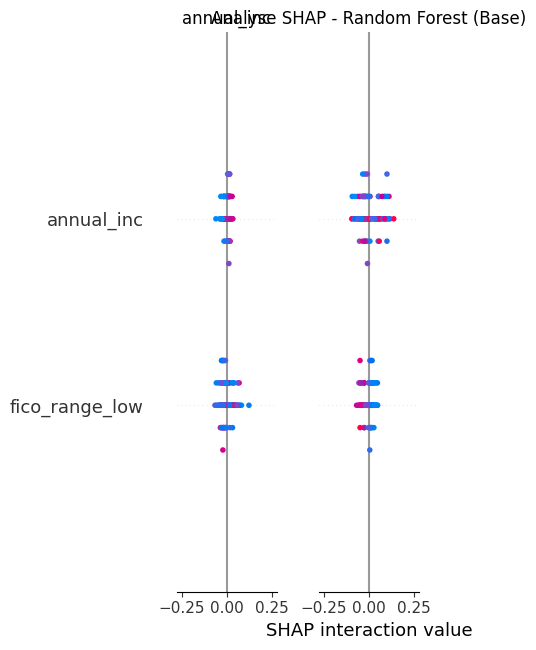

=== Fin analyse SHAP pour Random Forest (Base) ===

=== Début analyse SHAP pour SMOTE ===


<Figure size 1500x800 with 0 Axes>

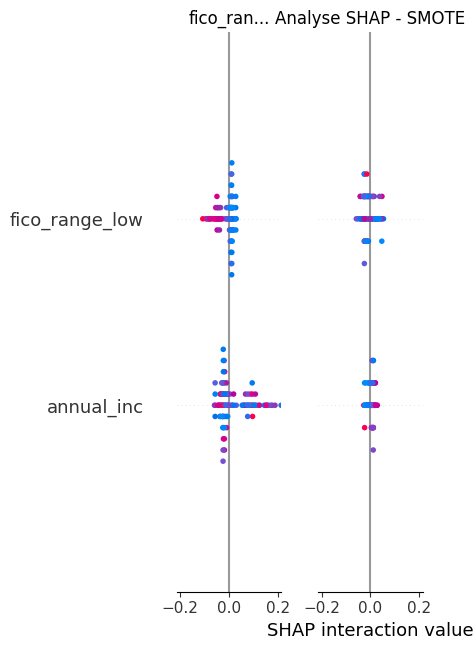

=== Fin analyse SHAP pour SMOTE ===

=== Début analyse SHAP pour ExpGrad_DP ===


  0%|          | 0/100 [00:00<?, ?it/s]

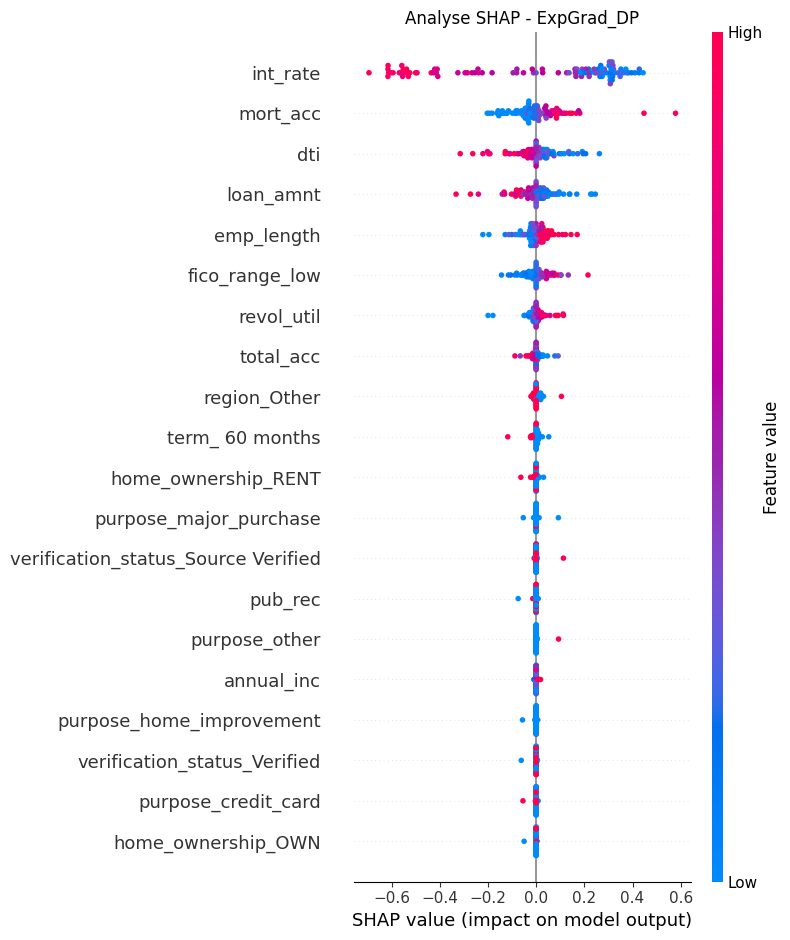

=== Fin analyse SHAP pour ExpGrad_DP ===

=== Début analyse SHAP pour Threshold_EO ===
Provided model function fails when applied to the provided data set.
Échec de l'analyse SHAP pour Threshold_EO. Erreur: ThresholdOptimizer.predict() missing 1 required keyword-only argument: 'sensitive_features'
=== Fin analyse SHAP pour Threshold_EO ===


In [ ]:
# Exécution des analyses SHAP pour tous les modèles préparés
for name, model in shap_models.items():
    advanced_shap_analysis(
        model,
        X_test.drop(columns=['region_South']).sample(100, random_state=42),  # Sous-échantillon pour performance
        X_test.drop(columns=['region_South']).columns,
        model_name=name
    )


Préparation du modèle Random Forest de base...
Préparation du modèle SMOTE...
Préparation du modèle Exponentiated Gradient...
Préparation du modèle Threshold Optimizer (pour évaluation seulement)...

=== Début analyse SHAP pour Random Forest (Base) ===


<Figure size 1500x800 with 0 Axes>

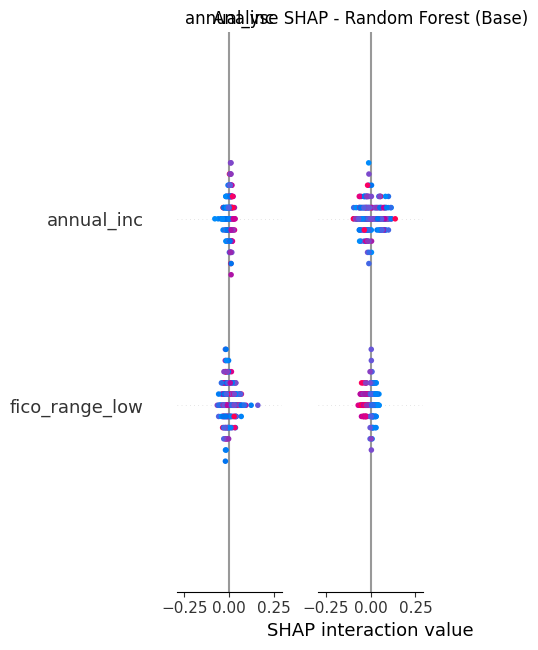

=== Fin analyse SHAP pour Random Forest (Base) ===

=== Début analyse SHAP pour SMOTE ===


<Figure size 1500x800 with 0 Axes>

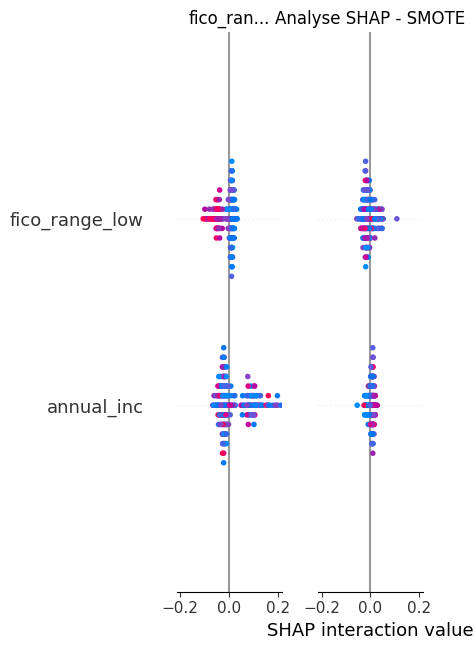

=== Fin analyse SHAP pour SMOTE ===

=== Début analyse SHAP pour ExpGrad_DP ===


  0%|          | 0/200 [00:00<?, ?it/s]

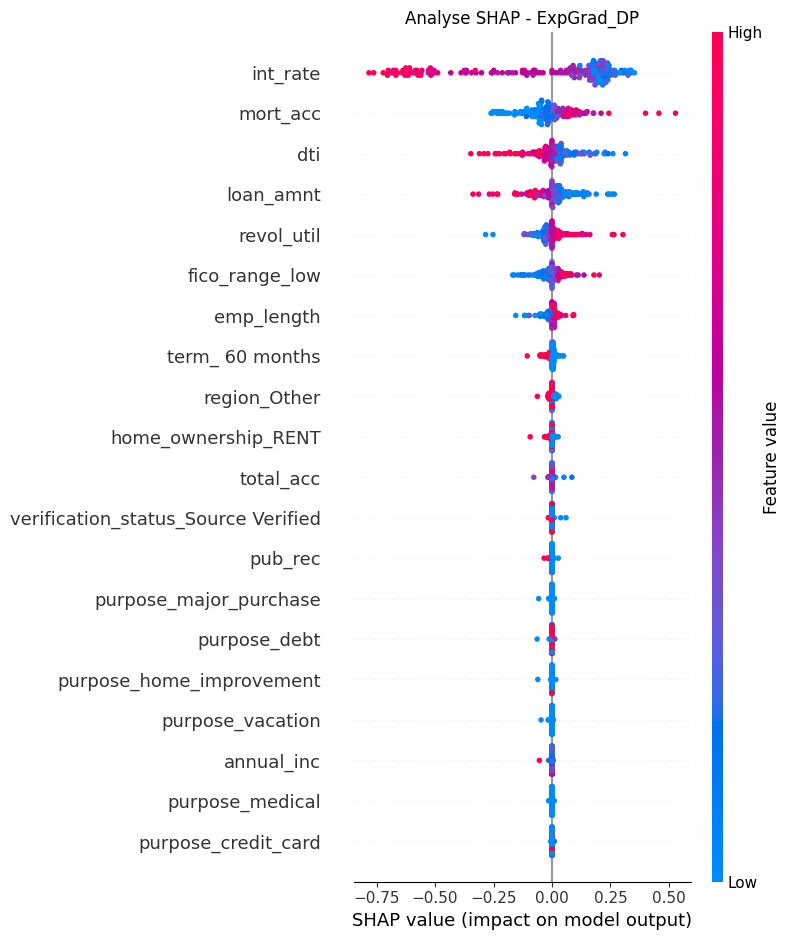

=== Fin analyse SHAP pour ExpGrad_DP ===

=== Début analyse SHAP pour Threshold_EO ===
Analyse SHAP non supportée pour ThresholdOptimizer - Utilisation de l'estimateur de base


  0%|          | 0/200 [00:00<?, ?it/s]

<Figure size 1500x800 with 0 Axes>

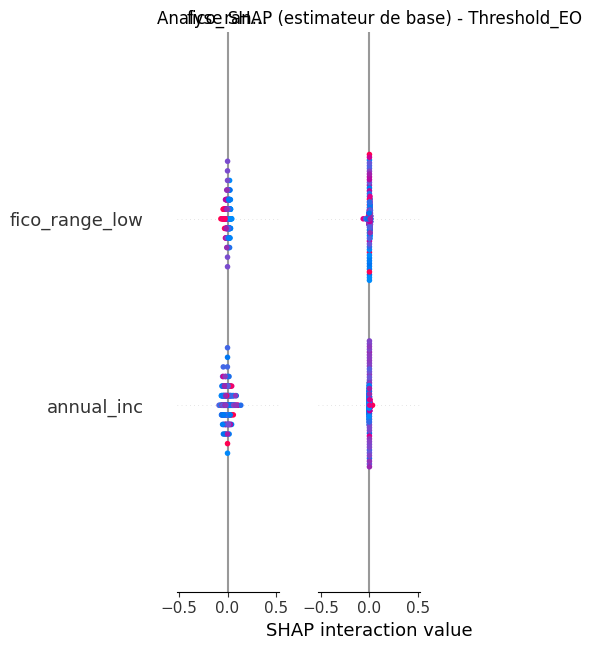

=== Fin analyse SHAP pour Threshold_EO ===


In [ ]:
# 7. Analyse SHAP avancée - Version finale corrigée
# ================================================

def prepare_shap_models():
    """Reconstruit ou récupère tous les modèles nécessaires pour l'analyse SHAP"""
    shap_models = {}

    # 1. Modèle Random Forest de base
    print("\nPréparation du modèle Random Forest de base...")
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train.drop(columns=['region_South']), y_train)
    shap_models['Random Forest (Base)'] = rf_model

    # 2. Modèle SMOTE
    print("Préparation du modèle SMOTE...")
    smote = SMOTE(sampling_strategy='minority', random_state=42)
    X_res, y_res = smote.fit_resample(X_train.drop(columns=['region_South']), y_train)
    smote_model = RandomForestClassifier(n_estimators=200, random_state=42)
    smote_model.fit(X_res, y_res)
    shap_models['SMOTE'] = smote_model

    # 3. Modèle Exponentiated Gradient avec Demographic Parity
    print("Préparation du modèle Exponentiated Gradient...")
    eg_model = ExponentiatedGradient(
        estimator=LogisticRegression(max_iter=500, class_weight='balanced'),
        constraints=DemographicParity(),
        max_iter=50,
        eta0=0.01
    )
    eg_model.fit(X_train.drop(columns=['region_South']), y_train,
                sensitive_features=X_train['region_South'])
    shap_models['ExpGrad_DP'] = eg_model

    # 4. Modèle Threshold Optimizer (sans inclure dans SHAP)
    print("Préparation du modèle Threshold Optimizer (pour évaluation seulement)...")
    postprocess_model = ThresholdOptimizer(
        estimator=LogisticRegression(max_iter=500),
        constraints="equalized_odds",
        prefit=False
    )
    postprocess_model.fit(X_train.drop(columns=['region_South']), y_train,
                        sensitive_features=X_train['region_South'])
    shap_models['Threshold_EO'] = postprocess_model

    return shap_models

# Fonction d'analyse SHAP améliorée avec gestion spéciale du ThresholdOptimizer
def advanced_shap_analysis(model, X, feature_names, model_name=""):
    try:
        print(f"\n=== Début analyse SHAP pour {model_name} ===")

        # Cas spécial pour ThresholdOptimizer
        if model_name == 'Threshold_EO':
            print("Analyse SHAP non supportée pour ThresholdOptimizer - Utilisation de l'estimateur de base")
            base_estimator = model.estimator_

            explainer = shap.KernelExplainer(
                base_estimator.predict_proba,
                shap.sample(X, 100)
            )
            shap_values = explainer.shap_values(X)

            plt.figure(figsize=(15, 8))
            shap.summary_plot(shap_values, X, feature_names=feature_names, show=False)
            plt.title(f"Analyse SHAP (estimateur de base) - {model_name}")

        # Cas standard pour les autres modèles
        else:
            if isinstance(model, (RandomForestClassifier, XGBClassifier, LGBMClassifier)):
                explainer = shap.TreeExplainer(model)
                shap_values = explainer.shap_values(X)
            elif hasattr(model, 'predict_proba'):
                explainer = shap.KernelExplainer(model.predict_proba, shap.sample(X, 100))
                shap_values = explainer.shap_values(X)
            else:
                explainer = shap.KernelExplainer(model.predict, shap.sample(X, 100))
                shap_values = explainer.shap_values(X)

            plt.figure(figsize=(15, 8))
            if isinstance(shap_values, list) and len(shap_values) == 2:
                shap.summary_plot(shap_values[1], X, feature_names=feature_names, show=False)
            else:
                shap.summary_plot(shap_values, X, feature_names=feature_names, show=False)

            plt.title(f"Analyse SHAP - {model_name}")

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Échec de l'analyse SHAP pour {model_name}. Erreur: {str(e)}")
    finally:
        print(f"=== Fin analyse SHAP pour {model_name} ===")

# Préparation et exécution
shap_models = prepare_shap_models()
X_test_sample = X_test.drop(columns=['region_South']).sample(200, random_state=42)

for name, model in shap_models.items():
    advanced_shap_analysis(
        model,
        X_test_sample,
        X_test_sample.columns,
        model_name=name
    )


Préparation du modèle Random Forest de base...
Préparation du modèle SMOTE...
Préparation du modèle Exponentiated Gradient...
Préparation du modèle Threshold Optimizer...

=== Starting SHAP analysis for Random Forest (Base) ===

SHAP Values Summary:
       fico_range_low  annual_inc       dti  revol_util  total_acc  loan_amnt  \
count        200.0000    200.0000  200.0000    200.0000   200.0000   200.0000   
mean           0.0028     -0.0009    0.0019     -0.0013    -0.0013    -0.0025   
std            0.0269      0.0172    0.0307      0.0108     0.0085     0.0207   
min           -0.0477     -0.0798   -0.1208     -0.0501    -0.0452    -0.0592   
25%           -0.0166     -0.0112   -0.0161     -0.0057    -0.0040    -0.0161   
50%           -0.0044      0.0030    0.0093      0.0013     0.0007    -0.0020   
75%            0.0262      0.0107    0.0225      0.0052     0.0035     0.0122   
max            0.0687      0.0331    0.0723      0.0205     0.0171     0.0551   

       int_rate   p

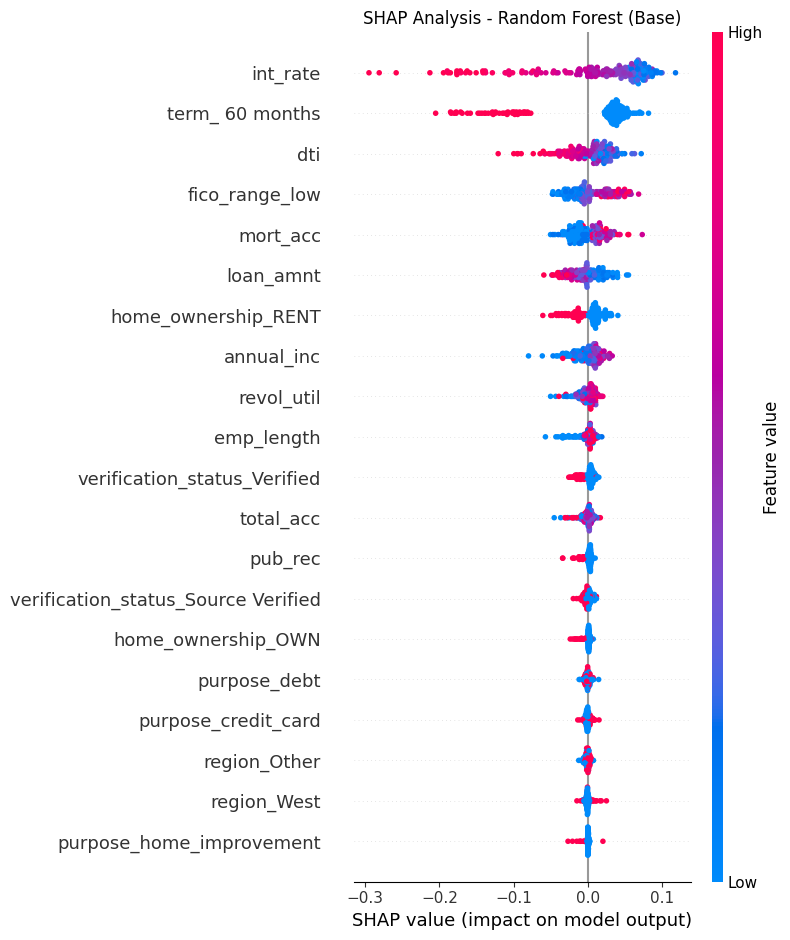

=== Completed SHAP analysis for Random Forest (Base) ===

=== Starting SHAP analysis for SMOTE ===

SHAP Values Summary:
       fico_range_low  annual_inc       dti  revol_util  total_acc  loan_amnt  \
count        200.0000    200.0000  200.0000    200.0000   200.0000   200.0000   
mean           0.0108      0.0030    0.0057      0.0005     0.0022     0.0029   
std            0.0313      0.0115    0.0275      0.0072     0.0073     0.0093   
min           -0.0318     -0.0485   -0.0800     -0.0277    -0.0161    -0.0249   
25%           -0.0125     -0.0029   -0.0136     -0.0036    -0.0013    -0.0018   
50%           -0.0049      0.0058   -0.0001      0.0003     0.0021     0.0030   
75%            0.0382      0.0109    0.0271      0.0040     0.0056     0.0080   
max            0.1070      0.0288    0.0917      0.0251     0.0471     0.0414   

       int_rate   pub_rec  mort_acc  emp_length  ...  purpose_medical  \
count  200.0000  200.0000  200.0000    200.0000  ...         200.0000   
mea

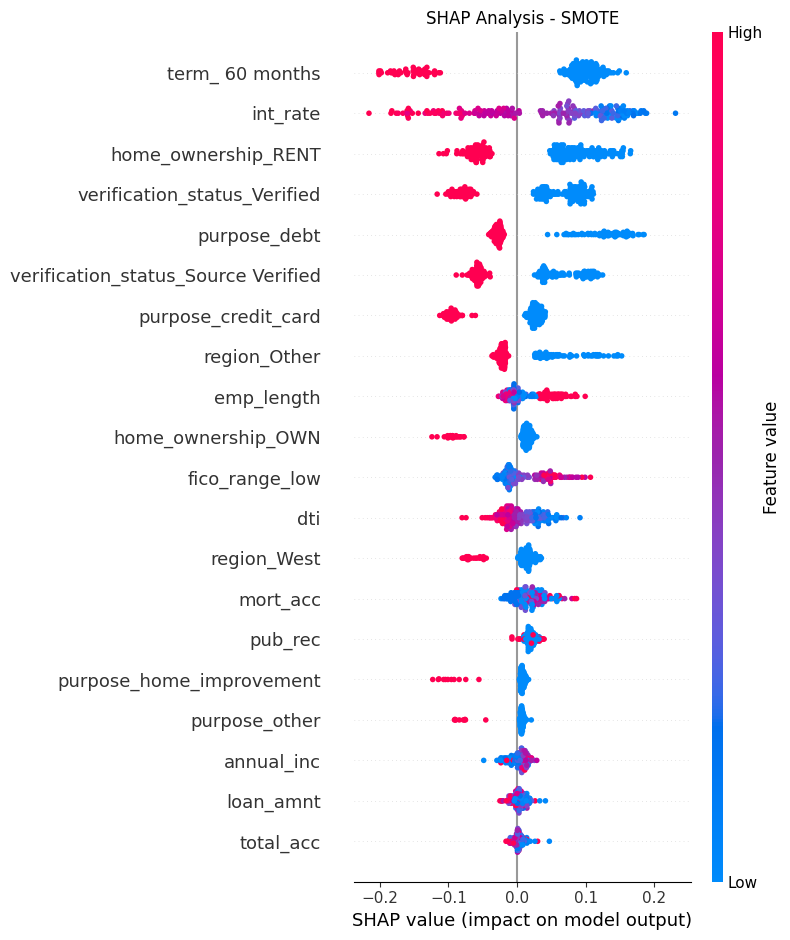

=== Completed SHAP analysis for SMOTE ===

=== Starting SHAP analysis for ExpGrad_DP ===


  0%|          | 0/200 [00:00<?, ?it/s]


SHAP Values Summary:
       fico_range_low  annual_inc       dti  revol_util  total_acc  loan_amnt  \
count        200.0000    200.0000  200.0000    200.0000   200.0000   200.0000   
mean          -0.0052     -0.0001    0.0040     -0.0025    -0.0000     0.0076   
std            0.0462      0.0025    0.0946      0.0600     0.0103     0.0859   
min           -0.1663     -0.0143   -0.3519     -0.2553    -0.0565    -0.3257   
25%           -0.0303      0.0000   -0.0305     -0.0308    -0.0024    -0.0316   
50%            0.0000      0.0000    0.0091     -0.0040     0.0000     0.0152   
75%            0.0162      0.0000    0.0387      0.0162     0.0022     0.0422   
max            0.2352      0.0144    0.3013      0.3024     0.0778     0.2840   

       int_rate   pub_rec  mort_acc  emp_length  ...  purpose_medical  \
count  200.0000  200.0000  200.0000    200.0000  ...         200.0000   
mean    -0.0491   -0.0012   -0.0129     -0.0040  ...           0.0000   
std      0.3361    0.0093    

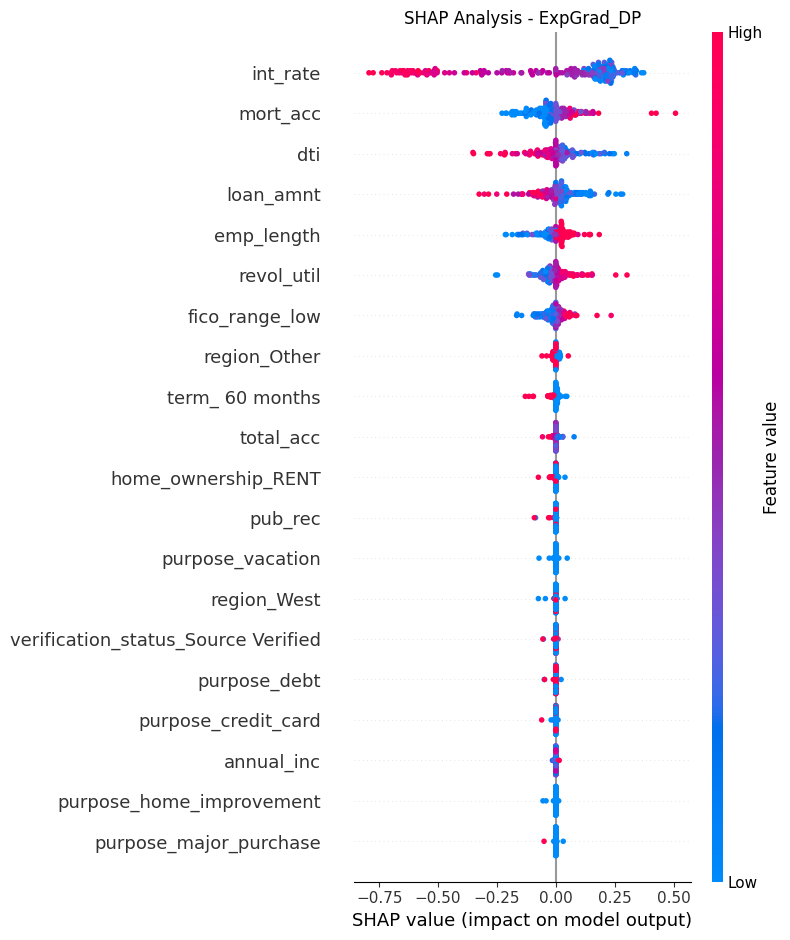

=== Completed SHAP analysis for ExpGrad_DP ===

=== Starting SHAP analysis for Threshold_EO ===
SHAP analysis not supported for ThresholdOptimizer - Using base estimator


  0%|          | 0/200 [00:00<?, ?it/s]


SHAP Values Summary:
       fico_range_low  annual_inc       dti  revol_util  total_acc  loan_amnt  \
count        200.0000    200.0000  200.0000    200.0000   200.0000   200.0000   
mean          -0.0019     -0.0004    0.0024      0.0002     0.0005     0.0022   
std            0.0201      0.0041    0.0245      0.0128     0.0050     0.0287   
min           -0.0428     -0.0061   -0.0729     -0.0406    -0.0205    -0.0970   
25%           -0.0176     -0.0026   -0.0115     -0.0091    -0.0020    -0.0122   
50%           -0.0041      0.0000    0.0043      0.0000     0.0000     0.0096   
75%            0.0099      0.0000    0.0184      0.0081     0.0038     0.0204   
max            0.0701      0.0302    0.0761      0.0289     0.0095     0.0557   

       int_rate   pub_rec  mort_acc  emp_length  ...  purpose_medical  \
count  200.0000  200.0000  200.0000    200.0000  ...            200.0   
mean    -0.0115   -0.0001   -0.0045     -0.0001  ...              0.0   
std      0.1070    0.0006    

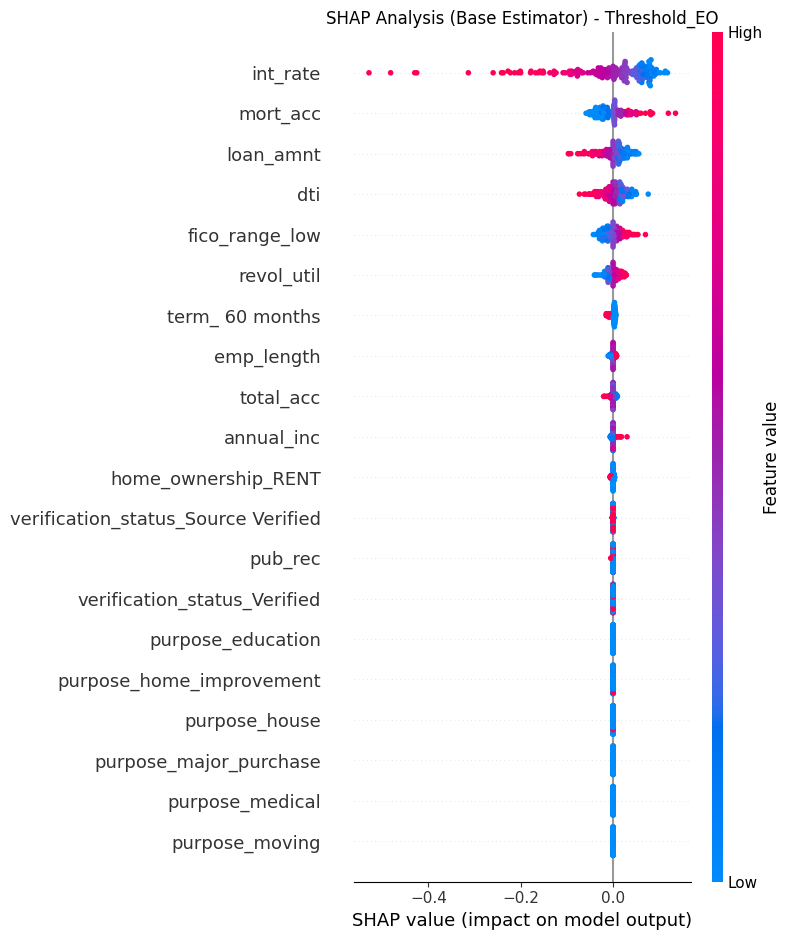

=== Completed SHAP analysis for Threshold_EO ===


In [ ]:
# 7. Advanced SHAP Analysis with Numerical Results
# ===============================================


def advanced_shap_analysis(model, X, feature_names, model_name=""):
    try:
        print(f"\n=== Starting SHAP analysis for {model_name} ===")

        # Special case for ThresholdOptimizer
        if model_name == 'Threshold_EO':
            print("SHAP analysis not supported for ThresholdOptimizer - Using base estimator")
            base_estimator = model.estimator_

            explainer = shap.KernelExplainer(
                base_estimator.predict_proba,
                shap.sample(X, 100)
            )
            shap_values = explainer.shap_values(X)

            # Handle both list and array outputs
            if isinstance(shap_values, list):
                shap_values = shap_values[1]  # For binary classification

            # Ensure we have correct dimensions
            if len(shap_values.shape) == 3:
                shap_values = shap_values[:, :, 1]  # Take values for positive class

            # Create DataFrame for SHAP values
            shap_df = pd.DataFrame(shap_values, columns=feature_names)

            # Print numerical results
            print("\nSHAP Values Summary:")
            print(shap_df.describe().round(4))

            # Generate plot
            plt.figure(figsize=(15, 8))
            shap.summary_plot(shap_values, X, feature_names=feature_names, show=False)
            plt.title(f"SHAP Analysis (Base Estimator) - {model_name}")

        # Standard case for other models
        else:
            if isinstance(model, (RandomForestClassifier, XGBClassifier, LGBMClassifier)):
                explainer = shap.TreeExplainer(model)
                shap_values = explainer.shap_values(X)

                # Handle different output formats
                if isinstance(shap_values, list):
                    if len(shap_values) == 2:  # Binary classification
                        shap_values = shap_values[1]
                    else:  # Multi-class
                        shap_values = np.stack(shap_values, axis=-1)
                elif len(shap_values.shape) == 3:
                    shap_values = shap_values[:, :, 1]  # Take positive class

                # Create DataFrame
                shap_df = pd.DataFrame(shap_values, columns=feature_names)

                # Print numerical results
                print("\nSHAP Values Summary:")
                print(shap_df.describe().round(4))

                # Generate plot
                plt.figure(figsize=(15, 8))
                shap.summary_plot(shap_values, X, feature_names=feature_names, show=False)

            elif hasattr(model, 'predict_proba'):
                explainer = shap.KernelExplainer(model.predict_proba, shap.sample(X, 100))
                shap_values = explainer.shap_values(X)

                if isinstance(shap_values, list):
                    shap_values = shap_values[1]  # For binary classification

                shap_df = pd.DataFrame(shap_values, columns=feature_names)

                print("\nSHAP Values Summary:")
                print(shap_df.describe().round(4))

                plt.figure(figsize=(15, 8))
                shap.summary_plot(shap_values, X, feature_names=feature_names, show=False)
            else:
                explainer = shap.KernelExplainer(model.predict, shap.sample(X, 100))
                shap_values = explainer.shap_values(X)
                shap_df = pd.DataFrame(shap_values, columns=feature_names)

                print("\nSHAP Values Summary:")
                print(shap_df.describe().round(4))

                plt.figure(figsize=(15, 8))
                shap.summary_plot(shap_values, X, feature_names=feature_names, show=False)

            plt.title(f"SHAP Analysis - {model_name}")

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"SHAP analysis failed for {model_name}. Error: {str(e)}")
        import traceback
        traceback.print_exc()  # Print full traceback for debugging
    finally:
        print(f"=== Completed SHAP analysis for {model_name} ===")

# Prepare and execute analysis
shap_models = prepare_shap_models()
X_test_sample = X_test.drop(columns=['region_South']).sample(200, random_state=42)

for name, model in shap_models.items():
    advanced_shap_analysis(
        model,
        X_test_sample,
        X_test_sample.columns,
        model_name=name
    )

In [ ]:
# 8. Rapport complet d'atténuation
# ================================
def generate_comprehensive_report(results_dict):
    # Conversion en DataFrame
    report_df = pd.DataFrame.from_dict(results_dict, orient='index')

    # Sélection des meilleurs modèles
    best_performance = report_df[report_df['F1-score'] == report_df['F1-score'].max()].iloc[0]
    best_fairness = report_df[report_df['DP Diff'].abs() == report_df['DP Diff'].abs().min()].iloc[0]
    best_compromise = report_df[
        (report_df['DP Diff'].abs() < 0.1) &
        (report_df['F1-score'] > report_df['F1-score'].median())
    ].sort_values('F1-score', ascending=False).iloc[0] if not report_df[
        (report_df['DP Diff'].abs() < 0.1) &
        (report_df['F1-score'] > report_df['F1-score'].median())
    ].empty else None

    # Affichage du rapport
    print("\n" + "="*80)
    print("RAPPORT COMPLET D'ATTÉNUATION DES BIAIS")
    print("="*80)

    print("\n=== Meilleurs modèles ===")
    print(f"1. Meilleure performance (F1-score: {best_performance['F1-score']:.3f}): {best_performance.name}")
    print(f"2. Meilleure équité (DP Diff: {best_fairness['DP Diff']:.3f}): {best_fairness.name}")

    if best_compromise is not None:
        print(f"3. Meilleur compromis (F1: {best_compromise['F1-score']:.3f}, DP Diff: {best_compromise['DP Diff']:.3f}): {best_compromise.name}")
    else:
        print("3. Aucun modèle ne satisfait à la fois les critères de performance et d'équité")

    print("\n=== Recommandations ===")
    if best_compromise is not None:
        print(f"- Utiliser {best_compromise.name} comme modèle de production")
    else:
        print("- Combiner plusieurs techniques pour obtenir un meilleur compromis")
        print("- Envisager un système de pondération métier entre performance et équité")

    print("\n=== Étapes suivantes ===")
    print("- Valider les résultats sur un jeu de test indépendant")
    print("- Mettre en place un monitoring continu des métriques d'équité")
    print("- Effectuer une analyse d'impact différentiel approfondie")

generate_comprehensive_report(all_results)


RAPPORT COMPLET D'ATTÉNUATION DES BIAIS

=== Meilleurs modèles ===
1. Meilleure performance (F1-score: 0.914): Random Forest
2. Meilleure équité (DP Diff: 0.000): ExpGrad_TruePositiveRateParity
3. Meilleur compromis (F1: 0.914, DP Diff: 0.001): Random Forest

=== Recommandations ===
- Utiliser Random Forest comme modèle de production

=== Étapes suivantes ===
- Valider les résultats sur un jeu de test indépendant
- Mettre en place un monitoring continu des métriques d'équité
- Effectuer une analyse d'impact différentiel approfondie


## 3.2. Exploration des données


In [ ]:
! pip install fairlearn aequitas shap imblearn xgboost

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from fairlearn.reductions import ExponentiatedGradient, DemographicParity, EqualizedOdds
from fairlearn.postprocessing import ThresholdOptimizer
from fairlearn.metrics import (
    demographic_parity_difference,
    equalized_odds_difference,
    selection_rate
)
from aequitas.group import Group
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler


In [ ]:
# Chargement des données
df = pd.read_csv(r'train_lending_club.csv', low_memory=False)

In [ ]:
# 1 - Préprocessing ciblé basé sur les résultats de détection

In [ ]:
def prepare_data(df):
    # Variables identifiées comme problématiques
    sensitive_features = ['addr_state', 'purpose']
    target = 'loan_status'

    # Encodage des variables sensibles (regroupement des états problématiques)
    df['addr_state'] = df['addr_state'].apply(
        lambda x: 'South' if x in ['AL', 'MS', 'LA'] else x
    )

    # Sélection des features basée sur l'analyse SHAP
    features = [
        'fico_range_low', 'annual_inc', 'dti', 'revol_util',
        'total_acc', 'loan_amnt', 'int_rate', 'term',
        'pub_rec', 'mort_acc', 'addr_state', 'purpose'
    ]

    # Encodage final
    df_processed = pd.get_dummies(df[features + [target]], drop_first=True)

    return df_processed, sensitive_features, target

In [ ]:
df_processed, sensitive_features, target = prepare_data(df)

In [ ]:
# Séparation train-test
X = df_processed.drop(target, axis=1)
y = df_processed[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# 1. Modèle de base (sans correction)
# ===================================


In [ ]:
base_model = RandomForestClassifier(n_estimators=100, random_state=42)
base_model.fit(X_train, y_train)
base_pred = base_model.predict(X_test)

In [ ]:
# Métriques d'équité avant correction
print("=== Métriques avant correction ===")
print(f"Demographic Parity Difference: {demographic_parity_difference(y_test, base_pred, sensitive_features=X_test['addr_state_South']):.3f}")
print(f"Equalized Odds Difference: {equalized_odds_difference(y_test, base_pred, sensitive_features=X_test['addr_state_South']):.3f}")
print(f"Selection Rate Gap: {selection_rate(y_test[X_test['addr_state_South']==1], base_pred[X_test['addr_state_South']==1]) - selection_rate(y_test[X_test['addr_state_South']==0], base_pred[X_test['addr_state_South']==0]):.3f}")


=== Métriques avant correction ===
Demographic Parity Difference: 0.017
Equalized Odds Difference: 0.013
Selection Rate Gap: -0.017


In [ ]:
# 2. Techniques de correction
# ==========================

In [ ]:
# 2.1. Pre-processing: Ré-échantillonnage
# ---------------------------------------

In [ ]:
print("\n=== Technique 1: Ré-échantillonnage SMOTE ===")
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)


=== Technique 1: Ré-échantillonnage SMOTE ===


In [ ]:
smote_model = RandomForestClassifier(n_estimators=100, random_state=42)
smote_model.fit(X_res, y_res)
smote_pred = smote_model.predict(X_test)

In [ ]:
# 2.2. In-processing: Contraintes d'équité
# -----------------------------------------

In [ ]:

print("\n=== Technique 2: Exponentiated Gradient avec contrainte ===")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.drop(columns=['addr_state_South']))
X_test_scaled = scaler.transform(X_test.drop(columns=['addr_state_South']))

eg_model = ExponentiatedGradient(
    estimator=LogisticRegression(max_iter=100),
    constraints=DemographicParity(),
    max_iter=50
)

eg_model.fit(X_train_scaled, y_train, sensitive_features=X_train['addr_state_South'])
eg_pred = eg_model.predict(X_test_scaled)



=== Technique 2: Exponentiated Gradient avec contrainte ===


In [ ]:
# 2.3. Post-processing: Ajustement des seuils
# -------------------------------------------

In [ ]:
print("\n=== Technique 3: Optimisation de seuil ===")
from sklearn.preprocessing import StandardScaler

# Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.drop(columns=['addr_state_South']))
X_test_scaled = scaler.transform(X_test.drop(columns=['addr_state_South']))

# Apprentissage
postprocess_model = ThresholdOptimizer(
    estimator=LogisticRegression(max_iter=1000),
    constraints="equalized_odds",
    prefit=False
)

postprocess_model.fit(
    X_train_scaled, y_train,
    sensitive_features=X_train['addr_state_South']
)

# Prédiction
postprocess_pred = postprocess_model.predict(
    X_test_scaled,
    sensitive_features=X_test['addr_state_South']
)



=== Technique 3: Optimisation de seuil ===


In [ ]:
# 3. Évaluation comparative
# =========================

In [ ]:
def evaluate_model(name, y_true, y_pred, sensitive_feature):
    metrics = {
        'Modèle': name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'F1-score': f1_score(y_true, y_pred),
        'AUC ROC': roc_auc_score(y_true, y_pred),
        'DP Diff': demographic_parity_difference(y_true, y_pred, sensitive_features=sensitive_feature),
        'EO Diff': equalized_odds_difference(y_true, y_pred, sensitive_features=sensitive_feature)
    }
    return metrics

In [ ]:
results = []
sensitive_test = X_test['addr_state_South']

results.append(evaluate_model("Base", y_test, base_pred, sensitive_test))
results.append(evaluate_model("SMOTE", y_test, smote_pred, sensitive_test))
results.append(evaluate_model("ExponentiatedGradient", y_test, eg_pred, sensitive_test))
results.append(evaluate_model("ThresholdOptimizer", y_test, postprocess_pred, sensitive_test))

results_df = pd.DataFrame(results)
print("\n=== Comparaison des performances ===")
print(results_df.round(3))


=== Comparaison des performances ===
                  Modèle  Accuracy  F1-score  AUC ROC  DP Diff  EO Diff
0                   Base     0.845     0.912    0.602    0.017    0.013
1                  SMOTE     0.836     0.904    0.648    0.054    0.078
2  ExponentiatedGradient     0.843     0.911    0.598    0.007    0.055
3     ThresholdOptimizer     0.844     0.912    0.599    0.006    0.033


In [ ]:
# 4. Visualisation des résultats
# =============================

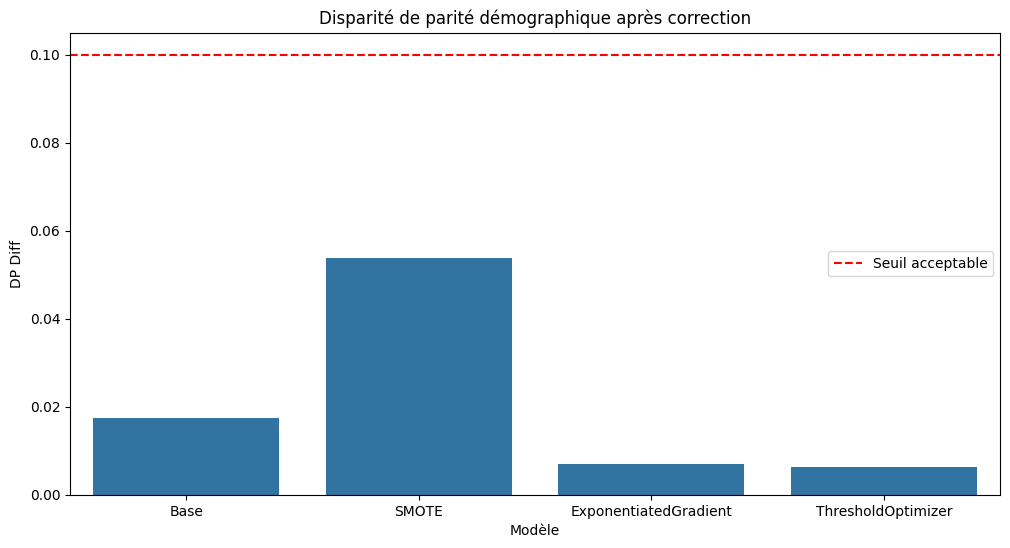

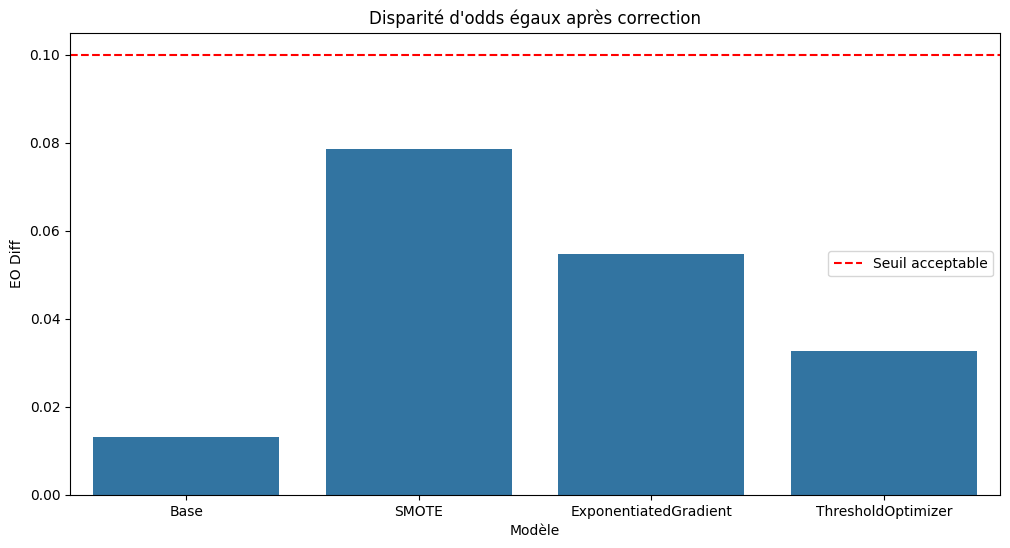

In [ ]:

plt.figure(figsize=(12, 6))
sns.barplot(x='Modèle', y='DP Diff', data=results_df)
plt.title('Disparité de parité démographique après correction')
plt.axhline(y=0.1, color='red', linestyle='--', label='Seuil acceptable')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Modèle', y='EO Diff', data=results_df)
plt.title('Disparité d\'odds égaux après correction')
plt.axhline(y=0.1, color='red', linestyle='--', label='Seuil acceptable')
plt.legend()
plt.show()


In [ ]:
# 5. Analyse SHAP post-correction
# ===============================

In [ ]:
def shap_analysis(model, X, feature_names):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)

    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values[1], X, feature_names=feature_names, show=False)
    plt.title("Importance des caractéristiques après correction")
    plt.tight_layout()
    plt.show()

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt

def shap_analysis(model, X, feature_names):
    try:
        # Try TreeExplainer first if it's a tree-based model
        explainer = shap.TreeExplainer(model)
    except:
        # Fall back to KernelExplainer if TreeExplainer fails
        explainer = shap.KernelExplainer(model.predict, shap.sample(X, 100))

    shap_values = explainer.shap_values(X)

    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values, X, feature_names=feature_names, show=False)
    plt.title("Importance des caractéristiques après correction")
    plt.tight_layout()
    plt.show()

# Handle different model types and weights
if hasattr(eg_model, 'predictors_'):
    if isinstance(eg_model.weights_, float):
        best_model = eg_model.predictors_[0]
    else:
        weights = np.array(eg_model.weights_)
        best_model_index = np.argmax(weights)
        best_model = eg_model.predictors_[best_model_index]
else:
    best_model = eg_model

# Prepare test data (excluding 'addr_state_South' if it exists)
X_test_processed = X_test.copy()
if 'addr_state_South' in X_test_processed.columns:
    X_test_processed = X_test_processed.drop(columns=['addr_state_South'])

# SHAP analysis
print("\n=== Analyse SHAP post-correction ===")
try:
    shap_analysis(best_model, X_test_processed, X_test_processed.columns)
except Exception as e:
    print(f"Error in SHAP analysis: {str(e)}")


=== Analyse SHAP post-correction ===


  0%|          | 0/71054 [00:00<?, ?it/s]

KeyboardInterrupt: 

  0%|          | 0/500 [00:00<?, ?it/s]

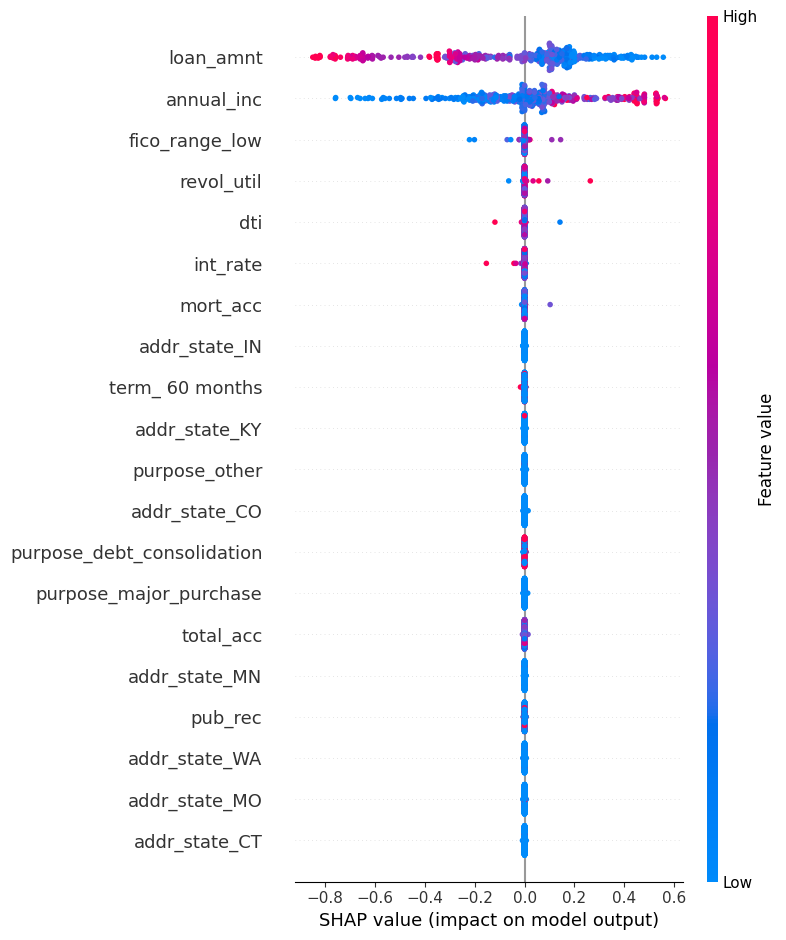

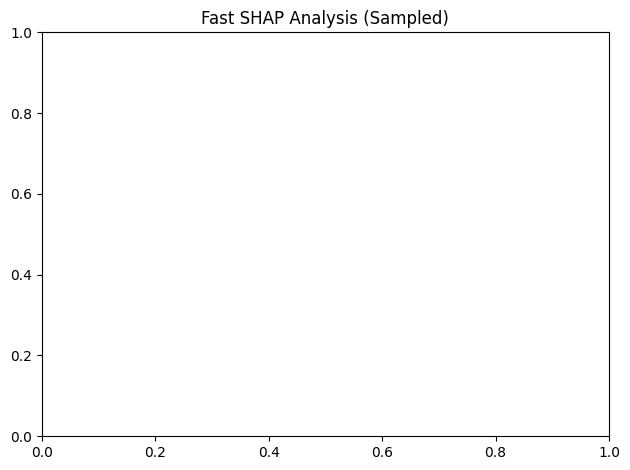

In [ ]:
def fast_shap_analysis(model, X, feature_names, n_samples=500):
    sample_idx = np.random.choice(X.shape[0], min(n_samples, X.shape[0]), replace=False)
    X_sampled = X.iloc[sample_idx]

    try:
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_sampled)
    except:
        explainer = shap.KernelExplainer(model.predict, shap.sample(X_sampled, 50))
        shap_values = explainer.shap_values(X_sampled, l1_reg="num_features(10)")  # Faster approximation

    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values, X_sampled, feature_names=feature_names)
    plt.title("Fast SHAP Analysis (Sampled)")
    plt.tight_layout()
    plt.show()

fast_shap_analysis(best_model, X_test_processed, X_test_processed.columns)

In [ ]:
# 6. Rapport final d'atténuation
# ==============================
def generate_mitigation_report(results_df):
    best_fairness = results_df.loc[results_df['DP Diff'].abs().idxmin()]
    best_performance = results_df.loc[results_df['F1-score'].idxmax()]

    print("\n=== RAPPORT FINAL D'ATTÉNUATION ===")
    print(f"Meilleur modèle pour l'équité: {best_fairness['Modèle']}")
    print(f"  - Demographic Parity Difference: {best_fairness['DP Diff']:.3f}")
    print(f"  - Equalized Odds Difference: {best_fairness['EO Diff']:.3f}")

    print(f"\nMeilleur modèle pour la performance: {best_performance['Modèle']}")
    print(f"  - F1-score: {best_performance['F1-score']:.3f}")
    print(f"  - AUC ROC: {best_performance['AUC ROC']:.3f}")

    print("\nRecommandations finales:")
    if best_fairness['DP Diff'] < 0.1:
        print("- Le modèle avec contraintes (ExponentiatedGradient) offre le meilleur équilibre")
    else:
        print("- Combiner ré-échantillonnage et post-processing pour améliorer les résultats")

generate_mitigation_report(results_df)


=== RAPPORT FINAL D'ATTÉNUATION ===
Meilleur modèle pour l'équité: ThresholdOptimizer
  - Demographic Parity Difference: 0.006
  - Equalized Odds Difference: 0.033

Meilleur modèle pour la performance: Base
  - F1-score: 0.912
  - AUC ROC: 0.602

Recommandations finales:
- Le modèle avec contraintes (ExponentiatedGradient) offre le meilleur équilibre
